In [17]:
# Load libraries
library(ggplot2)
library(tidyverse)
library(ggfortify)
library(reshape2)


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [2]:
# Load data

tpm <- read.csv('analysis//classes/cse283//GSE136243_gene_TPM_all_samples.txt', sep='\t')
metadata <- read.csv('analysis//classes/cse283//donor_info.csv', sep=',')

In [5]:
head(metadata)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_2     control 93        F   1           NA             \316\2653/\316\2653
3 N_3     control 86        M   1           NA             \316\2652/\316\2653
4 N_4     control 83        M   1           NA             \316\2653/\316\2653
5 N_5     control 89        M   2           NA             \316\2653/\316\2653
6 N_6     control 96        F   2           NA             \316\2653/\316\2653

In [8]:
length(names(tpm))

[1] 167

In [7]:
head(tpm)

gene_id         gene_name    gene_biotype                       C_1_01_1
1 ENSG00000223972 DDX11L1      transcribed_unprocessed_pseudogene 0       
2 ENSG00000227232 WASH7P       unprocessed_pseudogene             0       
3 ENSG00000278267 MIR6859-1    miRNA                              0       
4 ENSG00000243485 RP11-34P13.3 lincRNA                            0       
5 ENSG00000274890 MIR1302-2    miRNA                              0       
6 ENSG00000237613 FAM138A      lincRNA                            0       
  AD_8_12_1 C_10_01_1 C_10_14_1 C_10_05_1 C_10_08_1 AD_11_08_1 <U+22EF>  
1 0         0         0         0         0         0          <U+22EF>
2 0         0         0         0         0         0          <U+22EF>
3 0         0         0         0         0         0          <U+22EF>
4 0         0         0         0         0         0          <U+22EF>
5 0         0         0         0         0         0          <U+22EF>
6 0         0         0         0         0         0          <U+22EF>
  AD_5_12_1 AD_5_13_1 AD_3_00_1 AD_3_01_1 AD_3_03_1 AD_2_01_1 AD_2_02_1
1 0         0         0         0         0         0         0        
2 0         0         0         0         0         0         0        
3 0         0         0         0         0         0         0        
4 0         0         0         0         0         0         0        
5 0         0         0         0         0         0         0        
6 0         0         0         0         0         0         0        
  AD_2_03_1 AD_2_05_1 AD_2_07_1
1 0          0.00000  0.000000 
2 0         11.62609  5.503961 
3 0          0.00000  0.000000 
4 0          0.00000  0.000000 
5 0          0.00000  0.000000 
6 0          0.00000  0.000000

# Data wrangling

In [22]:
# Create mapping between sample names and donorIDs; keep year of sample

sample_df <- data.frame(sampleID = colnames(tpm[4:167])) %>%
mutate(donorID = sapply(sampleID,function(x) {
        t <- str_split(x,"_")[[1]]
        return(paste0(t[1],"_",t[2]))})) %>%
mutate(year = as.numeric(sapply(sampleID,function(x) {
        t <- str_split(x,"_")[[1]]
        return(paste0("20",t[3]))}))) 

sample_df <- sample_df[,c(2, 1, 3)]

head(sample_df)

donorID sampleID  year
1 C_1     C_1_01_1  2001
2 AD_8    AD_8_12_1 2012
3 C_10    C_10_01_1 2001
4 C_10    C_10_14_1 2014
5 C_10    C_10_05_1 2005
6 C_10    C_10_08_1 2008

In [44]:
# Add to metadata table
meta_all <- left_join(metadata, sample_df, by='donorID')%>%
    mutate(yr_since_diag = as.numeric(year)-as.numeric(Year_diagnosis))
head(meta_all)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag
1 N_1_01_1 2001 NA           
2 N_1_05_1 2005 NA           
3 N_1_07_1 2007 NA           
4 N_1_08_1 2008 NA           
5 N_1_09_1 2009 NA           
6 N_2_00_1 2000 NA

In [45]:
# Reformat counts table into long format and add metadata - from Natalie's code
tpm_flat <- tpm %>%
    melt(id.vars=c("gene_id", "gene_name", "gene_biotype"), value.name = "tpm", variable.name = "sampleID") %>%
    left_join(.,meta_all,by="sampleID")

head(tpm_flat)

gene_id         gene_name    gene_biotype                       sampleID tpm
1 ENSG00000223972 DDX11L1      transcribed_unprocessed_pseudogene C_1_01_1 0  
2 ENSG00000227232 WASH7P       unprocessed_pseudogene             C_1_01_1 0  
3 ENSG00000278267 MIR6859-1    miRNA                              C_1_01_1 0  
4 ENSG00000243485 RP11-34P13.3 lincRNA                            C_1_01_1 0  
5 ENSG00000274890 MIR1302-2    miRNA                              C_1_01_1 0  
6 ENSG00000237613 FAM138A      lincRNA                            C_1_01_1 0  
  donorID group     age_death sex braak_stage Year_diagnosis
1 C_1     converter 91        F   3           2010          
2 C_1     converter 91        F   3           2010          
3 C_1     converter 91        F   3           2010          
4 C_1     converter 91        F   3           2010          
5 C_1     converter 91        F   3           2010          
6 C_1     converter 91        F   3           2010          
  APOE_status         year yr_since_diag
1 \316\2653/\316\2654 2001 -9           
2 \316\2653/\316\2654 2001 -9           
3 \316\2653/\316\2654 2001 -9           
4 \316\2653/\316\2654 2001 -9           
5 \316\2653/\316\2654 2001 -9           
6 \316\2653/\316\2654 2001 -9

In [25]:
# Save flat file
write.csv(tpm_flat, "analysis/classes/cse283/data_flat.csv", row.names = F)

In [27]:
head(meta_all)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year
1 N_1_01_1 2001
2 N_1_05_1 2005
3 N_1_07_1 2007
4 N_1_08_1 2008
5 N_1_09_1 2009
6 N_2_00_1 2000

In [784]:
# Calculate first year for all samples
first_year <- meta_all %>%
group_by(donorID) %>% summarise(firstYear = min(year))

In [358]:
dim(meta_all)

[1] 164  10

In [786]:
meta_withFirstYear <- left_join(meta_all, first_year, by='donorID')

In [787]:
head(meta_withFirstYear)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag firstYear
1 N_1_01_1 2001 NA            2001     
2 N_1_05_1 2005 NA            2001     
3 N_1_07_1 2007 NA            2001     
4 N_1_08_1 2008 NA            2001     
5 N_1_09_1 2009 NA            2001     
6 N_2_00_1 2000 NA            2000

In [368]:
meta_withFirstYear$yr_since_diag <- ifelse(is.na(meta_withFirstYear$yr_since_diag), meta_withFirstYear$year-meta_withFirstYear$firstYear, meta_withFirstYear$yr_since_diag)

In [369]:
head(meta_withFirstYear)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag firstYear
1 N_1_01_1 2001 0             2001     
2 N_1_05_1 2005 4             2001     
3 N_1_07_1 2007 6             2001     
4 N_1_08_1 2008 7             2001     
5 N_1_09_1 2009 8             2001     
6 N_2_00_1 2000 0             2000

# Preliminary look

In [46]:
tpm_mtx <- tpm %>%
    select(meta_all$sampleID) %>% # ensure columns are in same order as meta dt
    as.matrix   

rownames(tpm_mtx) <- tpm$gene_id

# Round TPM for DESeq
tpm_mtx <- round(tpm_mtx)
head(tpm_mtx)

N_1_01_1 N_1_05_1 N_1_07_1 N_1_08_1 N_1_09_1 N_2_00_1 N_2_01_1
ENSG00000223972 0        0        0        0        0        1        0       
ENSG00000227232 0        0        1        0        0        0        0       
ENSG00000278267 0        0        0        0        0        0        0       
ENSG00000243485 0        0        0        0        0        0        0       
ENSG00000274890 0        0        0        0        0        0        0       
ENSG00000237613 0        0        0        0        0        0        0       
                N_2_03_1 N_2_06_1 N_2_08_1 <U+22EF>   C_10_14_1 C_10_05_1
ENSG00000223972   0      1        0        <U+22EF> 0         0        
ENSG00000227232   0      0        0        <U+22EF> 0         0        
ENSG00000278267 120      0        0        <U+22EF> 0         0        
ENSG00000243485   0      0        0        <U+22EF> 0         0        
ENSG00000274890   0      0        0        <U+22EF> 0         0        
ENSG00000237613   0      0        0        <U+22EF> 0         0        
                C_10_08_1 C_10_03_1 C_10_10_1 C_10_13_1 C_11_09_1 C_11_01_1
ENSG00000223972 0         0         0          0        0         0        
ENSG00000227232 0         0         0         26        0         0        
ENSG00000278267 0         0         0          0        0         0        
ENSG00000243485 0         3         0          0        8         0        
ENSG00000274890 0         0         0          0        0         0        
ENSG00000237613 0         0         0          0        0         0        
                C_11_03_1 C_11_04_1
ENSG00000223972 0         0        
ENSG00000227232 0         0        
ENSG00000278267 0         0        
ENSG00000243485 0         0        
ENSG00000274890 0         0        
ENSG00000237613 0         0

In [29]:
# Make sure this matches Natalie's: compute PCA
pca_all <- prcomp(t(tpm_mtx))
summary(pca_all)

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     5.967e+04 2.447e+04 1.479e+04 1.011e+04 7.867e+03
Proportion of Variance 7.433e-01 1.250e-01 4.566e-02 2.133e-02 1.292e-02
Cumulative Proportion  7.433e-01 8.683e-01 9.140e-01 9.353e-01 9.483e-01
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     7.499e+03 5.761e+03 4151.0881 3.626e+03 3.519e+03
Proportion of Variance 1.174e-02 6.930e-03    0.0036 2.750e-03 2.590e-03
Cumulative Proportion  9.600e-01 9.669e-01    0.9705 9.733e-01 9.759e-01
                            PC11      PC12      PC13      PC14      PC15
Standard deviation     3.119e+03 2.865e+03 2.568e+03 2.208e+03 2.138e+03
Proportion of Variance 2.030e-03 1.710e-03 1.380e-03 1.020e-03 9.500e-04
Cumulative Proportion  9.779e-01 9.796e-01 9.810e-01 9.820e-01 9.830e-01
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     1.

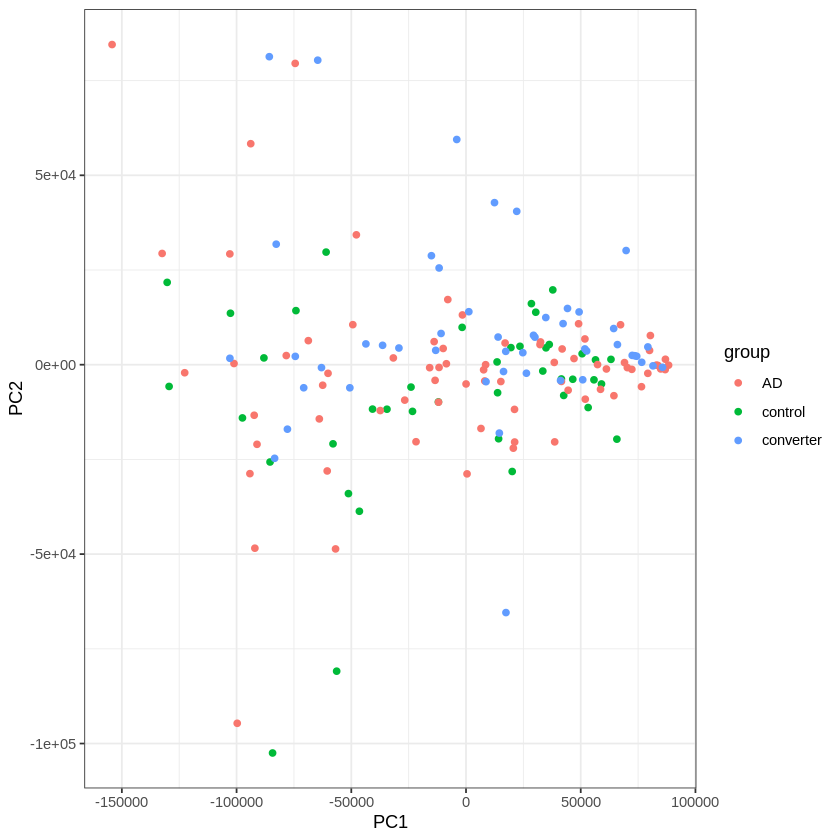

In [47]:
# Plot PCA
pca_all_df <- cbind(meta_all, pca_all$x)
ggplot(pca_all_df, aes(x=PC1, PC2, color = group)) + geom_point() + theme_bw()

In [48]:
# Subset converters
tpm_mtx_converters <- tpm %>%
    select(meta_all$sampleID) %>% # ensure columns are in same order as meta dt
    select(starts_with('C')) %>%
    as.matrix  

rownames(tpm_mtx_converters) <- tpm$gene_id

# Round TPM for DESeq
tpm_mtx_converters <- round(tpm_mtx_converters)

# Check
# dim(tpm_mtx_converters)
# dim(tpm_mtx)

head(tpm_mtx_converters)

C_1_01_1 C_1_12_1 C_1_08_1 C_1_11_1 C_1_03_1 C_1_04_1 C_2_07_1
ENSG00000223972 0        0        0        0         0       0        0       
ENSG00000227232 0        0        0        0         0       4        0       
ENSG00000278267 0        0        0        0        45       0        0       
ENSG00000243485 0        0        0        0         0       0        0       
ENSG00000274890 0        0        0        0         0       0        0       
ENSG00000237613 0        0        0        0         0       0        0       
                C_2_09_1 C_2_10_1 C_2_11_1 <U+22EF>   C_10_14_1 C_10_05_1
ENSG00000223972 0        0        0        <U+22EF> 0         0        
ENSG00000227232 0        0        0        <U+22EF> 0         0        
ENSG00000278267 0        0        0        <U+22EF> 0         0        
ENSG00000243485 0        0        0        <U+22EF> 0         0        
ENSG00000274890 0        0        0        <U+22EF> 0         0        
ENSG00000237613 0        0        0        <U+22EF> 0         0        
                C_10_08_1 C_10_03_1 C_10_10_1 C_10_13_1 C_11_09_1 C_11_01_1
ENSG00000223972 0         0         0          0        0         0        
ENSG00000227232 0         0         0         26        0         0        
ENSG00000278267 0         0         0          0        0         0        
ENSG00000243485 0         3         0          0        8         0        
ENSG00000274890 0         0         0          0        0         0        
ENSG00000237613 0         0         0          0        0         0        
                C_11_03_1 C_11_04_1
ENSG00000223972 0         0        
ENSG00000227232 0         0        
ENSG00000278267 0         0        
ENSG00000243485 0         0        
ENSG00000274890 0         0        
ENSG00000237613 0         0

In [49]:
# Compute PCA
pca_converters <- prcomp(t(tpm_mtx_converters))

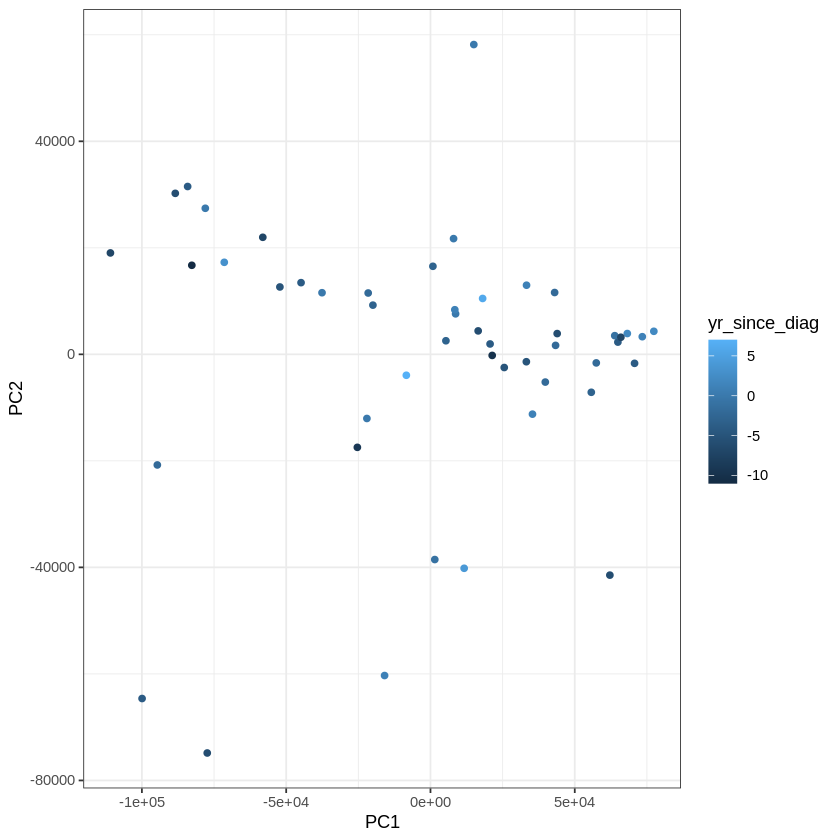

In [51]:
# Plot PCA
meta_converters <- meta_all %>% filter(group == 'converter')
pca_converters_df <- cbind(meta_converters, pca_converters$x)

ggplot(pca_converters_df, aes(x=PC1, PC2, color = yr_since_diag)) + geom_point() + theme_bw()

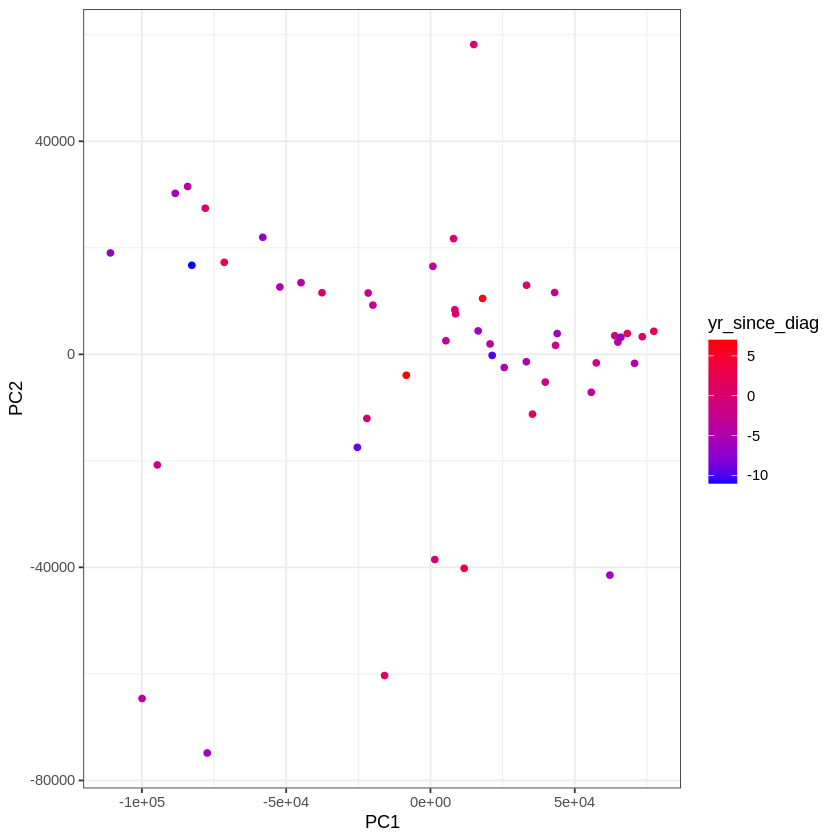

In [64]:
ggplot(pca_converters_df, aes(x=PC1, PC2)) + 
scale_color_gradient(low = "blue", high = "red") +
geom_point(aes(color = yr_since_diag)) + 
# geom_line(aes(group=donorID)) +
theme_bw()

In [65]:
summary(pca_converters)

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     5.389e+04 2.454e+04 1.355e+04 1.210e+04 8.953e+03
Proportion of Variance 7.037e-01 1.460e-01 4.449e-02 3.546e-02 1.942e-02
Cumulative Proportion  7.037e-01 8.497e-01 8.942e-01 9.297e-01 9.491e-01
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     7.798e+03 4.653e+03 3.860e+03 3.129e+03 2.967e+03
Proportion of Variance 1.473e-02 5.250e-03 3.610e-03 2.370e-03 2.130e-03
Cumulative Proportion  9.638e-01 9.691e-01 9.727e-01 9.750e-01 9.772e-01
                            PC11      PC12      PC13      PC14      PC15
Standard deviation     2721.9067 2.424e+03 2.392e+03 2.298e+03 2.234e+03
Proportion of Variance    0.0018 1.420e-03 1.390e-03 1.280e-03 1.210e-03
Cumulative Proportion     0.9790 9.804e-01 9.818e-01 9.831e-01 9.843e-01
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     2.

# AMP-AD Genes

In [66]:
ampgenes <- c("PBXIP1", "MID1IP1", "SLC25A18", "GFAP", "GNA12", "CRTAP", "QDPR", "GPRC5B", "PADI2",
             "NACC2", "RHOQ", "QKI", "CSRP1", "CALD1", "SASH1", "TNS3", "LAMP2", "ERBB2IP", "FAM107A",
             "PLXNB1", "AHNAK", "MYO10", "PDE4DIP", "ITPKB", "KCNJ10", "DOCK1","MRAS","PHGDH")


up.ampgenes <- c( "PADI2","NACC2", "RHOQ", "QKI", "CSRP1", "CALD1", "SASH1", "TNS3", "LAMP2", 
                 "ERBB2IP", "FAM107A","PLXNB1", "AHNAK", "MYO10", "PDE4DIP", "ITPKB", "KCNJ10", 
                 "DOCK1","MRAS","PHGDH")

down.ampgenes <- c("PBXIP1", "MID1IP1", "SLC25A18", "GFAP", "GNA12", "CRTAP", "QDPR", "GPRC5B")

In [344]:
length(up.ampgenes)

[1] 20

In [67]:
head(meta_converters)

donorID group     age_death sex braak_stage Year_diagnosis
1 C_1     converter 91        F   3           2010          
2 C_1     converter 91        F   3           2010          
3 C_1     converter 91        F   3           2010          
4 C_1     converter 91        F   3           2010          
5 C_1     converter 91        F   3           2010          
6 C_1     converter 91        F   3           2010          
  APOE_status         sampleID year yr_since_diag
1 \316\2653/\316\2654 C_1_01_1 2001 -9           
2 \316\2653/\316\2654 C_1_12_1 2012  2           
3 \316\2653/\316\2654 C_1_08_1 2008 -2           
4 \316\2653/\316\2654 C_1_11_1 2011  1           
5 \316\2653/\316\2654 C_1_03_1 2003 -7           
6 \316\2653/\316\2654 C_1_04_1 2004 -6

In [76]:
# Add column to converters for pre/post diagnosis

meta_converters <- meta_converters %>% 
    mutate(diagnosis = ifelse(yr_since_diag > 0, "post", "pre"))

In [77]:
head(tpm_flat)

gene_id         gene_name    gene_biotype                       sampleID tpm
1 ENSG00000223972 DDX11L1      transcribed_unprocessed_pseudogene C_1_01_1 0  
2 ENSG00000227232 WASH7P       unprocessed_pseudogene             C_1_01_1 0  
3 ENSG00000278267 MIR6859-1    miRNA                              C_1_01_1 0  
4 ENSG00000243485 RP11-34P13.3 lincRNA                            C_1_01_1 0  
5 ENSG00000274890 MIR1302-2    miRNA                              C_1_01_1 0  
6 ENSG00000237613 FAM138A      lincRNA                            C_1_01_1 0  
  donorID group     age_death sex braak_stage Year_diagnosis
1 C_1     converter 91        F   3           2010          
2 C_1     converter 91        F   3           2010          
3 C_1     converter 91        F   3           2010          
4 C_1     converter 91        F   3           2010          
5 C_1     converter 91        F   3           2010          
6 C_1     converter 91        F   3           2010          
  APOE_status         year yr_since_diag
1 \316\2653/\316\2654 2001 -9           
2 \316\2653/\316\2654 2001 -9           
3 \316\2653/\316\2654 2001 -9           
4 \316\2653/\316\2654 2001 -9           
5 \316\2653/\316\2654 2001 -9           
6 \316\2653/\316\2654 2001 -9

In [80]:
# Create flatfile for just converters

tpm_flat_converters <- tpm_flat %>%
    filter(group=='converter') %>%
    mutate(diagnosis = ifelse(yr_since_diag > 0, "post", "pre"))
    

head(tpm_flat_converters)

gene_id         gene_name    gene_biotype                       sampleID tpm
1 ENSG00000223972 DDX11L1      transcribed_unprocessed_pseudogene C_1_01_1 0  
2 ENSG00000227232 WASH7P       unprocessed_pseudogene             C_1_01_1 0  
3 ENSG00000278267 MIR6859-1    miRNA                              C_1_01_1 0  
4 ENSG00000243485 RP11-34P13.3 lincRNA                            C_1_01_1 0  
5 ENSG00000274890 MIR1302-2    miRNA                              C_1_01_1 0  
6 ENSG00000237613 FAM138A      lincRNA                            C_1_01_1 0  
  donorID group     age_death sex braak_stage Year_diagnosis
1 C_1     converter 91        F   3           2010          
2 C_1     converter 91        F   3           2010          
3 C_1     converter 91        F   3           2010          
4 C_1     converter 91        F   3           2010          
5 C_1     converter 91        F   3           2010          
6 C_1     converter 91        F   3           2010          
  APOE_status         year yr_since_diag diagnosis
1 \316\2653/\316\2654 2001 -9            pre      
2 \316\2653/\316\2654 2001 -9            pre      
3 \316\2653/\316\2654 2001 -9            pre      
4 \316\2653/\316\2654 2001 -9            pre      
5 \316\2653/\316\2654 2001 -9            pre      
6 \316\2653/\316\2654 2001 -9            pre

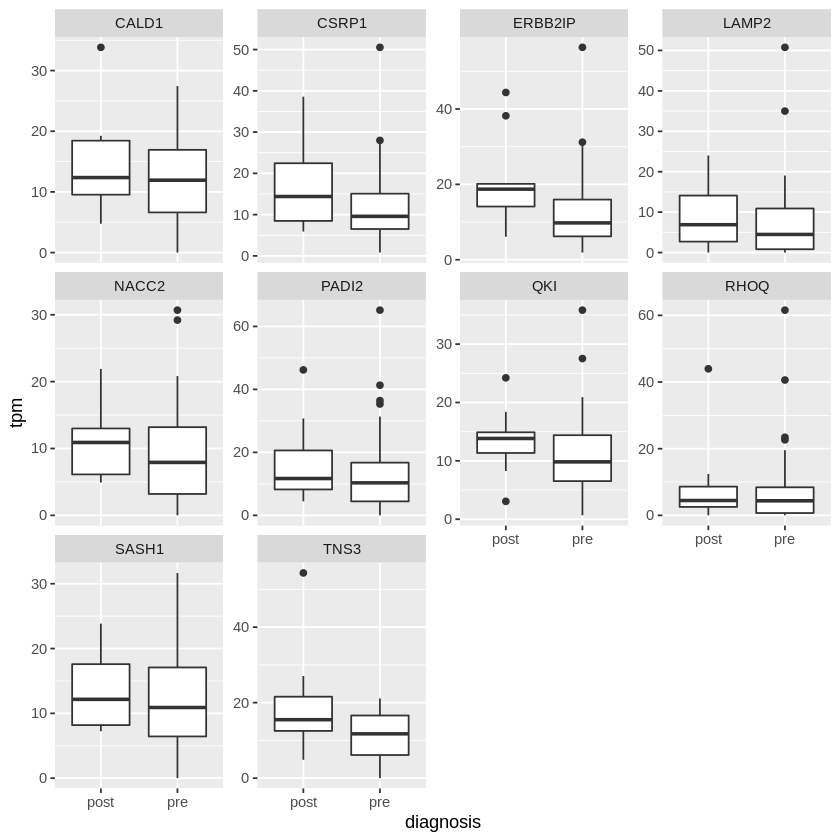

In [81]:
tpm_flat_converters %>%
    filter(gene_name %in% up.ampgenes[1:10]) %>%
    ggplot(aes(x=diagnosis, y=tpm)) +
    geom_boxplot() + 
    facet_wrap(~gene_name, scales="free_y")

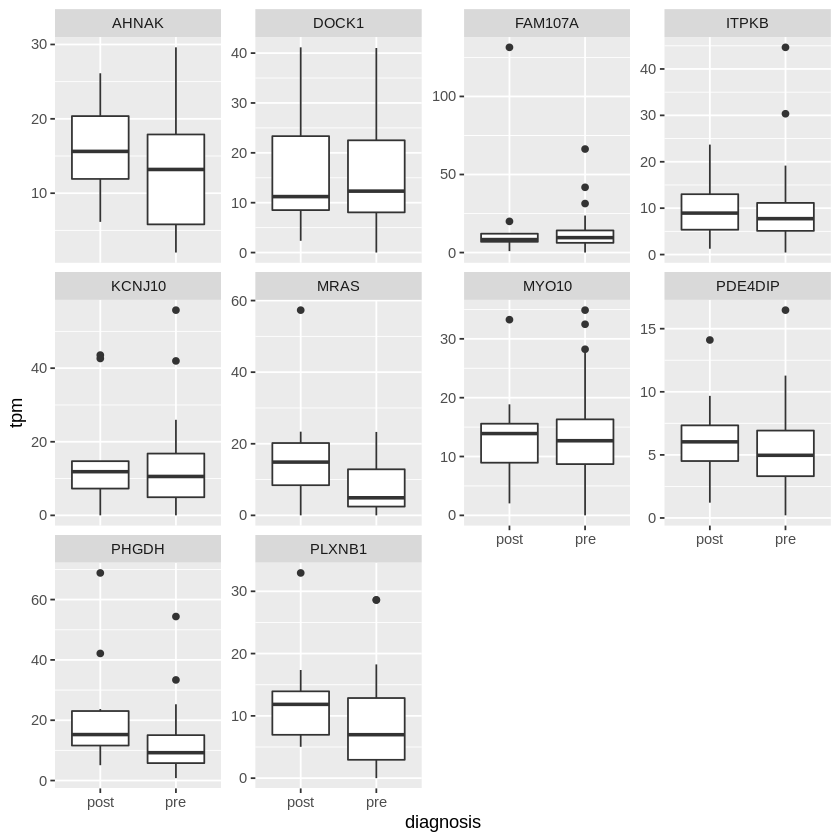

In [82]:
tpm_flat_converters %>%
    filter(gene_name %in% up.ampgenes[11:20]) %>%
    ggplot(aes(x=diagnosis, y=tpm)) +
    geom_boxplot() + 
    facet_wrap(~gene_name, scales="free_y")

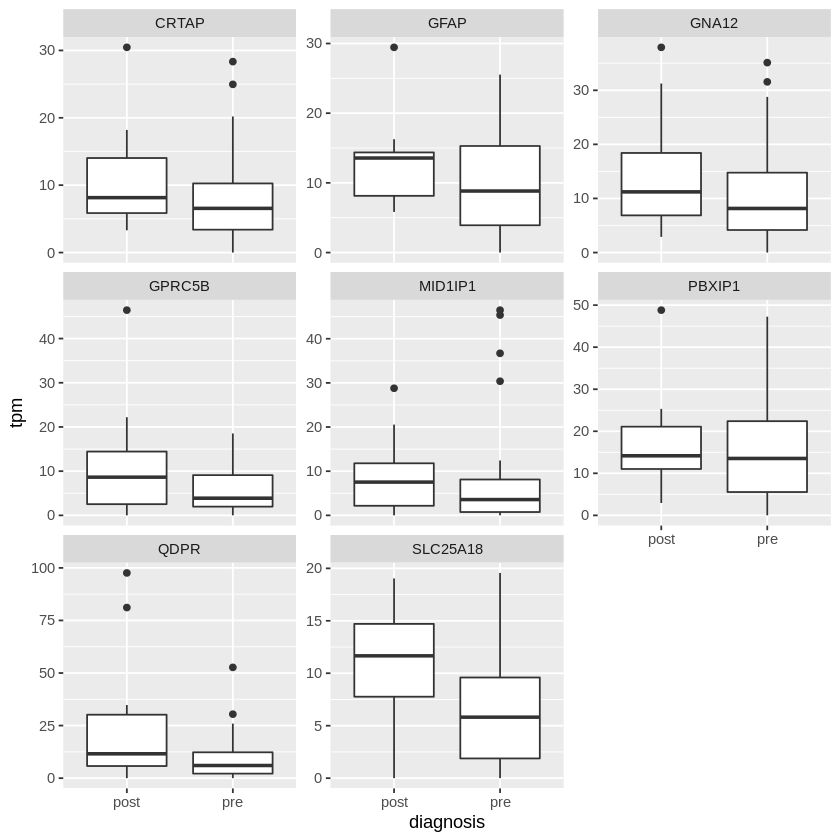

In [83]:
tpm_flat_converters %>%
    filter(gene_name %in% down.ampgenes) %>%
    ggplot(aes(x=diagnosis, y=tpm)) +
    geom_boxplot() + 
    facet_wrap(~gene_name, scales="free_y")

`geom_smooth()` using formula 'y ~ x'



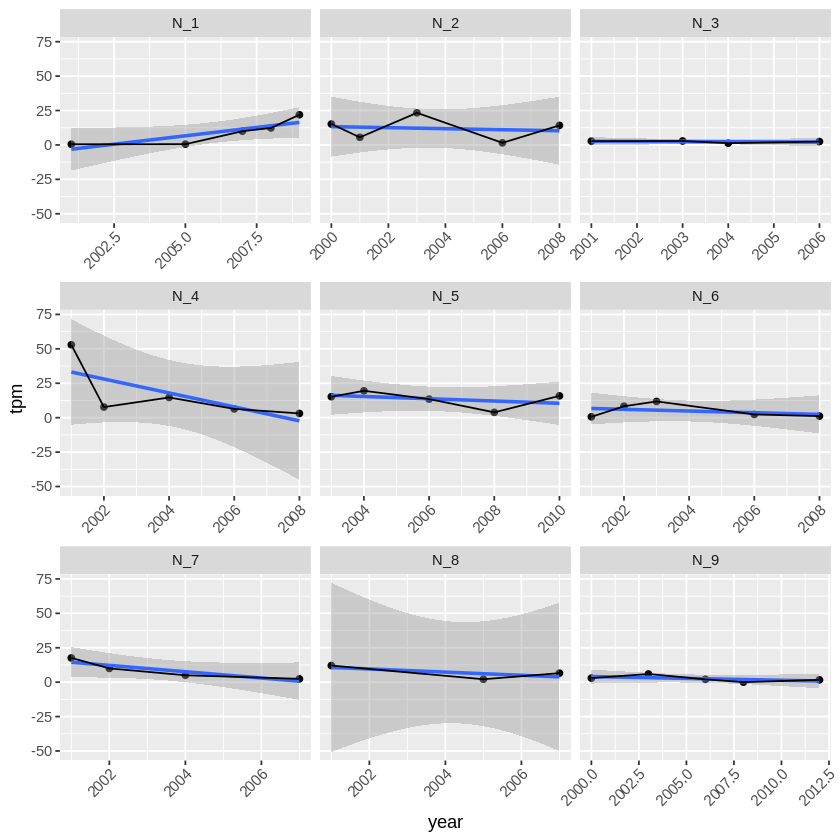

In [93]:
# look at SLC25A18 over time for controls

tpm_flat %>%
    filter(gene_name == 'SLC25A18', group=='control') %>%
    ggplot(aes(x=year, y=tpm)) +
    geom_point() + 
    geom_smooth(method =  "lm") + 
    geom_line() + facet_wrap(~donorID, scales="free_x") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))

`geom_smooth()` using formula 'y ~ x'



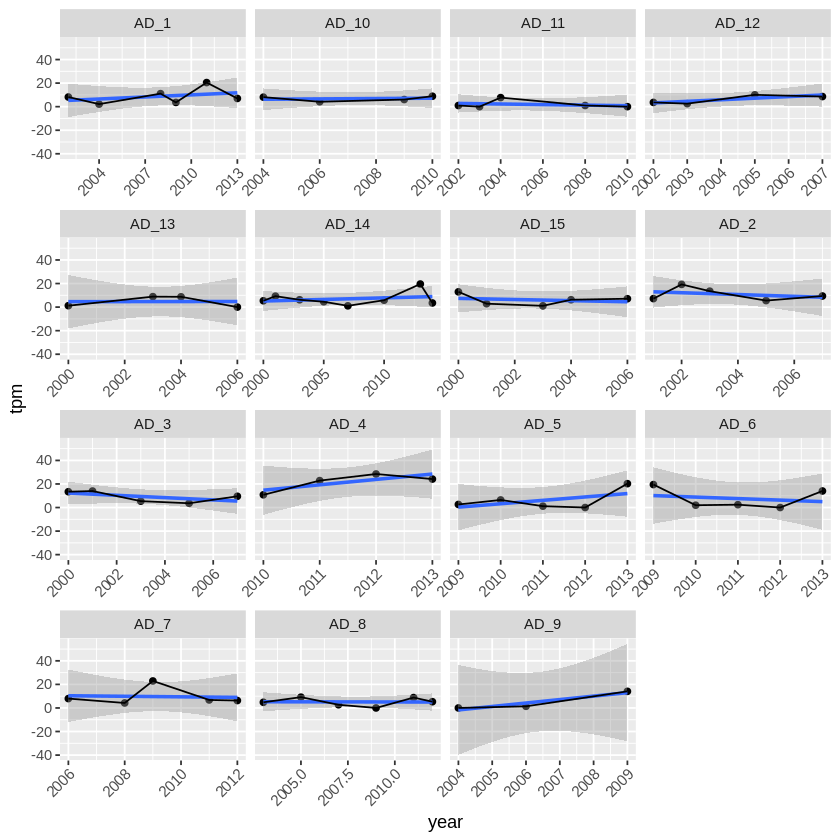

In [94]:
# look at SLC25A18 over time for AD

tpm_flat %>%
    filter(gene_name == 'SLC25A18', group=='AD') %>%
    ggplot(aes(x=year, y=tpm)) +
    geom_point() + 
    geom_smooth(method =  "lm") + 
    geom_line() + facet_wrap(~donorID, scales="free_x") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))

`geom_smooth()` using formula 'y ~ x'



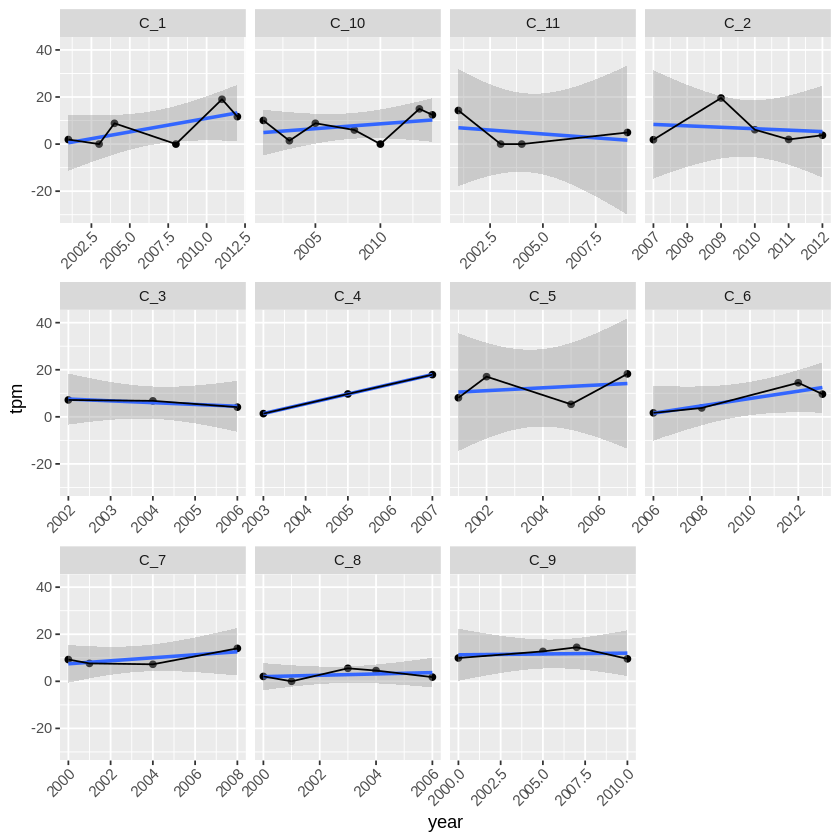

In [95]:
# look at SLC25A18 over time for converters

tpm_flat %>%
    filter(gene_name == 'SLC25A18', group=='converter') %>%
    ggplot(aes(x=year, y=tpm)) +
    geom_point() + 
    geom_smooth(method =  "lm") + 
    geom_line() + facet_wrap(~donorID, scales="free_x") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))

# External AD relevant genes

In [96]:
# From https://www.nature.com/articles/s41598-020-64452-z

hippocampus_up <- c('SPARC', 'BOC', 'S100A6', 'SMAD9', 'CYLC1')
hippocampus_down <- c('WFDC1', 'THYN1', 'KALRN', 'TNNI3K', 'RIMS2')

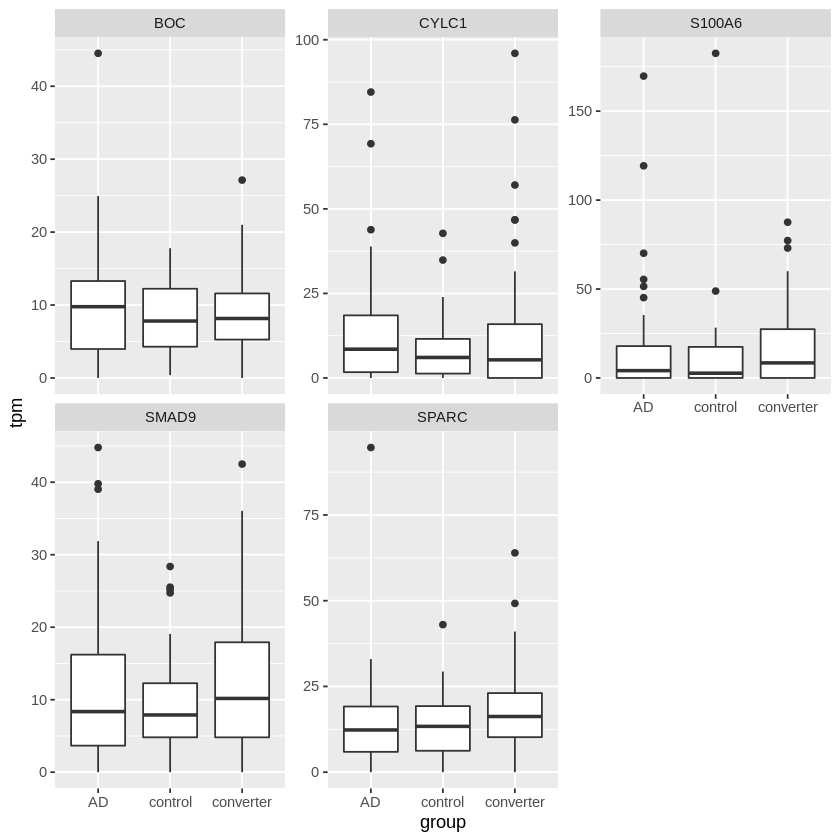

In [98]:
tpm_flat %>%
    filter(gene_name %in% hippocampus_up) %>%
    ggplot(aes(x=group, y = tpm)) + 
    geom_boxplot() + 
    facet_wrap(~gene_name, scales="free_y")

# no go

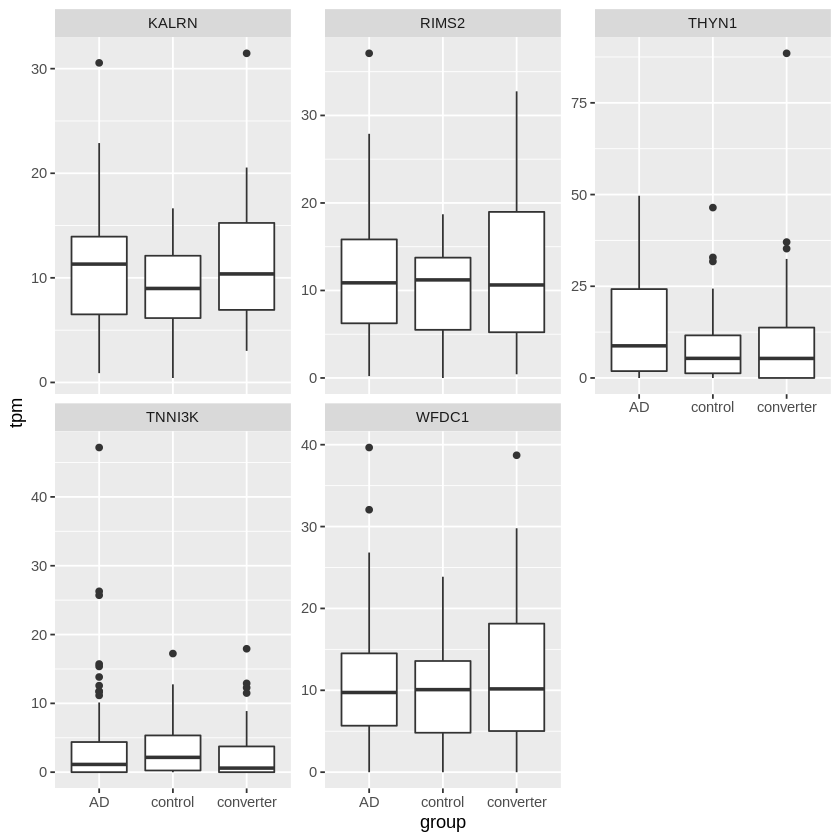

In [99]:
tpm_flat %>%
    filter(gene_name %in% hippocampus_down) %>%
    ggplot(aes(x=group, y = tpm)) + 
    geom_boxplot() + 
    facet_wrap(~gene_name, scales="free_y")

# no go

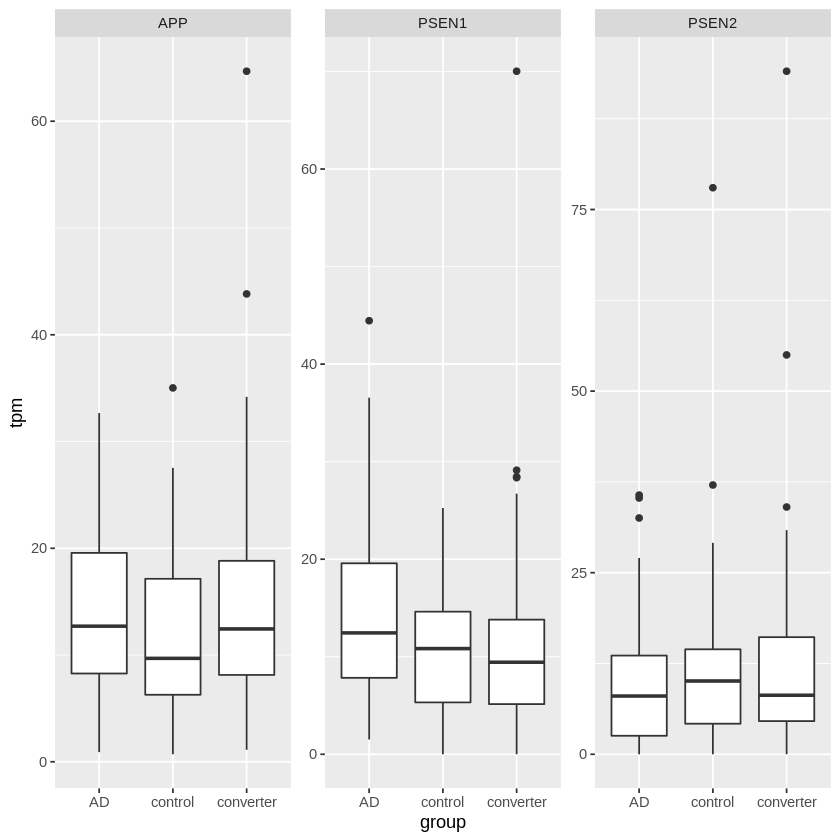

In [100]:
# https://doi.org/10.1016/j.gene.2014.05.031

kim_2014 <- c('APP', 'PSEN1', 'PSEN2')

tpm_flat %>%
    filter(gene_name %in% kim_2014) %>%
    ggplot(aes(x=group, y = tpm)) + 
    geom_boxplot() + 
    facet_wrap(~gene_name, scales="free_y")

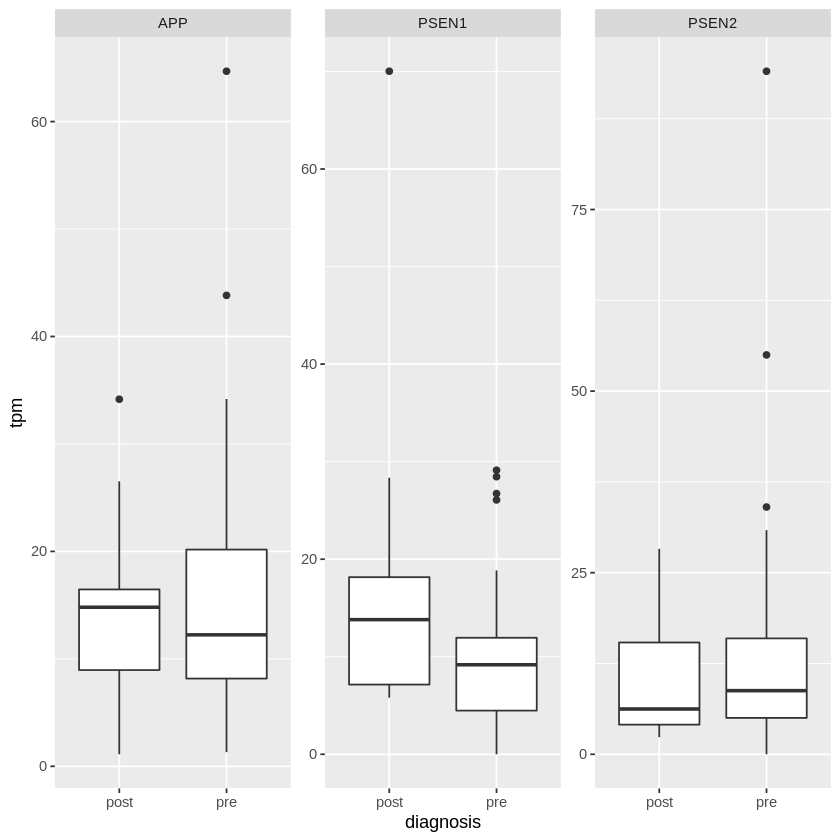

In [101]:
tpm_flat_converters %>%
    filter(gene_name %in% kim_2014) %>%
    ggplot(aes(x=diagnosis, y=tpm)) +
    geom_boxplot() + 
    facet_wrap(~gene_name, scales="free_y")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



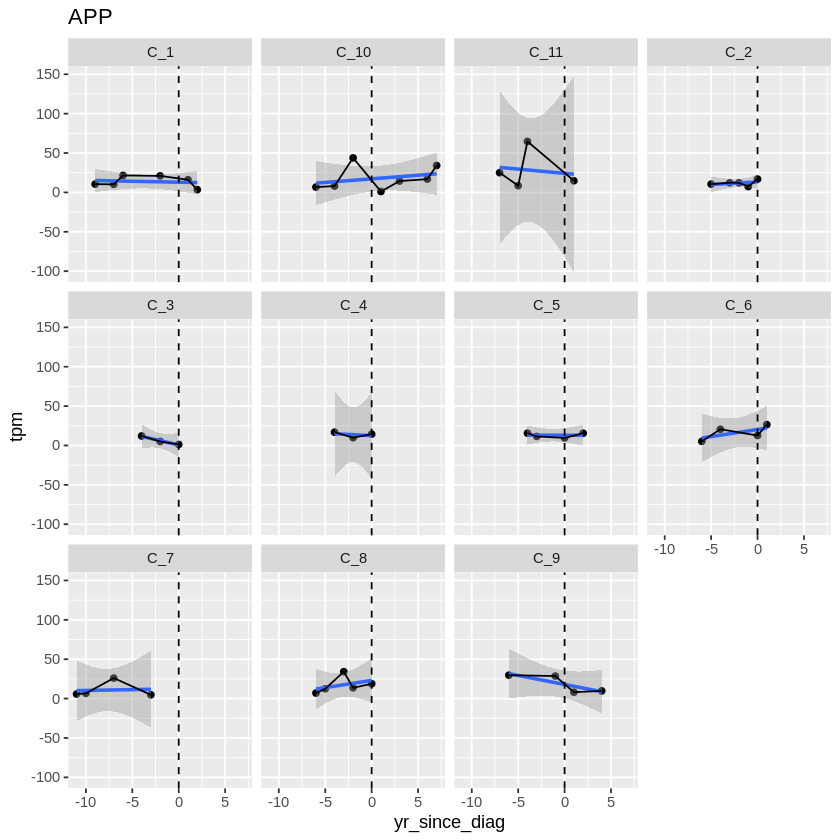

`geom_smooth()` using formula 'y ~ x'



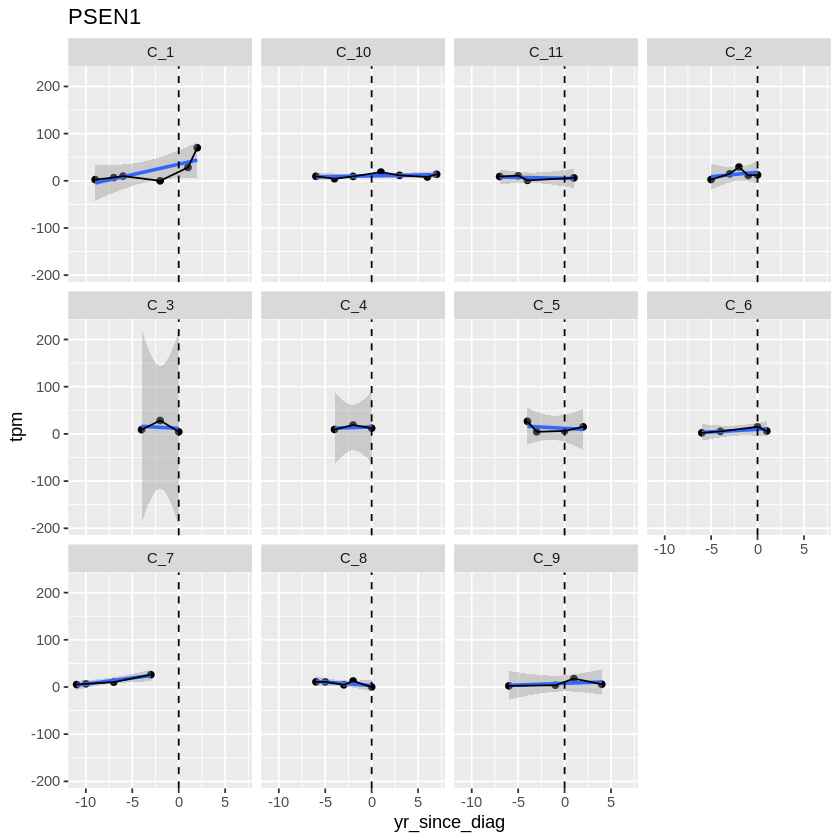

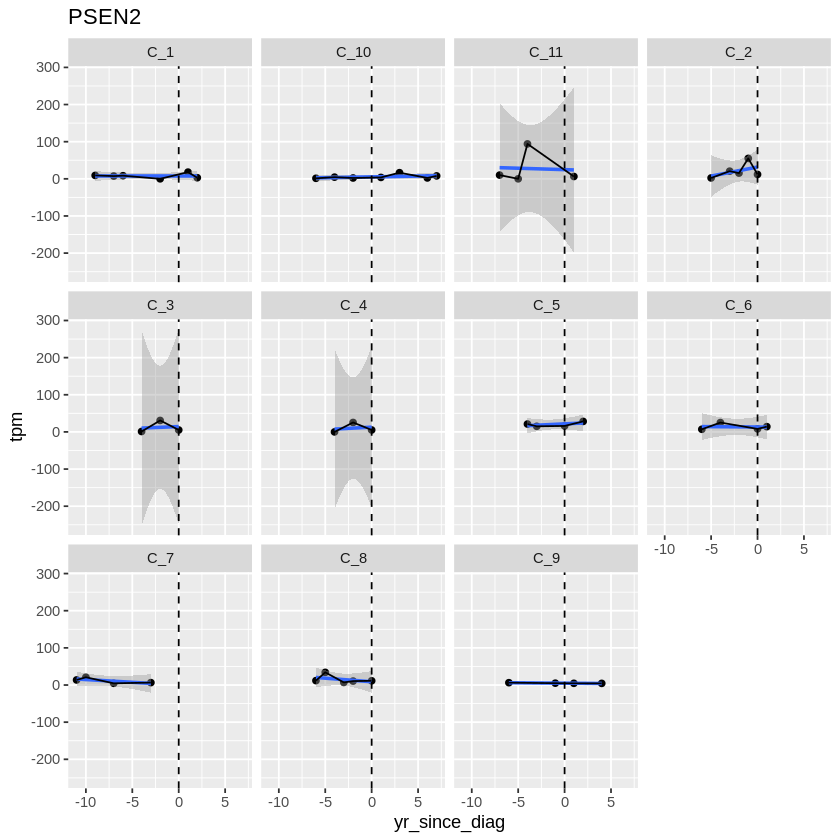

In [103]:
# Look at kim_2014 genes over time for converters

for (g in kim_2014) {
    df <- tpm_flat %>%
        filter(gene_name %in% g, group=="converter")
    show(ggplot(df, aes(x=yr_since_diag,y=tpm)) + 
         geom_point() + 
         geom_smooth(method =  "lm") +
         geom_vline(xintercept = 0, linetype= "dashed") +
         geom_line() + facet_wrap(~donorID) + 
         ggtitle(g))
}

# APP mostly increases over time (exceptions in C_11, C_3, C_9)
# Hard to tell with PSEN1 (mostly increasing), PSEN2 (mostly flat)

# Linear mixed models

In [104]:
library(lme4)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




In [ ]:
# Can we use PHGDH as a proxy for AD?
# Can we use the combination of upregulated genes/downregulated genes? 
# ie a super simple sum(up) - sum(down)? No

# scaled using the log2fc or the normalized log2fc relative to the PHGDGH

In [229]:
# Natalie's log2fc
# log2fc extracted from Figure in paper above
ranklog.ampgenes.dt <- read.csv("~/analysis/classes/cse283/amp_ad_log2fc.csv",stringsAsFactor=F, header=T) %>%
    arrange(desc(log2fc))
ranklog.ampgenes.dt

gene     log2fc     
1  PHGDH     0.77880795
2  MRAS      0.37350993
3  DOCK1     0.29006623
4  KCNJ10    0.27814570
5  ITPKB     0.26622517
6  PDE4DIP   0.25430464
7  MYO10     0.23642384
8  AHNAK     0.21854305
9  PLXNB1    0.18874172
10 FAM107A   0.17682119
11 ERBB2IP   0.15298013
12 LAMP2     0.13509934
13 TNS3      0.11721854
14 CALD1     0.09933775
15 SASH1     0.09933775
16 QKI       0.07549669
17 CSRP1     0.07549669
18 RHOQ      0.05165563
19 NACC2     0.03973510
20 PADI2     0.01589404
21 GPRC5B   -0.01390728
22 QDPR     -0.07350993
23 GNA12    -0.13311258
24 CRTAP    -0.13311258
25 GFAP     -0.18079470
26 SLC25A18 -0.20463576
27 MID1IP1  -0.28211921
28 PBXIP1   -0.31788079

In [107]:
head(tpm)

gene_id         gene_name    gene_biotype                       C_1_01_1
1 ENSG00000223972 DDX11L1      transcribed_unprocessed_pseudogene 0       
2 ENSG00000227232 WASH7P       unprocessed_pseudogene             0       
3 ENSG00000278267 MIR6859-1    miRNA                              0       
4 ENSG00000243485 RP11-34P13.3 lincRNA                            0       
5 ENSG00000274890 MIR1302-2    miRNA                              0       
6 ENSG00000237613 FAM138A      lincRNA                            0       
  AD_8_12_1 C_10_01_1 C_10_14_1 C_10_05_1 C_10_08_1 AD_11_08_1 <U+22EF>  
1 0         0         0         0         0         0          <U+22EF>
2 0         0         0         0         0         0          <U+22EF>
3 0         0         0         0         0         0          <U+22EF>
4 0         0         0         0         0         0          <U+22EF>
5 0         0         0         0         0         0          <U+22EF>
6 0         0         0         0         0         0          <U+22EF>
  AD_5_12_1 AD_5_13_1 AD_3_00_1 AD_3_01_1 AD_3_03_1 AD_2_01_1 AD_2_02_1
1 0         0         0         0         0         0         0        
2 0         0         0         0         0         0         0        
3 0         0         0         0         0         0         0        
4 0         0         0         0         0         0         0        
5 0         0         0         0         0         0         0        
6 0         0         0         0         0         0         0        
  AD_2_03_1 AD_2_05_1 AD_2_07_1
1 0          0.00000  0.000000 
2 0         11.62609  5.503961 
3 0          0.00000  0.000000 
4 0          0.00000  0.000000 
5 0          0.00000  0.000000 
6 0          0.00000  0.000000

In [113]:
tpm$gene_id %>% unique() %>% length()

[1] 60675

In [110]:
dim(tpm)

[1] 60675   167

In [112]:
60675 - 58830

[1] 1845

In [121]:
# Transpose tpm

tpm_t <- tpm %>%
select(-gene_biotype, -gene_name) %>%
column_to_rownames(var='gene_id') %>%
t() %>%
data.frame()

In [122]:
head(tpm_t)

ENSG00000223972 ENSG00000227232 ENSG00000278267 ENSG00000243485
C_1_01_1  0               0               0               0              
AD_8_12_1 0               0               0               0              
C_10_01_1 0               0               0               0              
C_10_14_1 0               0               0               0              
C_10_05_1 0               0               0               0              
C_10_08_1 0               0               0               0              
          ENSG00000274890 ENSG00000237613 ENSG00000268020 ENSG00000240361
C_1_01_1  0               0               0                0.00000       
AD_8_12_1 0               0               0               10.01667       
C_10_01_1 0               0               0                0.00000       
C_10_14_1 0               0               0                0.00000       
C_10_05_1 0               0               0                0.00000       
C_10_08_1 0               0               0                0.00000       
          ENSG00000186092 ENSG00000238009 <U+22EF>   ENSG00000277107
C_1_01_1  0               6.752906        <U+22EF> 1158.174       
AD_8_12_1 0               0.000000        <U+22EF>    0.000       
C_10_01_1 0               0.000000        <U+22EF>    0.000       
C_10_14_1 0               0.000000        <U+22EF>    0.000       
C_10_05_1 0               0.000000        <U+22EF>    0.000       
C_10_08_1 0               0.000000        <U+22EF>    0.000       
          ENSG00000274264 ENSG00000276946 ENSG00000278858 ENSG00000277905
C_1_01_1  0                 0.0000          0.0000        0              
AD_8_12_1 0               359.6262        191.3754        0              
C_10_01_1 0                 0.0000          0.0000        0              
C_10_14_1 0                 0.0000        119.6032        0              
C_10_05_1 0                 0.0000          0.0000        0              
C_10_08_1 0                 0.0000          0.0000        0              
          ENSG00000275028 ENSG00000278806 ENSG00000274152 ENSG00000276666
C_1_01_1   0.00000        0               0               0              
AD_8_12_1  0.00000        0               0               0              
C_10_01_1  0.00000        0               0               0              
C_10_14_1 58.37777        0               0               0              
C_10_05_1  0.00000        0               0               0              
C_10_08_1  0.00000        0               0               0              
          ENSG00000277917
C_1_01_1  0              
AD_8_12_1 0              
C_10_01_1 0              
C_10_14_1 0              
C_10_05_1 0              
C_10_08_1 0

In [118]:
# Subset to only amp-ad genes
gene_id_names_amp <- tpm %>%
select(gene_id, gene_name) %>%
filter(gene_name %in% ampgenes)

In [125]:
gene_id_names_amp

gene_id         gene_name
1  ENSG00000117115 PADI2    
2  ENSG00000092621 PHGDH    
3  ENSG00000178104 PDE4DIP  
4  ENSG00000163346 PBXIP1   
5  ENSG00000177807 KCNJ10   
6  ENSG00000159176 CSRP1    
7  ENSG00000143772 ITPKB    
8  ENSG00000119729 RHOQ     
9  ENSG00000170275 CRTAP    
10 ENSG00000164050 PLXNB1   
11 ENSG00000168309 FAM107A  
12 ENSG00000158186 MRAS     
13 ENSG00000151552 QDPR     
14 ENSG00000145555 MYO10    
15 ENSG00000112851 ERBB2IP  
16 ENSG00000111961 SASH1    
17 ENSG00000112531 QKI      
18 ENSG00000146535 GNA12    
19 ENSG00000136205 TNS3     
20 ENSG00000122786 CALD1    
21 ENSG00000165175 MID1IP1  
22 ENSG00000005893 LAMP2    
23 ENSG00000148411 NACC2    
24 ENSG00000124942 AHNAK    
25 ENSG00000150760 DOCK1    
26 ENSG00000167191 GPRC5B   
27 ENSG00000131095 GFAP     
28 ENSG00000182902 SLC25A18

In [126]:
# Create df with only amp-ad genes, where each gene is a column and each row is an individual
tpm_t_ampgenes <- tpm_t %>%
select(one_of(gene_id_names_amp$gene_id))

names(tpm_t_ampgenes) <- gene_id_names_amp$gene_name

In [248]:
head(tpm_t_ampgenes)

PADI2     PHGDH     PDE4DIP   PBXIP1    KCNJ10    CSRP1     ITPKB    
C_1_01_1   8.027283 10.171618  3.312303 24.946904 18.582642  6.207309 19.180816
AD_8_12_1  7.867369 28.471425  5.681055  4.074988  2.964818  3.954374 13.382131
C_10_01_1  8.845907  5.649296  6.323784  4.123649  1.000074  1.026050  5.266307
C_10_14_1 11.472637  9.594639  6.035800 10.186928  8.338106  7.128900 23.696263
C_10_05_1 16.820785 11.935916  7.895127 15.246885 12.677823 21.136565  7.152898
C_10_08_1 30.779285  7.560268 14.104854 16.555631 14.722025 21.283494  2.013636
          RHOQ      CRTAP     PLXNB1    <U+22EF>   TNS3      CALD1     MID1IP1  
C_1_01_1   0.990428  4.441541  2.585157 <U+22EF> 19.777413 13.943271  4.224737
AD_8_12_1  4.076929 18.282850 14.188478 <U+22EF>  9.843737 28.378693 22.359105
C_10_01_1  0.000000  2.371945 10.877203 <U+22EF>  1.794826 27.426895  0.000000
C_10_14_1  5.308219 13.916493  5.038254 <U+22EF> 14.548668 17.935017  9.057026
C_10_05_1 12.711789  6.264350  3.447227 <U+22EF> 19.197681  6.817405 46.476849
C_10_08_1  4.600977  5.290493  5.822641 <U+22EF> 12.610273 33.825726 20.560337
          LAMP2    NACC2    AHNAK     DOCK1     GPRC5B    GFAP      SLC25A18 
C_1_01_1   0.00000 9.197783 29.613315  0.000000 18.526961 17.288876  1.929883
AD_8_12_1 17.60681 3.916667 22.090016 14.648136 10.356716  5.672710  5.296023
C_10_01_1 50.76904 2.201910  4.623049 13.652813  1.587938  6.088356 10.048622
C_10_14_1 17.74786 6.119467 15.619390 10.238695  2.942092  8.863138 12.411894
C_10_05_1 16.69700 2.326113 11.634988  7.211466 16.355713 13.782393  8.846198
C_10_08_1 15.38322 4.911239 19.288489 26.971640  2.125085 13.967737  5.976773

In [137]:
# Add columns for sums of up and down regulated amp genes
tpm_t_ampgenes_sums <- tpm_t_ampgenes %>%
mutate(up_sum = select(tpm_t_ampgenes, one_of(up.ampgenes)) %>% rowSums()) %>%
mutate(down_sum = select(tpm_t_ampgenes, one_of(down.ampgenes)) %>% rowSums()) %>%
mutate(amp_diff = up_sum - down_sum) %>%
rownames_to_column(var = "sampleID") 

In [138]:
head(tpm_t_ampgenes_sums)

sampleID  PADI2     PHGDH     PDE4DIP   PBXIP1    KCNJ10    CSRP1    
1 C_1_01_1   8.027283 10.171618  3.312303 24.946904 18.582642  6.207309
2 AD_8_12_1  7.867369 28.471425  5.681055  4.074988  2.964818  3.954374
3 C_10_01_1  8.845907  5.649296  6.323784  4.123649  1.000074  1.026050
4 C_10_14_1 11.472637  9.594639  6.035800 10.186928  8.338106  7.128900
5 C_10_05_1 16.820785 11.935916  7.895127 15.246885 12.677823 21.136565
6 C_10_08_1 30.779285  7.560268 14.104854 16.555631 14.722025 21.283494
  ITPKB     RHOQ      CRTAP     <U+22EF>   LAMP2    NACC2    AHNAK     DOCK1    
1 19.180816  0.990428  4.441541 <U+22EF>  0.00000 9.197783 29.613315  0.000000
2 13.382131  4.076929 18.282850 <U+22EF> 17.60681 3.916667 22.090016 14.648136
3  5.266307  0.000000  2.371945 <U+22EF> 50.76904 2.201910  4.623049 13.652813
4 23.696263  5.308219 13.916493 <U+22EF> 17.74786 6.119467 15.619390 10.238695
5  7.152898 12.711789  6.264350 <U+22EF> 16.69700 2.326113 11.634988  7.211466
6  2.013636  4.600977  5.290493 <U+22EF> 15.38322 4.911239 19.288489 26.971640
  GPRC5B    GFAP      SLC25A18  up_sum   down_sum  amp_diff 
1 18.526961 17.288876  1.929883 215.5524 115.84113  99.71126
2 10.356716  5.672710  5.296023 259.8685  71.68392 188.18460
3  1.587938  6.088356 10.048622 208.4585  61.42112 147.03736
4  2.942092  8.863138 12.411894 235.4541  86.22882 149.22525
5 16.355713 13.782393  8.846198 265.1570 122.04879 143.10819
6  2.125085 13.967737  5.976773 302.3332 107.30777 195.02539

In [259]:
ranklog.ampgenes.matrix <- data.matrix(ranklog.ampgenes.dt$log2fc)

ranklog.ampgenes.matrix

[,1]       
 [1,]  0.77880795
 [2,]  0.37350993
 [3,]  0.29006623
 [4,]  0.27814570
 [5,]  0.26622517
 [6,]  0.25430464
 [7,]  0.23642384
 [8,]  0.21854305
 [9,]  0.18874172
[10,]  0.17682119
[11,]  0.15298013
[12,]  0.13509934
[13,]  0.11721854
[14,]  0.09933775
[15,]  0.09933775
[16,]  0.07549669
[17,]  0.07549669
[18,]  0.05165563
[19,]  0.03973510
[20,]  0.01589404
[21,] -0.01390728
[22,] -0.07350993
[23,] -0.13311258
[24,] -0.13311258
[25,] -0.18079470
[26,] -0.20463576
[27,] -0.28211921
[28,] -0.31788079

In [252]:
ranklog.ampgenes_geneOrder <- list(ranklog.ampgenes.dt$gene)[[1]]

In [267]:
# Scale tpm_t_ampgenes by log2fc

tpm_t_ampgenes_ordered <- tpm_t_ampgenes[ ,c(ranklog.ampgenes_geneOrder)] # order to same order as log2fc
# tpm_t_ampgenes_ordered_matrix <- data.matrix(tpm_t_ampgenes_ordered)

head(tpm_t_ampgenes_ordered)

PHGDH     MRAS       DOCK1     KCNJ10    ITPKB     PDE4DIP  
C_1_01_1  10.171618  0.7187411  0.000000 18.582642 19.180816  3.312303
AD_8_12_1 28.471425 10.8481114 14.648136  2.964818 13.382131  5.681055
C_10_01_1  5.649296 13.3062453 13.652813  1.000074  5.266307  6.323784
C_10_14_1  9.594639  8.4746361 10.238695  8.338106 23.696263  6.035800
C_10_05_1 11.935916 10.5426107  7.211466 12.677823  7.152898  7.895127
C_10_08_1  7.560268 23.3720950 26.971640 14.722025  2.013636 14.104854
          MYO10     AHNAK     PLXNB1    FAM107A   <U+22EF>   NACC2    PADI2    
C_1_01_1  22.115457 29.613315  2.585157  8.167727 <U+22EF> 9.197783  8.027283
AD_8_12_1 15.060033 22.090016 14.188478  7.078119 <U+22EF> 3.916667  7.867369
C_10_01_1 14.405847  4.623049 10.877203 22.880659 <U+22EF> 2.201910  8.845907
C_10_14_1 15.803765 15.619390  5.038254  8.294229 <U+22EF> 6.119467 11.472637
C_10_05_1 28.234215 11.634988  3.447227  4.729166 <U+22EF> 2.326113 16.820785
C_10_08_1  2.029355 19.288489  5.822641 19.969848 <U+22EF> 4.911239 30.779285
          GPRC5B    QDPR      GNA12     CRTAP     GFAP      SLC25A18  MID1IP1  
C_1_01_1  18.526961 15.702930 28.779298  4.441541 17.288876  1.929883  4.224737
AD_8_12_1 10.356716  1.026007  4.615523 18.282850  5.672710  5.296023 22.359105
C_10_01_1  1.587938 25.956476 11.244131  2.371945  6.088356 10.048622  0.000000
C_10_14_1  2.942092 17.633560 11.217689 13.916493  8.863138 12.411894  9.057026
C_10_05_1 16.355713  0.000000 15.076407  6.264350 13.782393  8.846198 46.476849
C_10_08_1  2.125085 11.578899 31.252812  5.290493 13.967737  5.976773 20.560337
          PBXIP1   
C_1_01_1  24.946904
AD_8_12_1  4.074988
C_10_01_1  4.123649
C_10_14_1 10.186928
C_10_05_1 15.246885
C_10_08_1 16.555631

In [534]:
ranklog.ampgenes.dt

gene     log2fc     
1  PHGDH     0.77880795
2  MRAS      0.37350993
3  DOCK1     0.29006623
4  KCNJ10    0.27814570
5  ITPKB     0.26622517
6  PDE4DIP   0.25430464
7  MYO10     0.23642384
8  AHNAK     0.21854305
9  PLXNB1    0.18874172
10 FAM107A   0.17682119
11 ERBB2IP   0.15298013
12 LAMP2     0.13509934
13 TNS3      0.11721854
14 CALD1     0.09933775
15 SASH1     0.09933775
16 QKI       0.07549669
17 CSRP1     0.07549669
18 RHOQ      0.05165563
19 NACC2     0.03973510
20 PADI2     0.01589404
21 GPRC5B   -0.01390728
22 QDPR     -0.07350993
23 GNA12    -0.13311258
24 CRTAP    -0.13311258
25 GFAP     -0.18079470
26 SLC25A18 -0.20463576
27 MID1IP1  -0.28211921
28 PBXIP1   -0.31788079

In [278]:
dim(tpm_t_ampgenes_ordered)[1]

[1] 164

In [279]:
tpm_t_ampgenes_ordered_scaled <- tpm_t_ampgenes_ordered
for (i in 1:length(ranklog.ampgenes_geneOrder)){
    log2fc_value = ranklog.ampgenes.dt[i, 'log2fc']
    for(j in 1:dim(tpm_t_ampgenes_ordered)[1]){
        tpm_t_ampgenes_ordered_scaled[j, i] = tpm_t_ampgenes_ordered[j, i] * log2fc_value
    }
}

In [575]:
# Scale by log2fc(gene)/log2fc(PHGDH)

tpm_t_ampgenes_ordered_scaled_2 <- tpm_t_ampgenes_ordered
for (i in 1:length(ranklog.ampgenes_geneOrder)){
    log2fc_value = ranklog.ampgenes.dt[i, 'log2fc'] / ranklog.ampgenes.dt[1, 'log2fc']
    for(j in 1:dim(tpm_t_ampgenes_ordered)[1]){
        tpm_t_ampgenes_ordered_scaled_2[j, i] = tpm_t_ampgenes_ordered[j, i] * log2fc_value
    }
}

head(tpm_t_ampgenes_ordered_scaled_2)

PHGDH     MRAS       DOCK1     KCNJ10    ITPKB     PDE4DIP  MYO10    
C_1_01_1  10.171618  0.3447024  0.000000 6.6366578 6.5567074 1.081568 6.7136208
AD_8_12_1 28.471425  5.2026656  5.455683 1.0588634 4.5745041 1.855039 4.5717957
C_10_01_1  5.649296  6.3815665  5.084976 0.3571692 1.8002172 2.064909 4.3732036
C_10_14_1  9.594639  4.0643662  3.813392 2.9778949 8.1002534 1.970874 4.7975714
C_10_05_1 11.935916  5.0561500  2.685903 4.5277940 2.4451232 2.578001 8.5711008
C_10_08_1  7.560268 11.2090658 10.045560 5.2578661 0.6883347 4.605667 0.6160542
          AHNAK    PLXNB1    FAM107A  <U+22EF>   NACC2     PADI2     GPRC5B     
C_1_01_1  8.309859 0.6265048 1.854407 <U+22EF> 0.4692747 0.1638221 -0.33083848
AD_8_12_1 6.198729 3.4385342 1.607022 <U+22EF> 0.1998300 0.1605586 -0.18494130
C_10_01_1 1.297284 2.6360567 5.194843 <U+22EF> 0.1123423 0.1805287 -0.02835602
C_10_14_1 4.382992 1.2210054 1.883129 <U+22EF> 0.3122177 0.2341354 -0.05253735
C_10_05_1 3.264920 0.8354249 1.073714 <U+22EF> 0.1186793 0.3432813 -0.29206621
C_10_08_1 5.412586 1.4110992 4.533970 <U+22EF> 0.2505734 0.6281487 -0.03794793
          QDPR        GNA12      CRTAP      GFAP      SLC25A18   MID1IP1   
C_1_01_1  -1.48216427 -4.9189105 -0.7591409 -4.013489 -0.5070865  -1.530390
AD_8_12_1 -0.09684251 -0.7888777 -3.1248747 -1.316879 -1.3915571  -8.099472
C_10_01_1 -2.44997338 -1.9218284 -0.4054090 -1.413368 -2.6403266   0.000000
C_10_14_1 -1.66439202 -1.9173090 -2.3785842 -2.057514 -3.2612886  -3.280861
C_10_05_1  0.00000000 -2.5768348 -1.0706924 -3.199484 -2.3243835 -16.836002
C_10_08_1 -1.09290627 -5.3416795 -0.9042425 -3.242510 -1.5704277  -7.447877
          PBXIP1    
C_1_01_1  -10.182410
AD_8_12_1  -1.663260
C_10_01_1  -1.683122
C_10_14_1  -4.157930
C_10_05_1  -6.223218
C_10_08_1  -6.757400

In [576]:
head(tpm_t_ampgenes_ordered)

PHGDH     MRAS       DOCK1     KCNJ10    ITPKB     PDE4DIP  
C_1_01_1  10.171618  0.7187411  0.000000 18.582642 19.180816  3.312303
AD_8_12_1 28.471425 10.8481114 14.648136  2.964818 13.382131  5.681055
C_10_01_1  5.649296 13.3062453 13.652813  1.000074  5.266307  6.323784
C_10_14_1  9.594639  8.4746361 10.238695  8.338106 23.696263  6.035800
C_10_05_1 11.935916 10.5426107  7.211466 12.677823  7.152898  7.895127
C_10_08_1  7.560268 23.3720950 26.971640 14.722025  2.013636 14.104854
          MYO10     AHNAK     PLXNB1    FAM107A   <U+22EF>   NACC2    PADI2    
C_1_01_1  22.115457 29.613315  2.585157  8.167727 <U+22EF> 9.197783  8.027283
AD_8_12_1 15.060033 22.090016 14.188478  7.078119 <U+22EF> 3.916667  7.867369
C_10_01_1 14.405847  4.623049 10.877203 22.880659 <U+22EF> 2.201910  8.845907
C_10_14_1 15.803765 15.619390  5.038254  8.294229 <U+22EF> 6.119467 11.472637
C_10_05_1 28.234215 11.634988  3.447227  4.729166 <U+22EF> 2.326113 16.820785
C_10_08_1  2.029355 19.288489  5.822641 19.969848 <U+22EF> 4.911239 30.779285
          GPRC5B    QDPR      GNA12     CRTAP     GFAP      SLC25A18  MID1IP1  
C_1_01_1  18.526961 15.702930 28.779298  4.441541 17.288876  1.929883  4.224737
AD_8_12_1 10.356716  1.026007  4.615523 18.282850  5.672710  5.296023 22.359105
C_10_01_1  1.587938 25.956476 11.244131  2.371945  6.088356 10.048622  0.000000
C_10_14_1  2.942092 17.633560 11.217689 13.916493  8.863138 12.411894  9.057026
C_10_05_1 16.355713  0.000000 15.076407  6.264350 13.782393  8.846198 46.476849
C_10_08_1  2.125085 11.578899 31.252812  5.290493 13.967737  5.976773 20.560337
          PBXIP1   
C_1_01_1  24.946904
AD_8_12_1  4.074988
C_10_01_1  4.123649
C_10_14_1 10.186928
C_10_05_1 15.246885
C_10_08_1 16.555631

In [281]:
head(tpm_t_ampgenes_ordered_scaled)

PHGDH     MRAS      DOCK1    KCNJ10    ITPKB     PDE4DIP  MYO10    
C_1_01_1   7.921737 0.2684569 0.000000 5.1686818 5.1064159 0.842334 5.2286213
AD_8_12_1 22.173772 4.0518773 4.248930 0.8246513 3.5626602 1.444719 3.5605509
C_10_01_1  4.399717 4.9700148 3.960220 0.2781662 1.4020234 1.608168 3.4058858
C_10_14_1  7.472381 3.1653607 2.969900 2.3192083 6.3085418 1.534932 3.7363868
C_10_05_1  9.295786 3.9377698 2.091803 3.5262819 1.9042814 2.007767 6.6752414
C_10_08_1  5.887996 8.7297096 7.823562 4.0948679 0.5360805 3.586930 0.4797879
          AHNAK    PLXNB1    FAM107A   <U+22EF>   NACC2      PADI2    
C_1_01_1  6.471784 0.4879269 1.4442273 <U+22EF> 0.36547483 0.1275860
AD_8_12_1 4.827619 2.6779578 1.2515614 <U+22EF> 0.15562916 0.1250443
C_10_01_1 1.010335 2.0529820 4.0457853 <U+22EF> 0.08749310 0.1405972
C_10_14_1 3.413509 0.9509287 1.4665955 <U+22EF> 0.24315762 0.1823465
C_10_05_1 2.542746 0.6506355 0.8362168 <U+22EF> 0.09242835 0.2673502
C_10_08_1 4.215365 1.0989753 3.5310923 <U+22EF> 0.19514856 0.4892072
          GPRC5B      QDPR        GNA12      CRTAP      GFAP      SLC25A18 
C_1_01_1  -0.25765964 -1.15432132 -3.8308866 -0.5912250 -3.125737 -0.394923
AD_8_12_1 -0.14403376 -0.07542171 -0.6143842 -2.4336773 -1.025596 -1.083756
C_10_01_1 -0.02208390 -1.90805875 -1.4967352 -0.3157357 -1.100743 -2.056307
C_10_14_1 -0.04091650 -1.29624173 -1.4932155 -1.8524603 -1.602408 -2.539917
C_10_05_1 -0.22746348  0.00000000 -2.0068594 -0.8338638 -2.491784 -1.810248
C_10_08_1 -0.02955415 -0.85116409 -4.1601424 -0.7042312 -2.525293 -1.223062
          MID1IP1    PBXIP1   
C_1_01_1   -1.191880 -7.930142
AD_8_12_1  -6.307933 -1.295360
C_10_01_1   0.000000 -1.310829
C_10_14_1  -2.555161 -3.238229
C_10_05_1 -13.112012 -4.846692
C_10_08_1  -5.800466 -5.262717

In [263]:
ranklog.ampgenes.matrix[1]

[1] 0.778808

In [255]:
head(tpm_t_ampgenes)

PADI2     PHGDH     PDE4DIP   PBXIP1    KCNJ10    CSRP1     ITPKB    
C_1_01_1   8.027283 10.171618  3.312303 24.946904 18.582642  6.207309 19.180816
AD_8_12_1  7.867369 28.471425  5.681055  4.074988  2.964818  3.954374 13.382131
C_10_01_1  8.845907  5.649296  6.323784  4.123649  1.000074  1.026050  5.266307
C_10_14_1 11.472637  9.594639  6.035800 10.186928  8.338106  7.128900 23.696263
C_10_05_1 16.820785 11.935916  7.895127 15.246885 12.677823 21.136565  7.152898
C_10_08_1 30.779285  7.560268 14.104854 16.555631 14.722025 21.283494  2.013636
          RHOQ      CRTAP     PLXNB1    <U+22EF>   TNS3      CALD1     MID1IP1  
C_1_01_1   0.990428  4.441541  2.585157 <U+22EF> 19.777413 13.943271  4.224737
AD_8_12_1  4.076929 18.282850 14.188478 <U+22EF>  9.843737 28.378693 22.359105
C_10_01_1  0.000000  2.371945 10.877203 <U+22EF>  1.794826 27.426895  0.000000
C_10_14_1  5.308219 13.916493  5.038254 <U+22EF> 14.548668 17.935017  9.057026
C_10_05_1 12.711789  6.264350  3.447227 <U+22EF> 19.197681  6.817405 46.476849
C_10_08_1  4.600977  5.290493  5.822641 <U+22EF> 12.610273 33.825726 20.560337
          LAMP2    NACC2    AHNAK     DOCK1     GPRC5B    GFAP      SLC25A18 
C_1_01_1   0.00000 9.197783 29.613315  0.000000 18.526961 17.288876  1.929883
AD_8_12_1 17.60681 3.916667 22.090016 14.648136 10.356716  5.672710  5.296023
C_10_01_1 50.76904 2.201910  4.623049 13.652813  1.587938  6.088356 10.048622
C_10_14_1 17.74786 6.119467 15.619390 10.238695  2.942092  8.863138 12.411894
C_10_05_1 16.69700 2.326113 11.634988  7.211466 16.355713 13.782393  8.846198
C_10_08_1 15.38322 4.911239 19.288489 26.971640  2.125085 13.967737  5.976773

In [135]:
dim(meta_all)

[1] 164  10

In [136]:
dim(tpm_t_ampgenes_sums)

[1] 164  31

In [139]:
# Add metadata
tpm_t_ampgenes_sums_meta <- full_join(meta_all, tpm_t_ampgenes_sums, by='sampleID')

In [371]:
tpm_meta_fixedYears <- full_join(meta_withFirstYear, tpm_t_ampgenes_sums, by='sampleID')

# Create df storing all betas for every individual PHGDH TPM values

In [374]:
phgdh_betas_df <- data.frame('donorID' = character(),
                            'n_samples' = numeric(),
                            'beta' = numeric())

phgdh_betas_df

donorID n_samples beta

In [377]:
# Create list of donors
donors_list <- meta_withFirstYear$donorID %>% unique()

In [426]:
dim(meta_withFirstYear)

[1] 164  11

In [379]:
donors_list[1]

[1] "N_1"

In [443]:
head(tpm_meta_fixedYears)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   LAMP2     NACC2     AHNAK      DOCK1    
1 N_1_01_1 2001 0             <U+22EF>  0.000000  4.905267  0.3029093  4.200142
2 N_1_05_1 2005 4             <U+22EF>  1.659321  0.000000  1.6151025  3.378558
3 N_1_07_1 2007 6             <U+22EF>  1.070086  4.919548  6.3796158  7.988978
4 N_1_08_1 2008 7             <U+22EF>  4.981081  4.293696  7.6007871 14.790453
5 N_1_09_1 2009 8             <U+22EF>  1.710634  6.990546  5.5039102  6.192068
6 N_2_00_1 2000 0             <U+22EF> 10.652810 14.208671 20.6098453 17.941346
  GPRC5B    GFAP       SLC25A18   up_sum    down_sum   amp_diff 
1 3.1837512  0.9688022  0.4974588  43.82148  13.620438  30.20104
2 0.1964775  0.2152342  0.5525903  29.94099   9.416191  20.52480
3 2.6608503  4.5342396  9.9781417 113.87496  36.455059  77.41990
4 9.8054531  5.6534372 12.3373954 167.47166  72.029741  95.44192
5 5.6714958 12.4258504 21.9326350 112.11617  74.023792  38.09237
6 6.5404986 29.7342824 15.1759295 283.35286 126.905701 156.44716

In [474]:
phgdh_betas_df <- data.frame('donorID' = character(),
                            'n_samples' = numeric(),
                            'beta' = numeric(),
                            'beta_sd' = numeric())



count = 1

for (i in donors_list){
    donor_phgdh <- tpm_meta_fixedYears %>% 
    filter(donorID==i) %>%
    arrange(yr_since_diag) %>%
    select(yr_since_diag, PHGDH) 
    
    n_samples <- dim(donor_phgdh)[1]
    
    for (j in 2:n_samples){
        
        # Subset to j values
        donor_phgdh_j <- donor_phgdh %>% dplyr::slice(1:j)
        reg <- lm(donor_phgdh_j$PHGDH~donor_phgdh_j$yr_since_diag)
        beta <- coef(reg)[2]
        sd <- coef(summary(reg))[, "Std. Error"][2]
        
        phgdh_betas_df[count, 1] = i
        phgdh_betas_df[count, 2] = j
        phgdh_betas_df[count, 3] = beta
        phgdh_betas_df[count, 4] = sd
        
        count = count + 1
    }
    
}

In [439]:
tpm_meta_fixedYears %>% 
    filter(donorID=='AD_15') %>%
    arrange(yr_since_diag) %>%
    select(yr_since_diag, PHGDH) 

yr_since_diag PHGDH    
1 0              6.242109
2 1             10.975652
3 3              0.000000
4 4             17.295435
5 6             16.196510

In [475]:
head(phgdh_betas_df)

donorID n_samples beta       beta_sd  
1 N_1     2         -2.0510285       NaN
2 N_1     3         -1.1302675 0.7974024
3 N_1     4         -0.6630481 0.6391231
4 N_1     5         -0.6837510 0.4428254
5 N_2     2         -7.9161085       NaN
6 N_2     3         -1.7969138 2.1197512

In [478]:
head(meta_withFirstYear)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag firstYear
1 N_1_01_1 2001 0             2001     
2 N_1_05_1 2005 4             2001     
3 N_1_07_1 2007 6             2001     
4 N_1_08_1 2008 7             2001     
5 N_1_09_1 2009 8             2001     
6 N_2_00_1 2000 0             2000

In [481]:
# Add metadata (especially group)
phgdh_betas_df_meta <- metadata %>% select(-age_death, -braak_stage, -APOE_status, -Year_diagnosis) %>%
right_join(phgdh_betas_df, by='donorID')

In [482]:
head(phgdh_betas_df_meta)

donorID group   sex n_samples beta       beta_sd  
1 N_1     control M   2         -2.0510285       NaN
2 N_1     control M   3         -1.1302675 0.7974024
3 N_1     control M   4         -0.6630481 0.6391231
4 N_1     control M   5         -0.6837510 0.4428254
5 N_2     control F   2         -7.9161085       NaN
6 N_2     control F   3         -1.7969138 2.1197512

In [467]:
y <- tpm_meta_fixedYears %>% 
    filter(donorID=='C_2') %>%
    arrange(yr_since_diag) %>%
    select(yr_since_diag, PHGDH) 
yx <- lm(y$PHGDH~y$yr_since_diag)

summary(yx)


Call:
lm(formula = y$PHGDH ~ y$yr_since_diag)

Residuals:
      1       2       3       4       5 
-1.1074 -1.3713  0.9436  7.7635 -6.2284 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)       31.519      4.255   7.407  0.00509 **
y$yr_since_diag    5.925      1.524   3.889  0.03014 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.861 on 3 degrees of freedom
Multiple R-squared:  0.8345,	Adjusted R-squared:  0.7793 
F-statistic: 15.12 on 1 and 3 DF,  p-value: 0.03014


In [469]:
coef(summary(yx))[, 2]

(Intercept) y$yr_since_diag 
       4.255064        1.523557

In [471]:
coef(summary(yx))[, "Std. Error"][2]

y$yr_since_diag 
       1.523557

`geom_smooth()` using formula 'y ~ x'



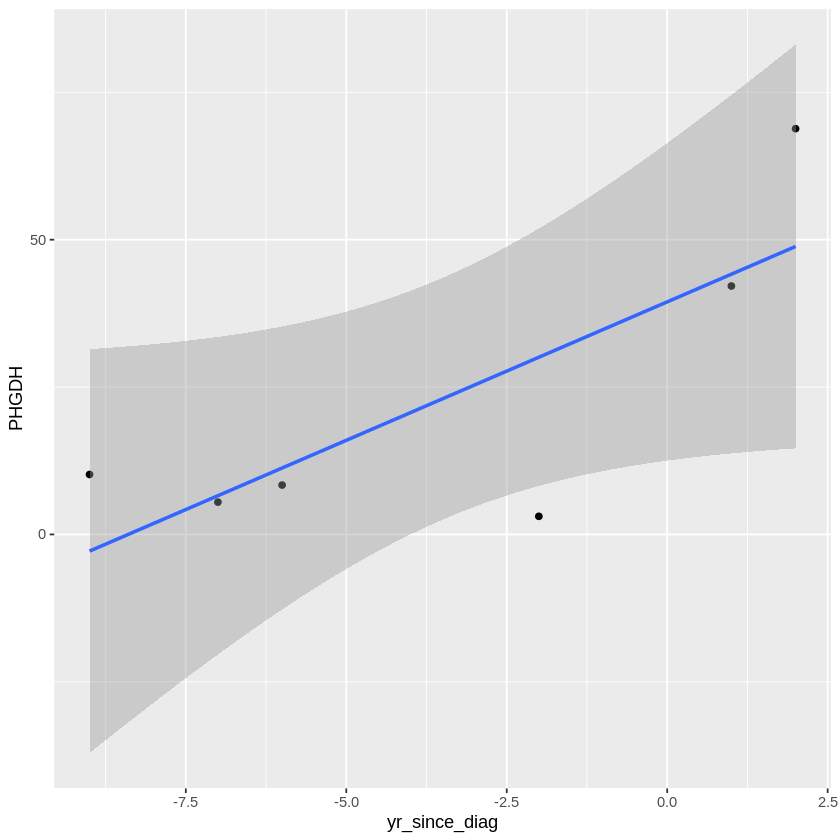

In [464]:
ggplot(y, aes(x=yr_since_diag, y=PHGDH)) + geom_point() + geom_smooth(method='lm')

In [432]:
head(phgdh_betas_df_meta)

donorID group   sex Year_diagnosis n_samples beta      
1 N_1     control M   NA             2         -2.0510285
2 N_1     control M   NA             3         -1.1302675
3 N_1     control M   NA             4         -0.6630481
4 N_1     control M   NA             5         -0.6837510
5 N_2     control F   NA             2         -7.9161085
6 N_2     control F   NA             3         -1.7969138

In [446]:
# phgdh_betas_df_meta_stats <- phgdh_betas_df_meta %>%
# group_by(donorID) %>%
# mutate(beta_mean = mean(beta), beta_sd = sd(beta))

# head(phgdh_betas_df_meta_stats)

donorID group   sex Year_diagnosis n_samples beta       beta_mean beta_sd  
1 N_1     control M   NA             2         -2.0510285 -1.132024 0.6494765
2 N_1     control M   NA             3         -1.1302675 -1.132024 0.6494765
3 N_1     control M   NA             4         -0.6630481 -1.132024 0.6494765
4 N_1     control M   NA             5         -0.6837510 -1.132024 0.6494765
5 N_2     control F   NA             2         -7.9161085 -3.158119 3.2975395
6 N_2     control F   NA             3         -1.7969138 -3.158119 3.2975395

In [452]:
# phgdh_betas_df_meta_stats <- phgdh_betas_df_meta_stats %>%
# mutate(beta_diff = beta_mean - beta_sd)

# head(phgdh_betas_df_meta_stats)

donorID group   sex Year_diagnosis n_samples beta       beta_mean beta_sd  
1 N_1     control M   NA             2         -2.0510285 -1.132024 0.6494765
2 N_1     control M   NA             3         -1.1302675 -1.132024 0.6494765
3 N_1     control M   NA             4         -0.6630481 -1.132024 0.6494765
4 N_1     control M   NA             5         -0.6837510 -1.132024 0.6494765
5 N_2     control F   NA             2         -7.9161085 -3.158119 3.2975395
6 N_2     control F   NA             3         -1.7969138 -3.158119 3.2975395
  beta_diff
1 -1.781500
2 -1.781500
3 -1.781500
4 -1.781500
5 -6.455659
6 -6.455659

In [455]:
phgdh_betas_df_meta_final <- phgdh_betas_df_meta_stats %>% 
filter(donorID=='C_1')

donorID group     sex Year_diagnosis n_samples beta       beta_mean beta_sd 
1 C_1     converter F   2010           2         -2.3463710 0.6529659 2.921518
2 C_1     converter F   2010           3         -0.8484991 0.6529659 2.921518
3 C_1     converter F   2010           4         -0.9117844 0.6529659 2.921518
4 C_1     converter F   2010           5          2.6741240 0.6529659 2.921518
5 C_1     converter F   2010           6          4.6973597 0.6529659 2.921518
  beta_diff
1 -2.268552
2 -2.268552
3 -2.268552
4 -2.268552
5 -2.268552

In [485]:
phgdh_betas_df_meta %>% filter(group != 'AD') %>% 
group_by(donorID) %>% filter(n_samples==max(n_samples))

donorID group     sex n_samples beta       beta_sd  
1  N_1     control   M   5         -0.6837510 0.4428254
2  N_2     control   F   5         -0.3732449 1.2430945
3  N_3     control   M   4          0.7916131 1.9600310
4  N_4     control   M   5          0.5813682 0.9090031
5  N_5     control   M   5          1.4325278 0.4948873
6  N_6     control   F   5          0.9826376 2.0440805
7  N_7     control   F   4          0.1406101 0.3818850
8  N_8     control   F   3         -0.5652415 0.6648839
9  N_9     control   F   5         -0.2096312 0.6374647
10 C_1     converter F   6          4.6973597 1.7964299
11 C_2     converter M   5          5.9250280 1.5235574
12 C_3     converter F   3          1.2775352 0.1170611
13 C_4     converter F   3          2.9169616 2.0510928
14 C_5     converter F   4          1.4267222 1.1844540
15 C_6     converter M   4          2.9695247 0.3302688
16 C_7     converter F   4          1.6269015 0.3507958
17 C_8     converter M   5          5.7784112 3.2067956
18 C_9     converter F   4          0.6825575 0.6715559
19 C_10    converter F   7          0.5122905 0.2511794
20 C_11    converter F   4          1.2402882 0.7994366

In [499]:
donors_list

[1] "N_1"   "N_2"   "N_3"   "N_4"   "N_5"   "N_6"   "N_7"   "N_8"   "N_9"  
[10] "AD_1"  "AD_2"  "AD_3"  "AD_4"  "AD_5"  "AD_6"  "AD_7"  "AD_8"  "AD_9" 
[19] "AD_10" "AD_11" "AD_12" "AD_13" "AD_14" "AD_15" "C_1"   "C_2"   "C_3"  
[28] "C_4"   "C_5"   "C_6"   "C_7"   "C_8"   "C_9"   "C_10"  "C_11"

In [500]:
phgdh_betas_df_meta$group <- factor(phgdh_betas_df_meta$group, levels = c("control", "AD", "converter"))
phgdh_betas_df_meta$donorID <- factor(phgdh_betas_df_meta$donorID, levels = donors_list)

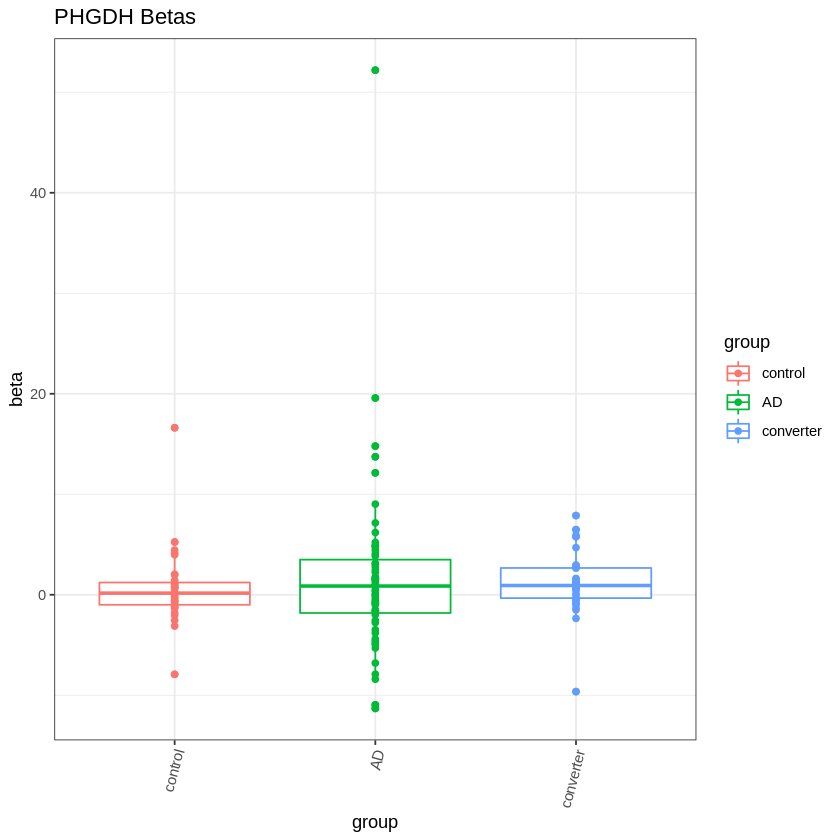

In [565]:
# All values
phgdh_betas_df_meta %>%
ggplot(aes(x=group, y=beta, color=group)) + 
geom_boxplot() +
geom_point() +
# geom_point(aes(x=paste(donorID, n_samples, sep="_"), y=beta)) +
# geom_linerange(aes(x=paste(donorID, n_samples, sep="_"), ymin=beta-sd, ymax=beta+sd), alpha=0.7) +
# geom_hline(aes(yintercept = 0)) +
theme_bw() + 
labs(title='PHGDH Betas') +
theme(axis.text.x = element_text(angle = 75, hjust = 1))

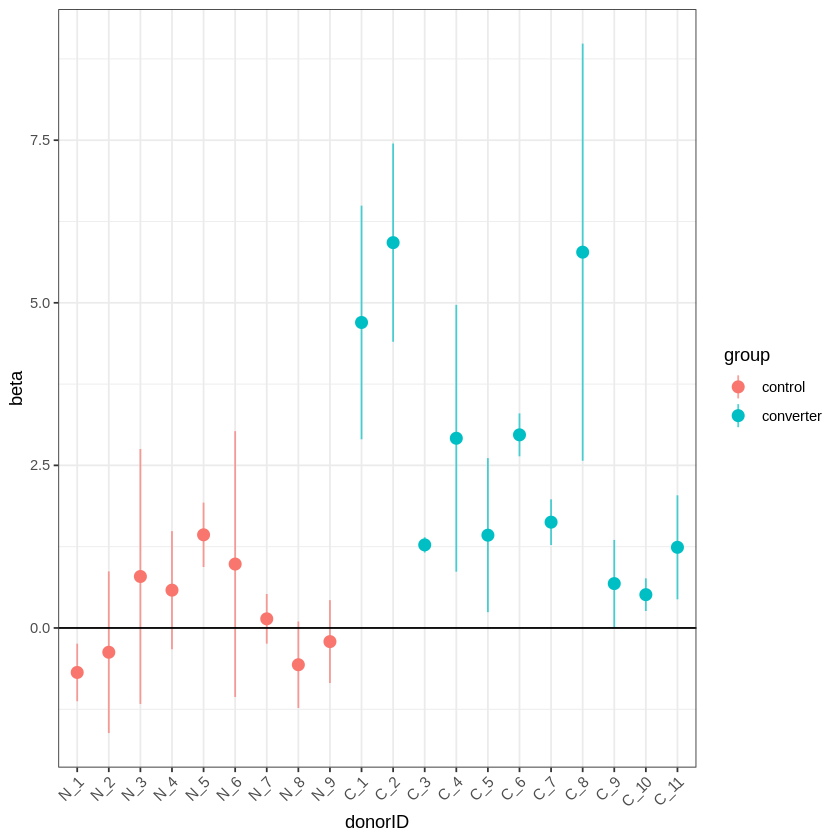

In [501]:
paper_4c <- phgdh_betas_df_meta %>% filter(group != 'AD') %>% 
group_by(donorID) %>% filter(n_samples==max(n_samples))


ggplot(paper_4c, aes(color=group)) + 
geom_point(aes(x=donorID, y=beta), size=3) +
geom_linerange(aes(x=donorID, ymin=beta-beta_sd, ymax=beta+beta_sd), alpha=0.7) +
geom_hline(aes(yintercept = 0)) +
theme_bw() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [504]:
head(phgdh_betas_df_meta)

donorID group   sex n_samples beta       beta_sd  
1 N_1     control M   2         -2.0510285       NaN
2 N_1     control M   3         -1.1302675 0.7974024
3 N_1     control M   4         -0.6630481 0.6391231
4 N_1     control M   5         -0.6837510 0.4428254
5 N_2     control F   2         -7.9161085       NaN
6 N_2     control F   3         -1.7969138 2.1197512

Warning message:
"Removed 11 rows containing missing values (geom_segment)."


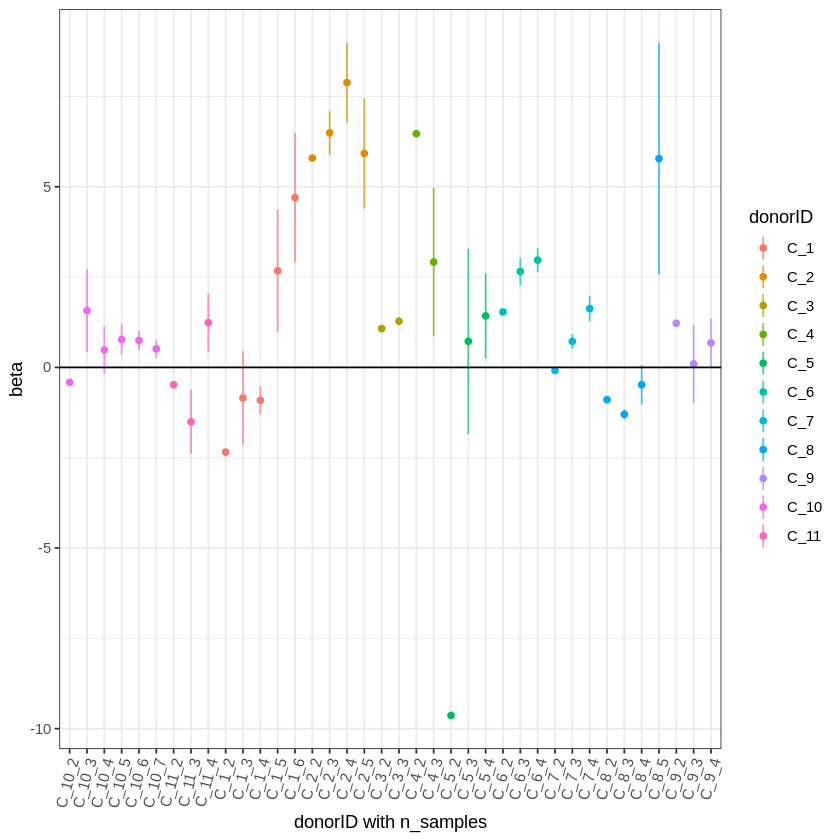

In [515]:
phgdh_betas_df_meta %>% filter(group=='converter') %>%
ggplot(aes(color=donorID)) + 
geom_point(aes(x=paste(donorID, n_samples, sep="_"), y=beta)) +
geom_linerange(aes(x=paste(donorID, n_samples, sep="_"), ymin=beta-beta_sd, ymax=beta+beta_sd), alpha=0.7) +
geom_hline(aes(yintercept = 0)) +
theme_bw() + 
labs(x='donorID with n_samples') +
theme(axis.text.x = element_text(angle = 75, hjust = 1))

Warning message:
"Removed 9 rows containing missing values (geom_segment)."


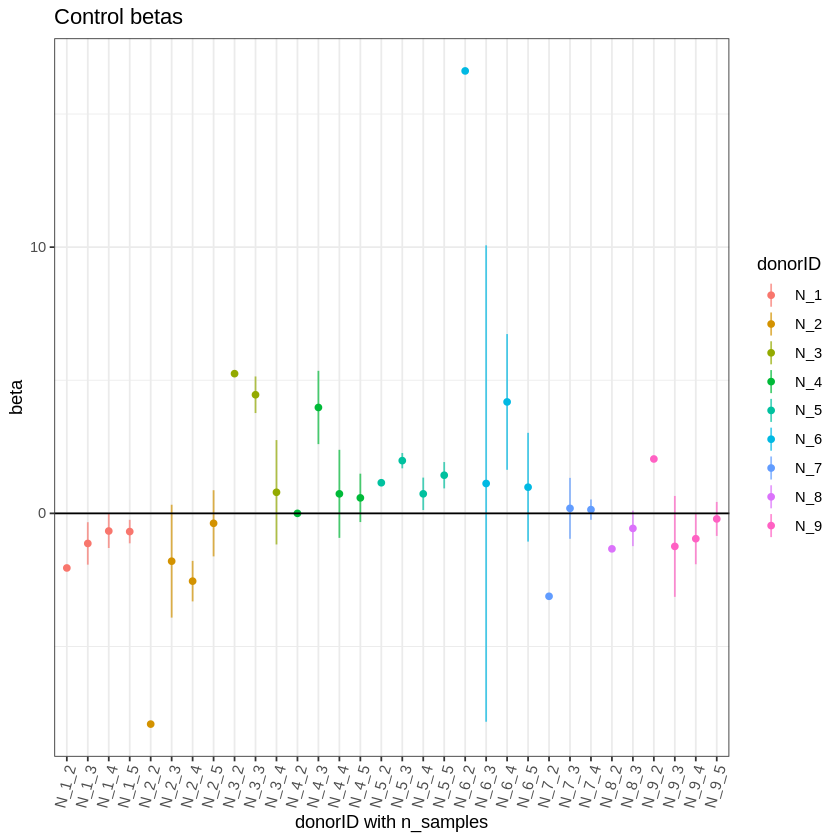

In [516]:
phgdh_betas_df_meta %>% filter(group=='control') %>%
ggplot(aes(color=donorID)) + 
geom_point(aes(x=paste(donorID, n_samples, sep="_"), y=beta)) +
geom_linerange(aes(x=paste(donorID, n_samples, sep="_"), ymin=beta-beta_sd, ymax=beta+beta_sd), alpha=0.7) +
geom_hline(aes(yintercept = 0)) +
theme_bw() + 
labs(title='Control betas', x='donorID with n_samples') +
theme(axis.text.x = element_text(angle = 75, hjust = 1))

In [521]:
meta_withFirstYear %>% filter(group=='converter', yr_since_diag > 0) %>% 
arrange(donorID)

donorID group     age_death sex braak_stage Year_diagnosis
1  C_1     converter 91        F   3           2010          
2  C_1     converter 91        F   3           2010          
3  C_10    converter 96        F   5           2007          
4  C_10    converter 96        F   5           2007          
5  C_10    converter 96        F   5           2007          
6  C_10    converter 96        F   5           2007          
7  C_11    converter 90        F   3           2008          
8  C_5     converter 93        F   5           2005          
9  C_6     converter 92        M   6           2012          
10 C_9     converter 85        F   6           2006          
11 C_9     converter 85        F   6           2006          
   APOE_status         sampleID  year yr_since_diag firstYear
1  \316\2653/\316\2654 C_1_12_1  2012 2             NA       
2  \316\2653/\316\2654 C_1_11_1  2011 1             NA       
3  \316\2653/\316\2653 C_10_14_1 2014 7             NA       
4  \316\2653/\316\2653 C_10_08_1 2008 1             NA       
5  \316\2653/\316\2653 C_10_10_1 2010 3             NA       
6  \316\2653/\316\2653 C_10_13_1 2013 6             NA       
7  \316\2653/\316\2653 C_11_09_1 2009 1             NA       
8  \316\2653/\316\2653 C_5_07_1  2007 2             NA       
9  \316\2652/\316\2654 C_6_13_1  2013 1             NA       
10 \316\2653/\316\2654 C_9_10_1  2010 4             NA       
11 \316\2653/\316\2654 C_9_07_1  2007 1             NA

In [525]:
phgdh_betas_df_meta %>% filter(group=='converter') %>% head()

donorID group     sex n_samples beta       beta_sd 
1 C_1     converter F   2         -2.3463710      NaN
2 C_1     converter F   3         -0.8484991 1.297195
3 C_1     converter F   4         -0.9117844 0.389167
4 C_1     converter F   5          2.6741240 1.697993
5 C_1     converter F   6          4.6973597 1.796430
6 C_2     converter M   2          5.7930372      NaN

In [530]:
converters_list <- donors_list[25:35]

converters_list

[1] "C_1"  "C_2"  "C_3"  "C_4"  "C_5"  "C_6"  "C_7"  "C_8"  "C_9"  "C_10"
[11] "C_11"

In [550]:
phgdh_betas_df_convertersPreDiag <- data.frame('donorID' = character(),
                            'n_samples' = numeric(),
                            'beta' = numeric(),
                            'beta_sd' = numeric())



count = 1

for (i in converters_list){
    donor_phgdh <- tpm_meta_fixedYears %>% 
    filter(donorID==i) %>%
    filter(yr_since_diag < 0) %>%
    arrange(yr_since_diag)
    
    n_samples <- dim(donor_phgdh)[1]
    
    for (j in 2:n_samples){
        
        # Subset to j values
        donor_phgdh_j <- donor_phgdh %>% dplyr::slice(1:j)
        reg <- lm(donor_phgdh_j$PHGDH~donor_phgdh_j$yr_since_diag)
        beta <- coef(reg)[2]
        sd <- coef(summary(reg))[, "Std. Error"][2]
        
        phgdh_betas_df_convertersPreDiag[count, 1] = i
        phgdh_betas_df_convertersPreDiag[count, 2] = j
        phgdh_betas_df_convertersPreDiag[count, 3] = beta
        phgdh_betas_df_convertersPreDiag[count, 4] = sd
        
        count = count + 1
    }
    
}

head(phgdh_betas_df_convertersPreDiag)

donorID n_samples beta       beta_sd  
1 C_1     2         -2.3463710       NaN
2 C_1     3         -0.8484991 1.2971952
3 C_1     4         -0.9117844 0.3891670
4 C_2     2          5.7930372       NaN
5 C_2     3          6.4921719 0.6054685
6 C_2     4          7.8825384 1.0965388

In [526]:
head(tpm_meta_fixedYears)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   LAMP2     NACC2     AHNAK      DOCK1    
1 N_1_01_1 2001 0             <U+22EF>  0.000000  4.905267  0.3029093  4.200142
2 N_1_05_1 2005 4             <U+22EF>  1.659321  0.000000  1.6151025  3.378558
3 N_1_07_1 2007 6             <U+22EF>  1.070086  4.919548  6.3796158  7.988978
4 N_1_08_1 2008 7             <U+22EF>  4.981081  4.293696  7.6007871 14.790453
5 N_1_09_1 2009 8             <U+22EF>  1.710634  6.990546  5.5039102  6.192068
6 N_2_00_1 2000 0             <U+22EF> 10.652810 14.208671 20.6098453 17.941346
  GPRC5B    GFAP       SLC25A18   up_sum    down_sum   amp_diff 
1 3.1837512  0.9688022  0.4974588  43.82148  13.620438  30.20104
2 0.1964775  0.2152342  0.5525903  29.94099   9.416191  20.52480
3 2.6608503  4.5342396  9.9781417 113.87496  36.455059  77.41990
4 9.8054531  5.6534372 12.3373954 167.47166  72.029741  95.44192
5 5.6714958 12.4258504 21.9326350 112.11617  74.023792  38.09237
6 6.5404986 29.7342824 15.1759295 283.35286 126.905701 156.44716

Warning message:
"Removed 11 rows containing missing values (geom_segment)."


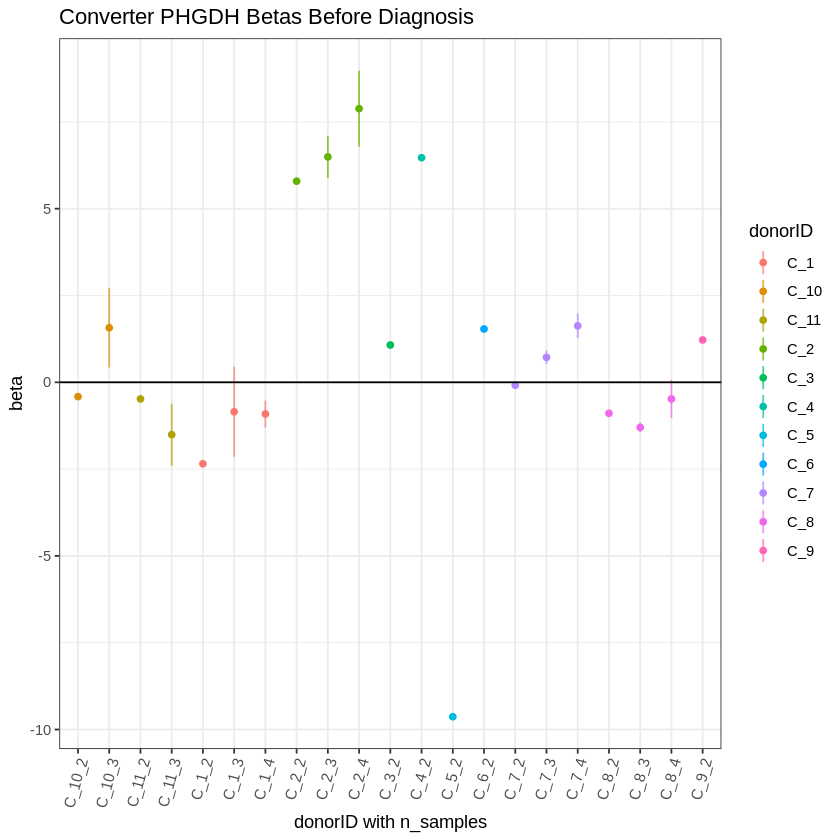

In [533]:
# remove points from after the diagnosis

phgdh_betas_df_convertersPreDiag %>%
ggplot(aes(color=donorID)) + 
geom_point(aes(x=paste(donorID, n_samples, sep="_"), y=beta)) +
geom_linerange(aes(x=paste(donorID, n_samples, sep="_"), ymin=beta-beta_sd, ymax=beta+beta_sd), alpha=0.7) +
geom_hline(aes(yintercept = 0)) +
theme_bw() + 
labs(title='Converter PHGDH Betas Before Diagnosis', x='donorID with n_samples') +
theme(axis.text.x = element_text(angle = 75, hjust = 1))

In [ ]:
# line + dot
ggplot(data) +
  geom_bar( aes(x=name, y=value), stat="identity", fill="skyblue", alpha=0.5) +
  geom_pointrange( aes(x=name, y=value, ymin=value-sd, ymax=value+sd), colour="orange", alpha=0.9, size=1.3)

In [418]:
coef(x)[2]

donor_phgdh$yr_since_diag 
                -0.683751

In [392]:
phgdh_betas_df

donorID n_samples beta
1 N_2     1         1

In [402]:
head(tpm_meta_fixedYears)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   LAMP2     NACC2     AHNAK      DOCK1    
1 N_1_01_1 2001 0             <U+22EF>  0.000000  4.905267  0.3029093  4.200142
2 N_1_05_1 2005 4             <U+22EF>  1.659321  0.000000  1.6151025  3.378558
3 N_1_07_1 2007 6             <U+22EF>  1.070086  4.919548  6.3796158  7.988978
4 N_1_08_1 2008 7             <U+22EF>  4.981081  4.293696  7.6007871 14.790453
5 N_1_09_1 2009 8             <U+22EF>  1.710634  6.990546  5.5039102  6.192068
6 N_2_00_1 2000 0             <U+22EF> 10.652810 14.208671 20.6098453 17.941346
  GPRC5B    GFAP       SLC25A18   up_sum    down_sum   amp_diff 
1 3.1837512  0.9688022  0.4974588  43.82148  13.620438  30.20104
2 0.1964775  0.2152342  0.5525903  29.94099   9.416191  20.52480
3 2.6608503  4.5342396  9.9781417 113.87496  36.455059  77.41990
4 9.8054531  5.6534372 12.3373954 167.47166  72.029741  95.44192
5 5.6714958 12.4258504 21.9326350 112.11617  74.023792  38.09237
6 6.5404986 29.7342824 15.1759295 283.35286 126.905701 156.44716

In [535]:
names(tpm_t_ampgenes_ordered_scaled)

[1] "sampleID" "PHGDH"    "MRAS"     "DOCK1"    "KCNJ10"   "ITPKB"   
 [7] "PDE4DIP"  "MYO10"    "AHNAK"    "PLXNB1"   "FAM107A"  "ERBB2IP" 
[13] "LAMP2"    "TNS3"     "CALD1"    "SASH1"    "QKI"      "CSRP1"   
[19] "RHOQ"     "NACC2"    "PADI2"    "GPRC5B"   "QDPR"     "GNA12"   
[25] "CRTAP"    "GFAP"     "SLC25A18" "MID1IP1"  "PBXIP1"

In [541]:
tpm_scaled_upreg <- tpm_t_ampgenes_ordered_scaled %>% 
select(one_of('sampleID', up.ampgenes)) %>%
mutate(scaled_total = select(tpm_t_ampgenes_ordered_scaled, one_of(up.ampgenes)) %>% rowSums())

names(tpm_scaled_upreg)

[1] "sampleID"     "PADI2"        "NACC2"        "RHOQ"         "QKI"         
 [6] "CSRP1"        "CALD1"        "SASH1"        "TNS3"         "LAMP2"       
[11] "ERBB2IP"      "FAM107A"      "PLXNB1"       "AHNAK"        "MYO10"       
[16] "PDE4DIP"      "ITPKB"        "KCNJ10"       "DOCK1"        "MRAS"        
[21] "PHGDH"        "scaled_total"

In [542]:
head(tpm_scaled_upreg)

sampleID  PADI2     NACC2      RHOQ       QKI       CSRP1      CALD1    
1 C_1_01_1  0.1275860 0.36547483 0.05116118 1.2627655 0.46863132 1.3850931
2 AD_8_12_1 0.1250443 0.15562916 0.21059634 0.5047888 0.29854211 2.8190755
3 C_10_01_1 0.1405972 0.08749310 0.00000000 0.5982537 0.07746336 2.7245260
4 C_10_14_1 0.1823465 0.24315762 0.27419939 1.0444820 0.53820835 1.7816243
5 C_10_05_1 0.2673502 0.09242835 0.65663546 2.0783063 1.59574072 0.6772257
6 C_10_08_1 0.4892072 0.19514856 0.23766636 1.1701417 1.60683336 3.3601715
  SASH1     TNS3      LAMP2    <U+22EF>   PLXNB1    AHNAK    MYO10     PDE4DIP 
1 0.3596842 2.3182795 0.000000 <U+22EF> 0.4879269 6.471784 5.2286213 0.842334
2 1.8424986 1.1538685 2.378668 <U+22EF> 2.6779578 4.827619 3.5605509 1.444719
3 0.1664733 0.2103869 6.858864 <U+22EF> 2.0529820 1.010335 3.4058858 1.608168
4 1.9534381 1.7053737 2.397724 <U+22EF> 0.9509287 3.413509 3.7363868 1.534932
5 1.5827720 2.2503242 2.255753 <U+22EF> 0.6506355 2.542746 6.6752414 2.007767
6 0.7426189 1.4781577 2.078262 <U+22EF> 1.0989753 4.215365 0.4797879 3.586930
  ITPKB     KCNJ10    DOCK1    MRAS      PHGDH     scaled_total
1 5.1064159 5.1686818 0.000000 0.2684569  7.921737 42.73839    
2 3.5626602 0.8246513 4.248930 4.0518773 22.173772 61.87289    
3 1.4020234 0.2781662 3.960220 4.9700148  4.399717 39.34488    
4 6.3085418 2.3192083 2.969900 3.1653607  7.472381 45.07378    
5 1.9042814 3.5262819 2.091803 3.9377698  9.295786 48.06522    
6 0.5360805 4.0948679 7.823562 8.7297096  5.887996 54.41888

In [543]:
tpm_scaled_upreg_meta_fixedYears <- full_join(meta_withFirstYear, tpm_scaled_upreg, by='sampleID')

In [547]:
names(tpm_scaled_upreg_meta_fixedYears)[10]

[1] "yr_since_diag"

# Create df storing all betas for every scaled TPM for the upregulated genes

In [551]:
upreg_scaled_betas_df <- data.frame('donorID' = character(),
                            'n_samples' = numeric(),
                             'years_spanned' = numeric(),
                            'beta' = numeric(),
                                   'sd' = numeric())


count = 1

for (i in donors_list){
    donor_upreg <- tpm_scaled_upreg_meta_fixedYears %>% 
    filter(donorID==i) %>%
    arrange(yr_since_diag)
    
    n_samples <- dim(donor_upreg)[1]
    
    for (j in 2:n_samples){
        
        # Subset to j values
        donor_j <- donor_upreg %>% dplyr::slice(1:j)
        years <- donor_j[j, 10] - donor_j[1, 10]
        reg <- lm(donor_j$scaled_total~donor_j$yr_since_diag)
        beta <- coef(reg)[2]
        sd <- coef(summary(reg))[, "Std. Error"][2]
        
        upreg_scaled_betas_df[count, 1] = i
        upreg_scaled_betas_df[count, 2] = j
        upreg_scaled_betas_df[count, 3] = years
        upreg_scaled_betas_df[count, 4] = beta
        upreg_scaled_betas_df[count, 5] = sd
        
        count = count + 1
    }
    
}

head(upreg_scaled_betas_df)

donorID n_samples years_spanned beta       sd      
1 N_1     2         4              -1.546373      NaN
2 N_1     3         6               1.303144 2.467754
3 N_1     4         7               2.449825 1.787193
4 N_1     5         8               1.981781 1.310380
5 N_2     2         1             -15.648710      NaN
6 N_2     3         3              -2.220053 4.651823

In [552]:
# Add metadata
upreg_scaled_betas_df_meta <- metadata %>% select(-age_death, -braak_stage, -APOE_status, -Year_diagnosis) %>%
right_join(upreg_scaled_betas_df, by='donorID')

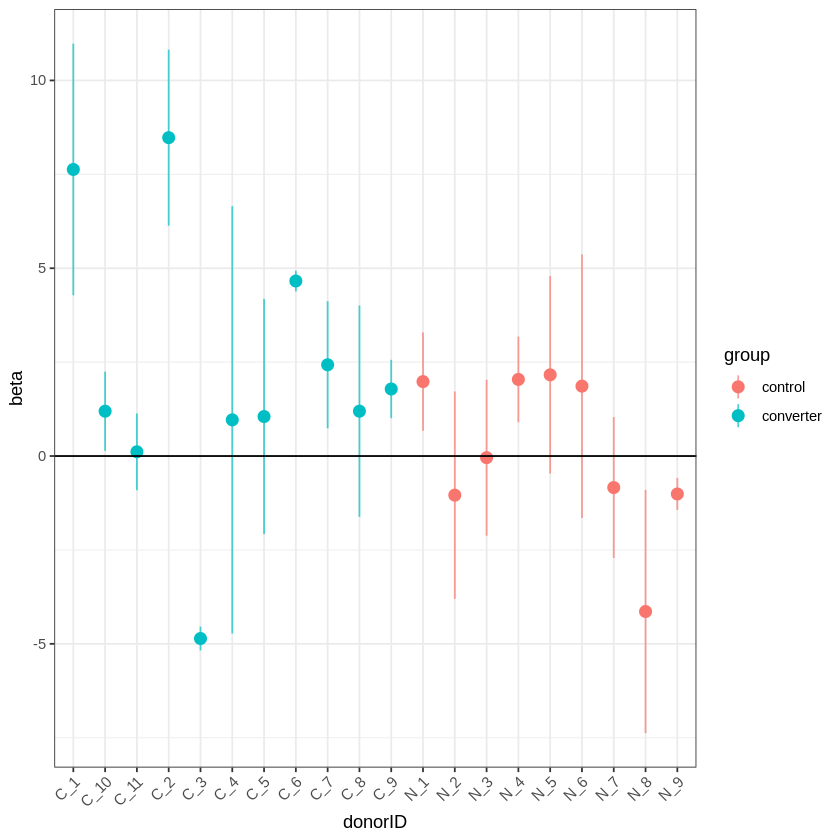

In [554]:
paper_4c_upreg_scaled <- upreg_scaled_betas_df_meta %>% filter(group != 'AD') %>% 
group_by(donorID) %>% filter(n_samples==max(n_samples))


ggplot(paper_4c_upreg_scaled, aes(color=group)) + 
geom_point(aes(x=donorID, y=beta), size=3) +
geom_linerange(aes(x=donorID, ymin=beta-sd, ymax=beta+sd), alpha=0.7) +
geom_hline(aes(yintercept = 0)) +
theme_bw() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [555]:
upreg_scaled_betas_df_convertersPreDiag <- data.frame('donorID' = character(),
                            'n_samples' = numeric(),
                             'years_spanned' = numeric(),
                            'beta' = numeric(),
                                   'sd' = numeric())


count = 1

for (i in converters_list){
    donor_upreg <- tpm_scaled_upreg_meta_fixedYears %>% 
    filter(donorID==i) %>%
    filter(yr_since_diag < 0) %>%
    arrange(yr_since_diag)
    
    n_samples <- dim(donor_upreg)[1]
    
    for (j in 2:n_samples){
        
        # Subset to j values
        donor_j <- donor_upreg %>% dplyr::slice(1:j)
        years <- donor_j[j, 10] - donor_j[1, 10]
        reg <- lm(donor_j$scaled_total~donor_j$yr_since_diag)
        beta <- coef(reg)[2]
        sd <- coef(summary(reg))[, "Std. Error"][2]
        
        upreg_scaled_betas_df_convertersPreDiag[count, 1] = i
        upreg_scaled_betas_df_convertersPreDiag[count, 2] = j
        upreg_scaled_betas_df_convertersPreDiag[count, 3] = years
        upreg_scaled_betas_df_convertersPreDiag[count, 4] = beta
        upreg_scaled_betas_df_convertersPreDiag[count, 5] = sd
        
        count = count + 1
    }
    
}

head(upreg_scaled_betas_df_convertersPreDiag)

donorID n_samples years_spanned beta        sd       
1 C_1     2         2             -14.3890776       NaN
2 C_1     3         3              -0.3547677 12.154069
3 C_1     4         7              -2.7574976  3.726725
4 C_2     2         2               5.5219383       NaN
5 C_2     3         3              11.0387168  4.777670
6 C_2     4         4              11.0094237  2.467278

Warning message:
"Removed 11 rows containing missing values (geom_segment)."


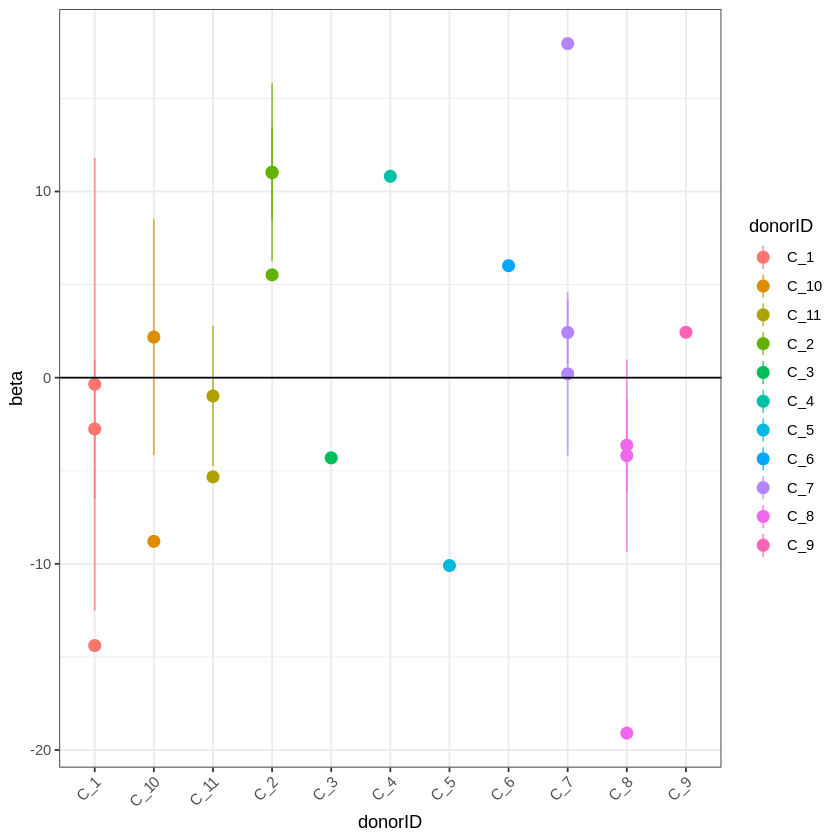

In [556]:
ggplot(upreg_scaled_betas_df_convertersPreDiag, aes(color=donorID)) + 
geom_point(aes(x=donorID, y=beta), size=3) +
geom_linerange(aes(x=donorID, ymin=beta-sd, ymax=beta+sd), alpha=0.7) +
geom_hline(aes(yintercept = 0)) +
theme_bw() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message:
"Removed 11 rows containing missing values (geom_segment)."


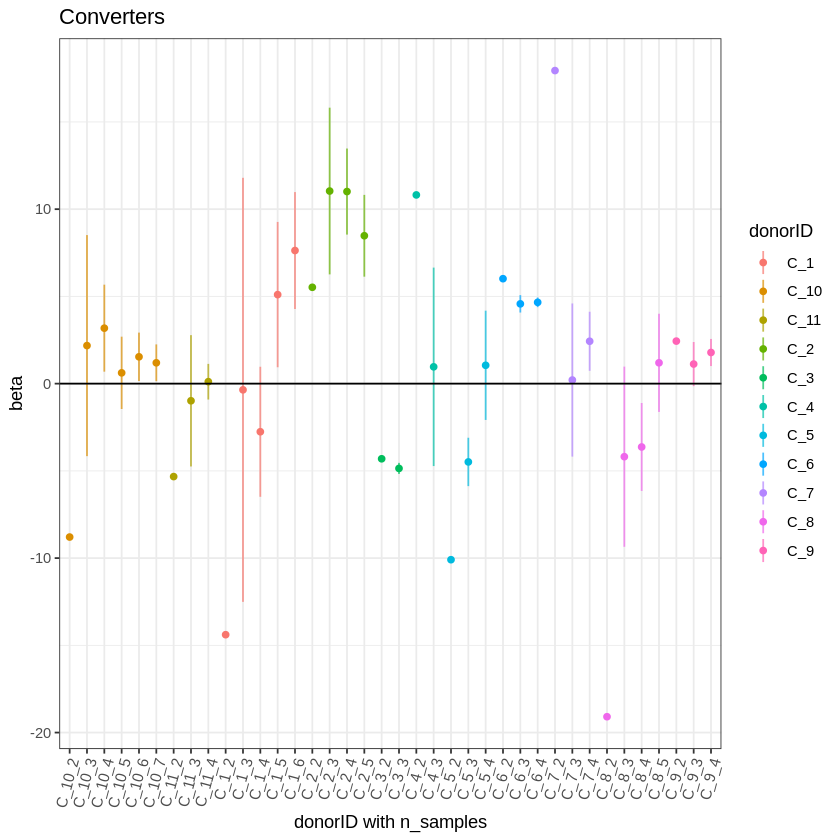

In [560]:
upreg_scaled_betas_df_meta %>% filter(group=='converter') %>%
ggplot(aes(color=donorID)) + 
geom_point(aes(x=paste(donorID, n_samples, sep="_"), y=beta)) +
geom_linerange(aes(x=paste(donorID, n_samples, sep="_"), ymin=beta-sd, ymax=beta+sd), alpha=0.7) +
geom_hline(aes(yintercept = 0)) +
theme_bw() + 
labs(title='Converters', x='donorID with n_samples') +
theme(axis.text.x = element_text(angle = 75, hjust = 1))

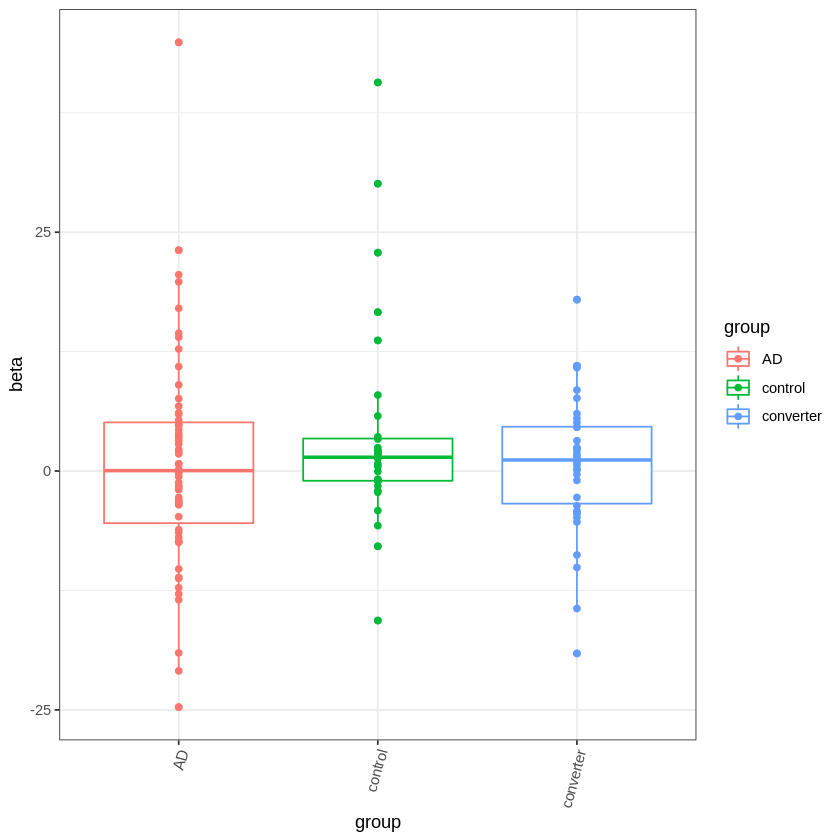

In [563]:
# All values
upreg_scaled_betas_df_meta %>%
ggplot(aes(x=group, y=beta, color=group)) + 
geom_boxplot() +
geom_point() +
# geom_point(aes(x=paste(donorID, n_samples, sep="_"), y=beta)) +
# geom_linerange(aes(x=paste(donorID, n_samples, sep="_"), ymin=beta-sd, ymax=beta+sd), alpha=0.7) +
# geom_hline(aes(yintercept = 0)) +
theme_bw() + 
# labs(title='Converters', x='donorID with n_samples') +
theme(axis.text.x = element_text(angle = 75, hjust = 1))

In [285]:
tpm_t_ampgenes_ordered_scaled <- tpm_t_ampgenes_ordered_scaled %>%
rownames_to_column(., var='sampleID')

head(tpm_t_ampgenes_ordered_scaled)

sampleID  PHGDH     MRAS      DOCK1    KCNJ10    ITPKB     PDE4DIP  MYO10    
1 C_1_01_1   7.921737 0.2684569 0.000000 5.1686818 5.1064159 0.842334 5.2286213
2 AD_8_12_1 22.173772 4.0518773 4.248930 0.8246513 3.5626602 1.444719 3.5605509
3 C_10_01_1  4.399717 4.9700148 3.960220 0.2781662 1.4020234 1.608168 3.4058858
4 C_10_14_1  7.472381 3.1653607 2.969900 2.3192083 6.3085418 1.534932 3.7363868
5 C_10_05_1  9.295786 3.9377698 2.091803 3.5262819 1.9042814 2.007767 6.6752414
6 C_10_08_1  5.887996 8.7297096 7.823562 4.0948679 0.5360805 3.586930 0.4797879
  AHNAK    PLXNB1    <U+22EF>   NACC2      PADI2     GPRC5B      QDPR       
1 6.471784 0.4879269 <U+22EF> 0.36547483 0.1275860 -0.25765964 -1.15432132
2 4.827619 2.6779578 <U+22EF> 0.15562916 0.1250443 -0.14403376 -0.07542171
3 1.010335 2.0529820 <U+22EF> 0.08749310 0.1405972 -0.02208390 -1.90805875
4 3.413509 0.9509287 <U+22EF> 0.24315762 0.1823465 -0.04091650 -1.29624173
5 2.542746 0.6506355 <U+22EF> 0.09242835 0.2673502 -0.22746348  0.00000000
6 4.215365 1.0989753 <U+22EF> 0.19514856 0.4892072 -0.02955415 -0.85116409
  GNA12      CRTAP      GFAP      SLC25A18  MID1IP1    PBXIP1   
1 -3.8308866 -0.5912250 -3.125737 -0.394923  -1.191880 -7.930142
2 -0.6143842 -2.4336773 -1.025596 -1.083756  -6.307933 -1.295360
3 -1.4967352 -0.3157357 -1.100743 -2.056307   0.000000 -1.310829
4 -1.4932155 -1.8524603 -1.602408 -2.539917  -2.555161 -3.238229
5 -2.0068594 -0.8338638 -2.491784 -1.810248 -13.112012 -4.846692
6 -4.1601424 -0.7042312 -2.525293 -1.223062  -5.800466 -5.262717

In [297]:
# Add columns for sums of up and down regulated amp genes
tpm_t_ampgenes_ordered_scaled_sums <- tpm_t_ampgenes_ordered_scaled %>%
mutate(up_sum = select(tpm_t_ampgenes_ordered_scaled, one_of(up.ampgenes)) %>% rowSums()) %>%
mutate(down_sum = select(tpm_t_ampgenes_ordered_scaled, one_of(down.ampgenes)) %>% rowSums()) %>%
mutate(amp_diff = up_sum - down_sum)

In [298]:
head(tpm_t_ampgenes_ordered_scaled_sums)

sampleID  PHGDH     MRAS      DOCK1    KCNJ10    ITPKB     PDE4DIP  MYO10    
1 C_1_01_1   7.921737 0.2684569 0.000000 5.1686818 5.1064159 0.842334 5.2286213
2 AD_8_12_1 22.173772 4.0518773 4.248930 0.8246513 3.5626602 1.444719 3.5605509
3 C_10_01_1  4.399717 4.9700148 3.960220 0.2781662 1.4020234 1.608168 3.4058858
4 C_10_14_1  7.472381 3.1653607 2.969900 2.3192083 6.3085418 1.534932 3.7363868
5 C_10_05_1  9.295786 3.9377698 2.091803 3.5262819 1.9042814 2.007767 6.6752414
6 C_10_08_1  5.887996 8.7297096 7.823562 4.0948679 0.5360805 3.586930 0.4797879
  AHNAK    PLXNB1    <U+22EF>   QDPR        GNA12      CRTAP      GFAP     
1 6.471784 0.4879269 <U+22EF> -1.15432132 -3.8308866 -0.5912250 -3.125737
2 4.827619 2.6779578 <U+22EF> -0.07542171 -0.6143842 -2.4336773 -1.025596
3 1.010335 2.0529820 <U+22EF> -1.90805875 -1.4967352 -0.3157357 -1.100743
4 3.413509 0.9509287 <U+22EF> -1.29624173 -1.4932155 -1.8524603 -1.602408
5 2.542746 0.6506355 <U+22EF>  0.00000000 -2.0068594 -0.8338638 -2.491784
6 4.215365 1.0989753 <U+22EF> -0.85116409 -4.1601424 -0.7042312 -2.525293
  SLC25A18  MID1IP1    PBXIP1    up_sum   down_sum   amp_diff
1 -0.394923  -1.191880 -7.930142 42.73839 -18.476774 61.21516
2 -1.083756  -6.307933 -1.295360 61.87289 -12.980162 74.85305
3 -2.056307   0.000000 -1.310829 39.34488  -8.210492 47.55537
4 -2.539917  -2.555161 -3.238229 45.07378 -14.618550 59.69233
5 -1.810248 -13.112012 -4.846692 48.06522 -25.328922 73.39414
6 -1.223062  -5.800466 -5.262717 54.41888 -20.556630 74.97551

In [299]:
head(ampgenes_ordered_scaled_sums_meta)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   QDPR        GNA12       CRTAP     
1 N_1_01_1 2001 NA            <U+22EF> -0.02833764 -0.02564866 -0.7502665
2 N_1_05_1 2005 NA            <U+22EF> -0.31478192 -0.05698242  0.0000000
3 N_1_07_1 2007 NA            <U+22EF> -0.33156826 -0.12861669 -1.0189438
4 N_1_08_1 2008 NA            <U+22EF> -0.90950216 -2.09541587 -1.2997704
5 N_1_09_1 2009 NA            <U+22EF> -0.37860240 -1.57631258 -1.0650360
6 N_2_00_1 2000 NA            <U+22EF> -0.89069040 -1.70718858 -2.8610390
  GFAP       SLC25A18   MID1IP1    PBXIP1     up_sum    down_sum   amp_diff 
1 -0.1751543 -0.1017979  0.0000000 -0.8760529  43.82148  13.620438  30.20104
2 -0.0389132 -0.1130797  0.0000000 -1.1893966  29.94099   9.416191  20.52480
3 -0.8197665 -2.0418846 -0.1467242 -1.7897478 113.87496  36.455059  77.41990
4 -1.0221115 -2.5246723 -1.7928172  0.0000000 167.47166  72.029741  95.44192
5 -2.2465279 -4.4882014  0.0000000 -2.8610818 112.11617  74.023792  38.09237
6 -5.3758007 -3.1055379 -2.5967178 -6.2989785 283.35286 126.905701 156.44716

In [300]:
# Add metadata to scaled
ampgenes_ordered_scaled_sums_meta <- full_join(meta_all, tpm_t_ampgenes_ordered_scaled_sums, by='sampleID')

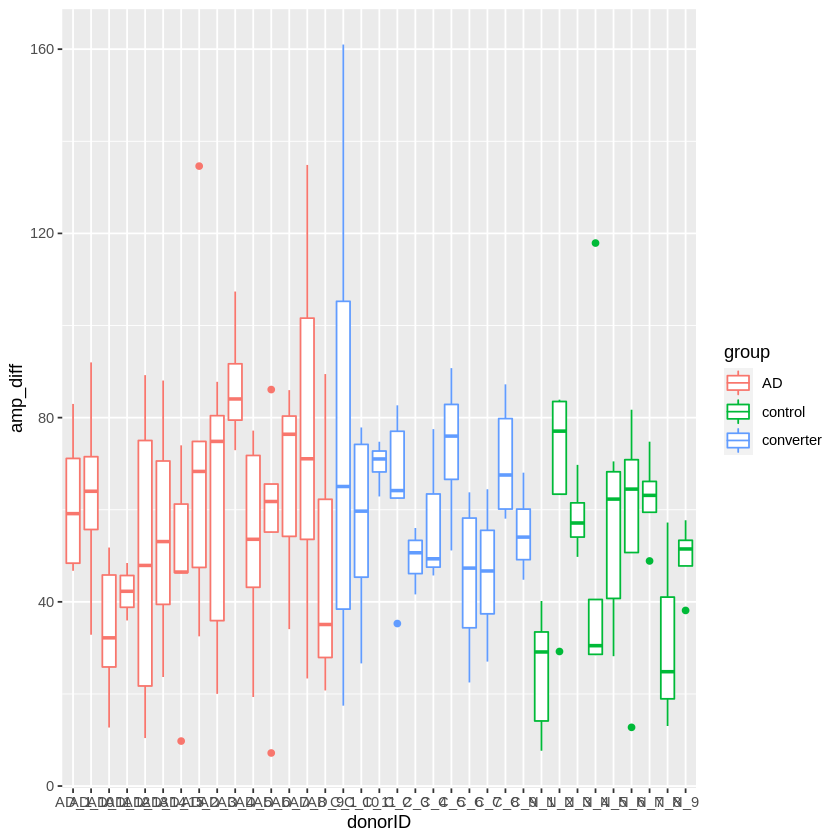

In [301]:
# Plot
ggplot(ampgenes_ordered_scaled_sums_meta, aes(x=donorID, y=amp_diff, color=group)) +
    geom_boxplot()

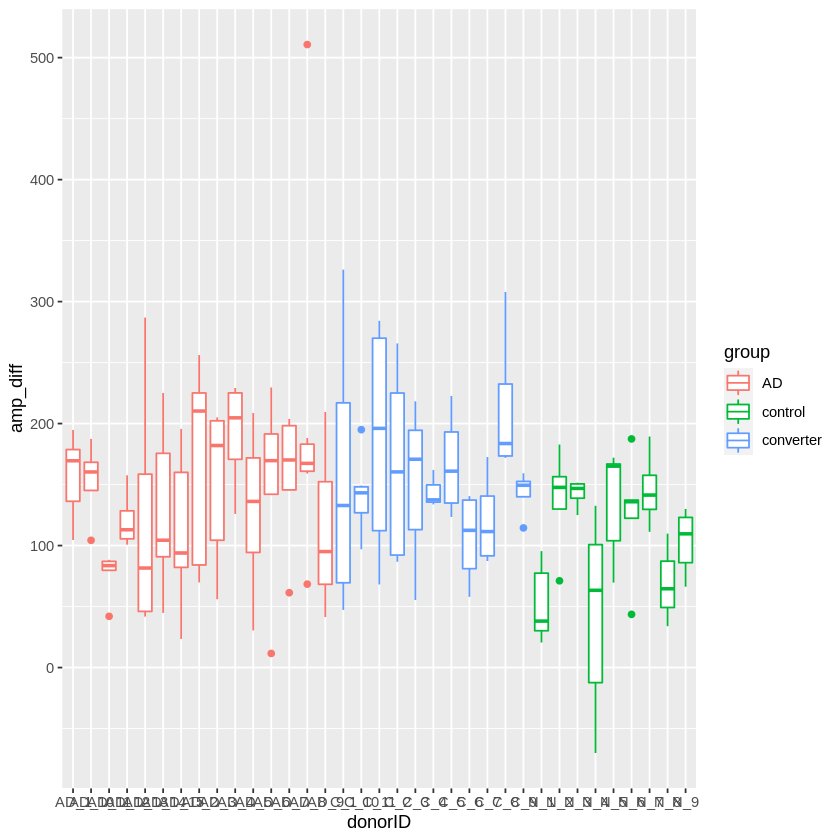

In [294]:
# Plot
ggplot(tpm_t_ampgenes_sums_meta, aes(x=donorID, y=amp_diff, color=group)) +
    geom_boxplot()

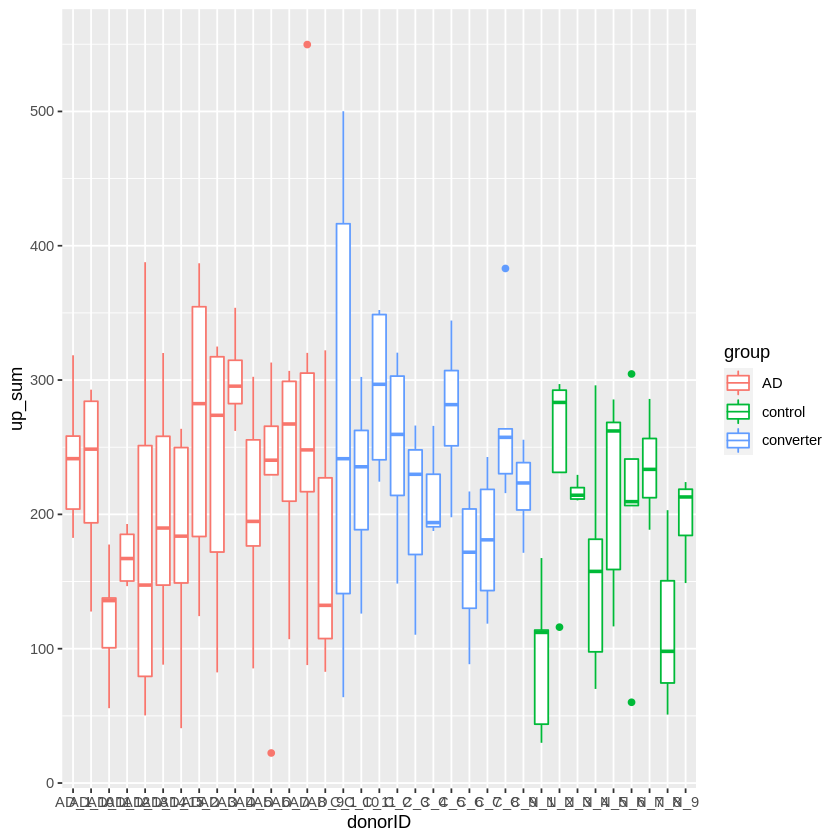

In [206]:
# Plot
ggplot(tpm_t_ampgenes_sums_meta, aes(x=donorID, y=up_sum, color=group)) +
    geom_boxplot()

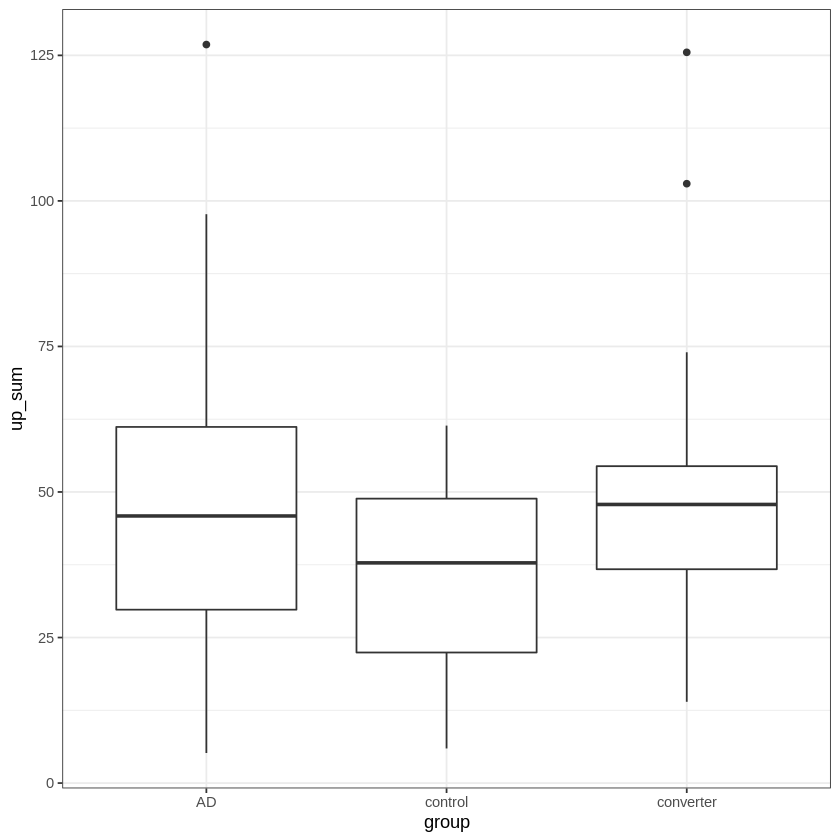

In [302]:
# Plot
ggplot(ampgenes_ordered_scaled_sums_meta, aes(x=group, y=up_sum)) +
    geom_boxplot() +
    theme_bw()

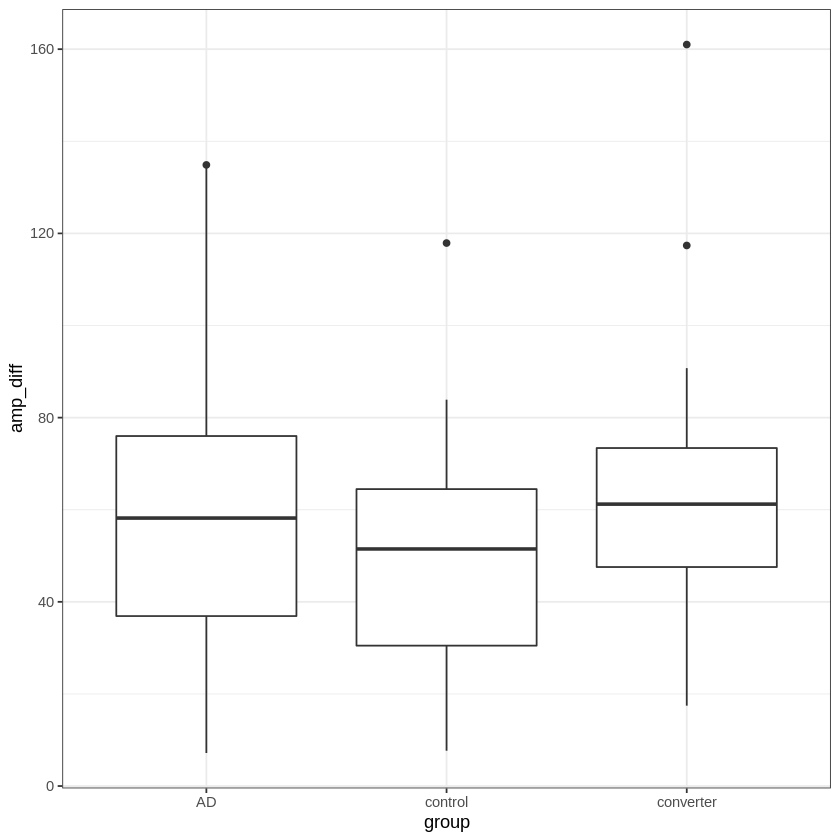

In [303]:
# Plot
ggplot(ampgenes_ordered_scaled_sums_meta, aes(x=group, y=amp_diff)) +
    geom_boxplot() +
    theme_bw()

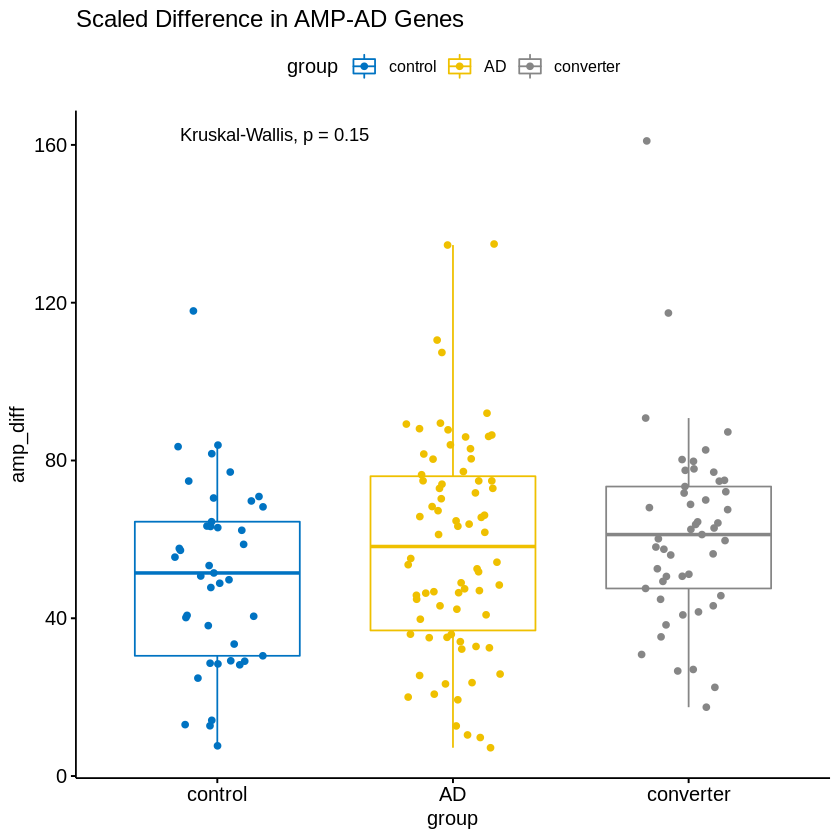

In [304]:
p <- ampgenes_ordered_scaled_sums_meta %>%
ggboxplot(x = 'group', y = 'amp_diff',
          color = "group", palette = "jco",
          add = "jitter") +
stat_compare_means()

#  Add p-value
p +
ggtitle('Scaled Difference in AMP-AD Genes') 

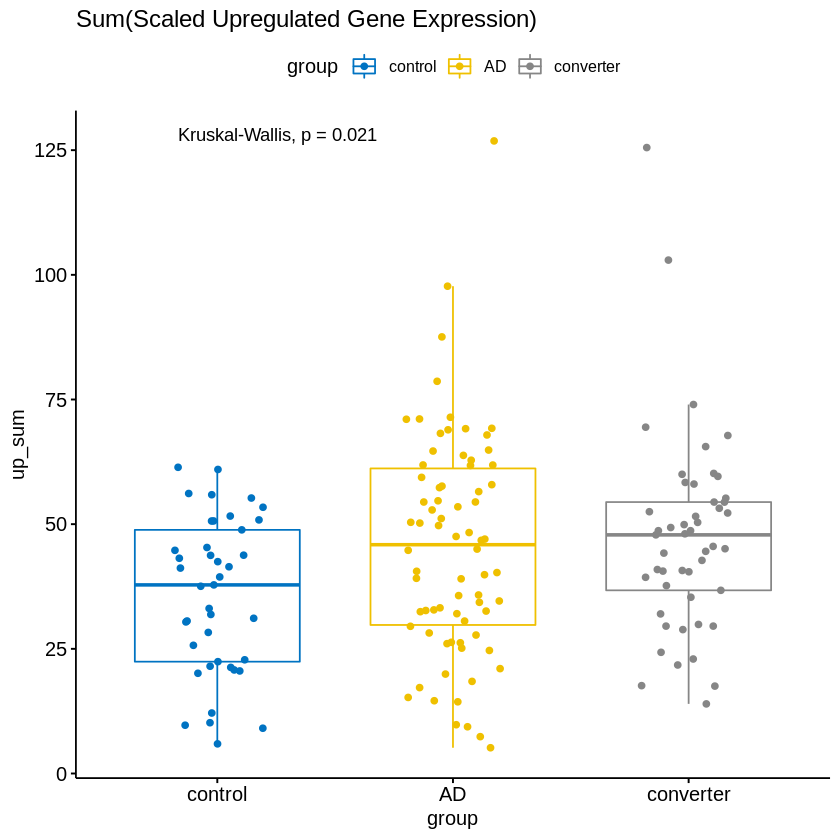

In [305]:
p <- ampgenes_ordered_scaled_sums_meta %>%
ggboxplot(x = 'group', y = 'up_sum',
          color = "group", palette = "jco",
          add = "jitter") +
stat_compare_means()

#  Add p-value
p +
ggtitle('Sum(Scaled Upregulated Gene Expression)') 

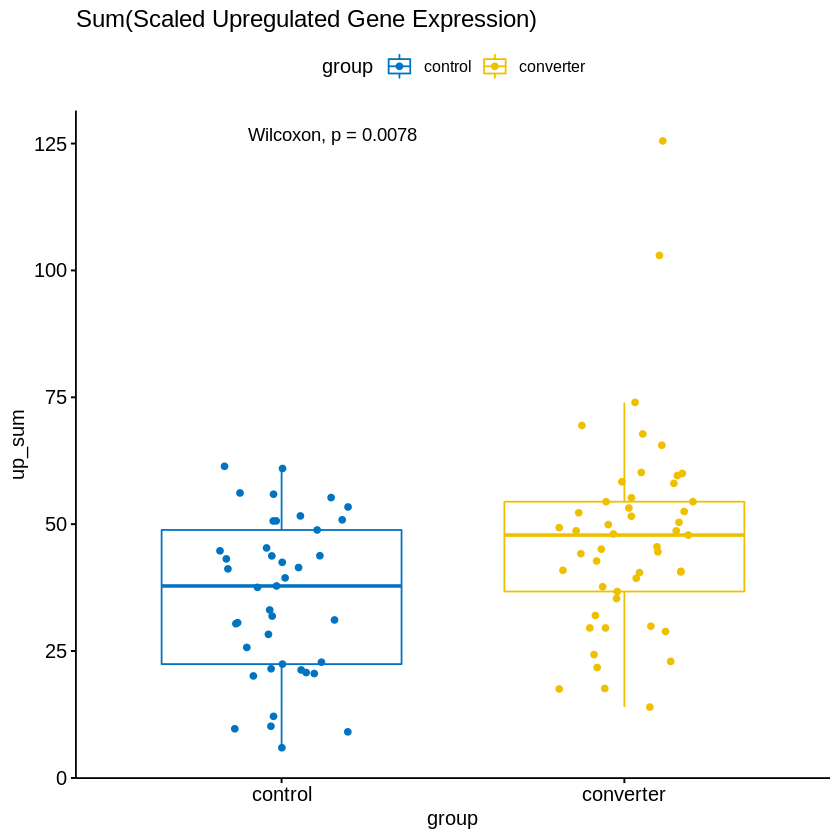

In [1053]:
p <- ampgenes_ordered_scaled_sums_meta %>% 
filter(group != 'AD') %>%
ggboxplot(x = 'group', y = 'up_sum',
          color = "group", palette = "jco",
          add = "jitter") +
stat_compare_means()

#  Add p-value
p +
ggtitle('Sum(Scaled Upregulated Gene Expression)') 

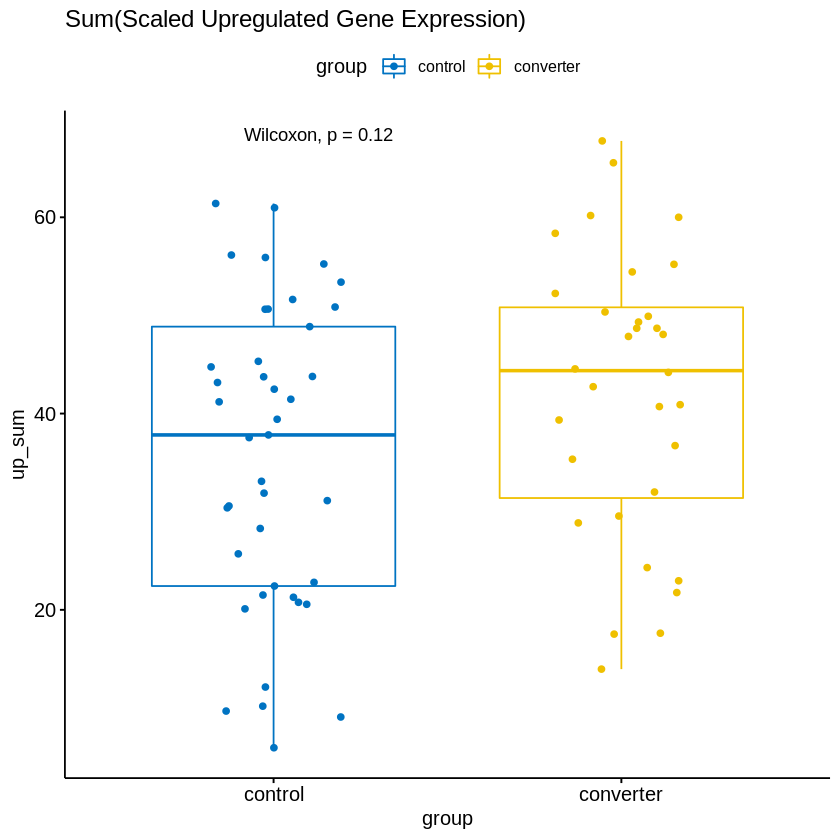

In [1054]:
p <- ampgenes_ordered_scaled_sums_meta %>% 
filter(group == 'control' | yr_since_diag < 0) %>%
ggboxplot(x = 'group', y = 'up_sum',
          color = "group", palette = "jco",
          add = "jitter") +
stat_compare_means()

#  Add p-value
p +
ggtitle('Sum(Scaled Upregulated Gene Expression)') 

In [567]:
head(ampgenes_ordered_scaled_sums_meta)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   QDPR        GNA12       CRTAP     
1 N_1_01_1 2001 NA            <U+22EF> -0.02833764 -0.02564866 -0.7502665
2 N_1_05_1 2005 NA            <U+22EF> -0.31478192 -0.05698242  0.0000000
3 N_1_07_1 2007 NA            <U+22EF> -0.33156826 -0.12861669 -1.0189438
4 N_1_08_1 2008 NA            <U+22EF> -0.90950216 -2.09541587 -1.2997704
5 N_1_09_1 2009 NA            <U+22EF> -0.37860240 -1.57631258 -1.0650360
6 N_2_00_1 2000 NA            <U+22EF> -0.89069040 -1.70718858 -2.8610390
  GFAP       SLC25A18   MID1IP1    PBXIP1     up_sum    down_sum   amp_diff 
1 -0.1751543 -0.1017979  0.0000000 -0.8760529 12.133940  -2.001535 14.135475
2 -0.0389132 -0.1130797  0.0000000 -1.1893966  5.948448  -1.715886  7.664335
3 -0.8197665 -2.0418846 -0.1467242 -1.7897478 22.802324  -6.314257 29.116581
4 -1.0221115 -2.5246723 -1.7928172  0.0000000 30.394458  -9.780657 40.175114
5 -2.2465279 -4.4882014  0.0000000 -2.8610818 20.766055 -12.694637 33.460692
6 -5.3758007 -3.1055379 -2.5967178 -6.2989785 60.971223 -22.926913 83.898137

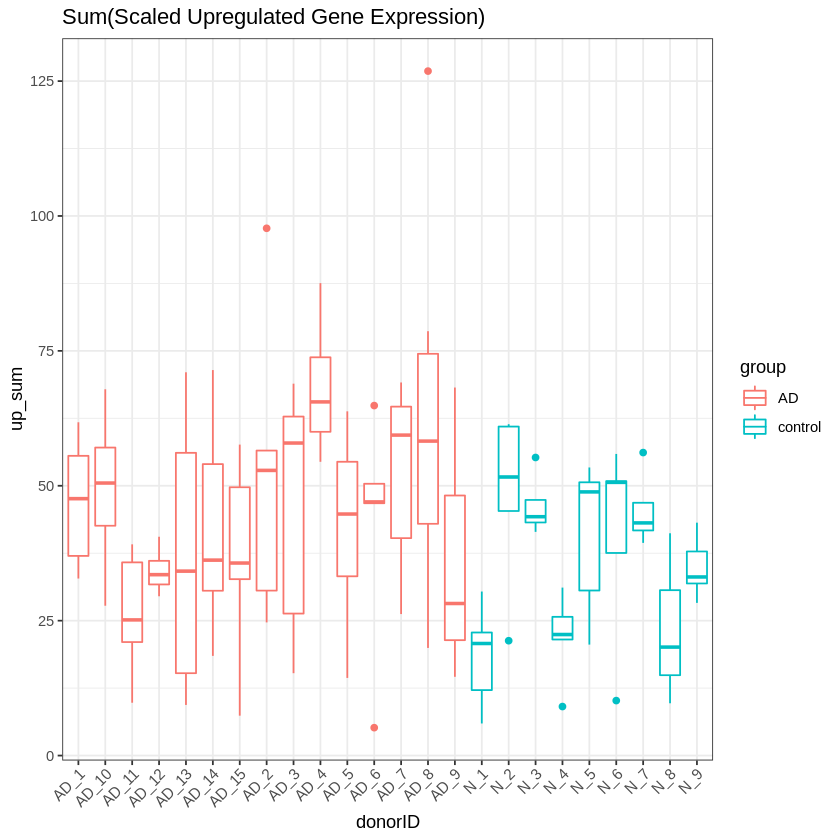

In [574]:
ampgenes_ordered_scaled_sums_meta %>% 
filter(group != 'converter') %>%
ggplot(aes(x = donorID, y = up_sum, color = group)) +
geom_boxplot() +
# geom_jitter() +
# geom_line(aes(group=donorID)) +
labs(title='Sum(Scaled Upregulated Gene Expression)') +
theme_bw() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

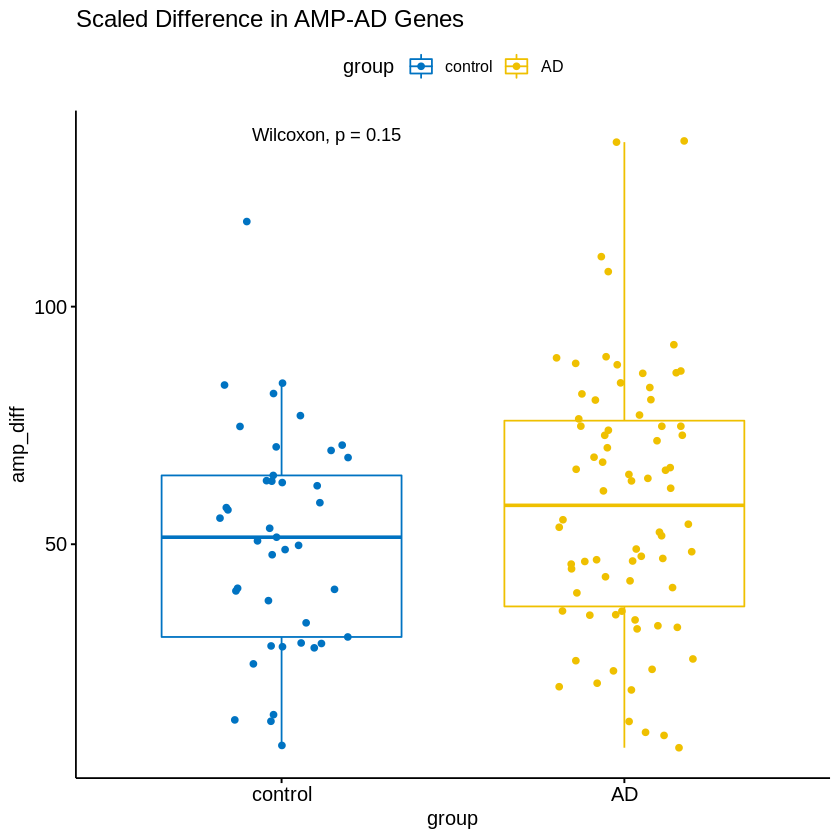

In [307]:
p <- ampgenes_ordered_scaled_sums_meta %>% 
filter(group != 'converter') %>%
ggboxplot(x = 'group', y = 'amp_diff',
          color = "group", palette = "jco",
          add = "jitter") +
stat_compare_means()

#  Add p-value
p +
ggtitle('Scaled Difference in AMP-AD Genes') 

In [213]:
tpm_t_ampgenes_sums_meta_control_converterPreDiag <- tpm_t_ampgenes_sums_meta %>%


donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   LAMP2     NACC2     AHNAK      DOCK1    
1 N_1_01_1 2001 NA            <U+22EF>  0.000000  4.905267  0.3029093  4.200142
2 N_1_05_1 2005 NA            <U+22EF>  1.659321  0.000000  1.6151025  3.378558
3 N_1_07_1 2007 NA            <U+22EF>  1.070086  4.919548  6.3796158  7.988978
4 N_1_08_1 2008 NA            <U+22EF>  4.981081  4.293696  7.6007871 14.790453
5 N_1_09_1 2009 NA            <U+22EF>  1.710634  6.990546  5.5039102  6.192068
6 N_2_00_1 2000 NA            <U+22EF> 10.652810 14.208671 20.6098453 17.941346
  GPRC5B    GFAP       SLC25A18   up_sum    down_sum   amp_diff 
1 3.1837512  0.9688022  0.4974588  43.82148  13.620438  30.20104
2 0.1964775  0.2152342  0.5525903  29.94099   9.416191  20.52480
3 2.6608503  4.5342396  9.9781417 113.87496  36.455059  77.41990
4 9.8054531  5.6534372 12.3373954 167.47166  72.029741  95.44192
5 5.6714958 12.4258504 21.9326350 112.11617  74.023792  38.09237
6 6.5404986 29.7342824 15.1759295 283.35286 126.905701 156.44716

In [ ]:
# 

In [229]:
# Natalie's log2fc
# log2fc extracted from Figure in paper above
ranklog.ampgenes.dt <- read.csv("~/analysis/classes/cse283/amp_ad_log2fc.csv",stringsAsFactor=F, header=T) %>%
    arrange(desc(log2fc))
ranklog.ampgenes.dt

gene     log2fc     
1  PHGDH     0.77880795
2  MRAS      0.37350993
3  DOCK1     0.29006623
4  KCNJ10    0.27814570
5  ITPKB     0.26622517
6  PDE4DIP   0.25430464
7  MYO10     0.23642384
8  AHNAK     0.21854305
9  PLXNB1    0.18874172
10 FAM107A   0.17682119
11 ERBB2IP   0.15298013
12 LAMP2     0.13509934
13 TNS3      0.11721854
14 CALD1     0.09933775
15 SASH1     0.09933775
16 QKI       0.07549669
17 CSRP1     0.07549669
18 RHOQ      0.05165563
19 NACC2     0.03973510
20 PADI2     0.01589404
21 GPRC5B   -0.01390728
22 QDPR     -0.07350993
23 GNA12    -0.13311258
24 CRTAP    -0.13311258
25 GFAP     -0.18079470
26 SLC25A18 -0.20463576
27 MID1IP1  -0.28211921
28 PBXIP1   -0.31788079

In [145]:
names(tpm_t_ampgenes_sums_meta)

[1] "donorID"        "group"          "age_death"      "sex"           
 [5] "braak_stage"    "Year_diagnosis" "APOE_status"    "sampleID"      
 [9] "year"           "yr_since_diag"  "PADI2"          "PHGDH"         
[13] "PDE4DIP"        "PBXIP1"         "KCNJ10"         "CSRP1"         
[17] "ITPKB"          "RHOQ"           "CRTAP"          "PLXNB1"        
[21] "FAM107A"        "MRAS"           "QDPR"           "MYO10"         
[25] "ERBB2IP"        "SASH1"          "QKI"            "GNA12"         
[29] "TNS3"           "CALD1"          "MID1IP1"        "LAMP2"         
[33] "NACC2"          "AHNAK"          "DOCK1"          "GPRC5B"        
[37] "GFAP"           "SLC25A18"       "up_sum"         "down_sum"      
[41] "amp_diff"

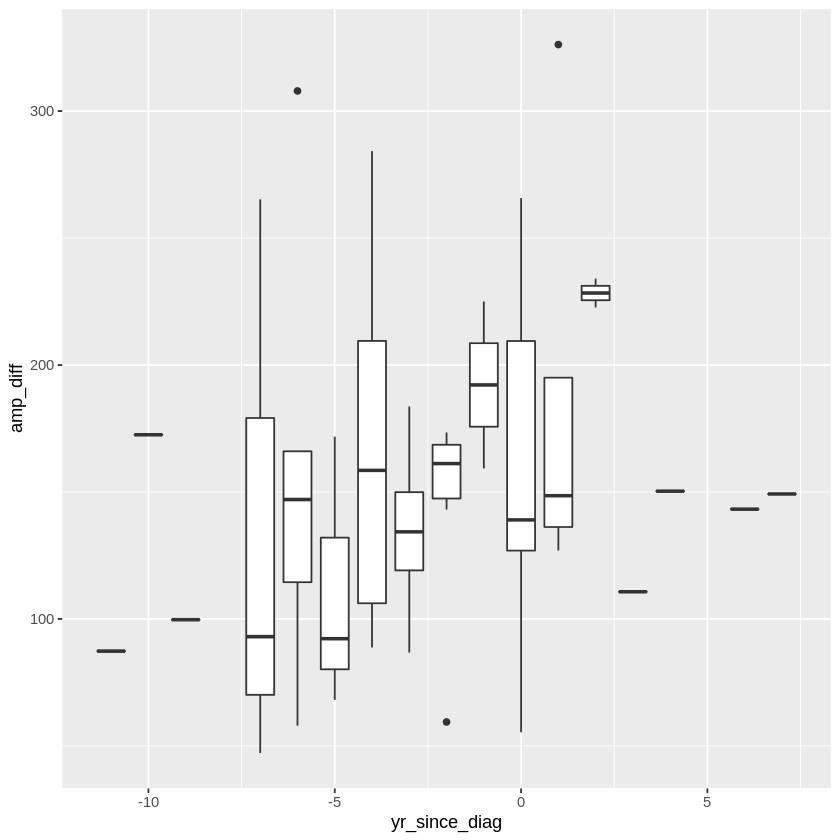

In [147]:
tpm_t_ampgenes_sums_meta %>%
    filter(group=='converter') %>%
    ggplot(aes(x=yr_since_diag, y=amp_diff, group=yr_since_diag)) +
    geom_boxplot()

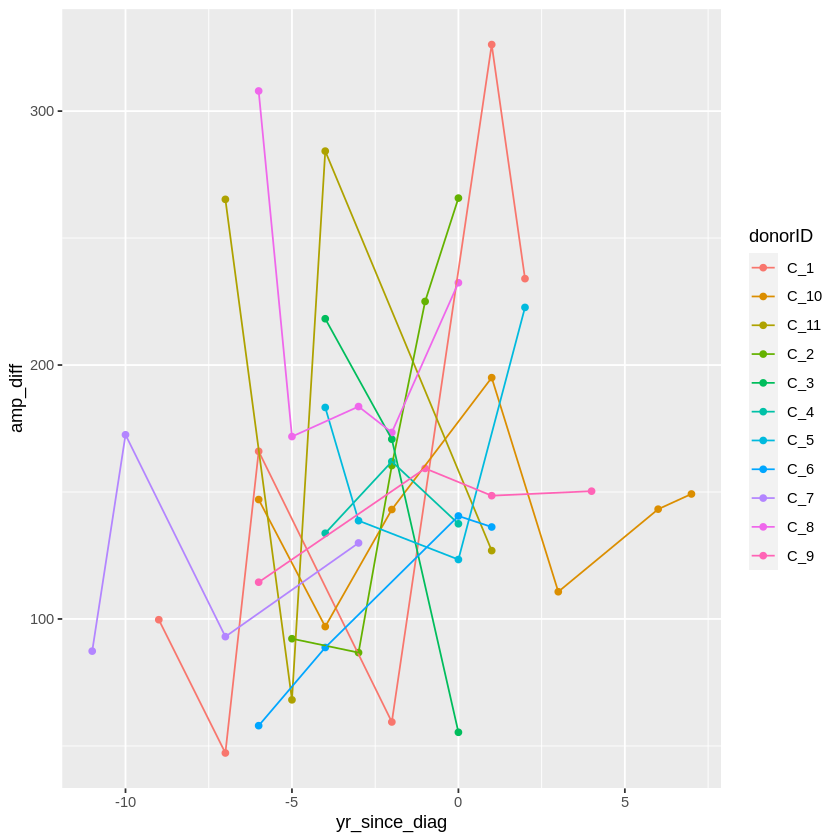

In [149]:
tpm_t_ampgenes_sums_meta %>%
    filter(group=='converter') %>%
    ggplot(aes(x=yr_since_diag, y=amp_diff, color=donorID)) +
    geom_point() +
    geom_line(aes(group=donorID))

# No good

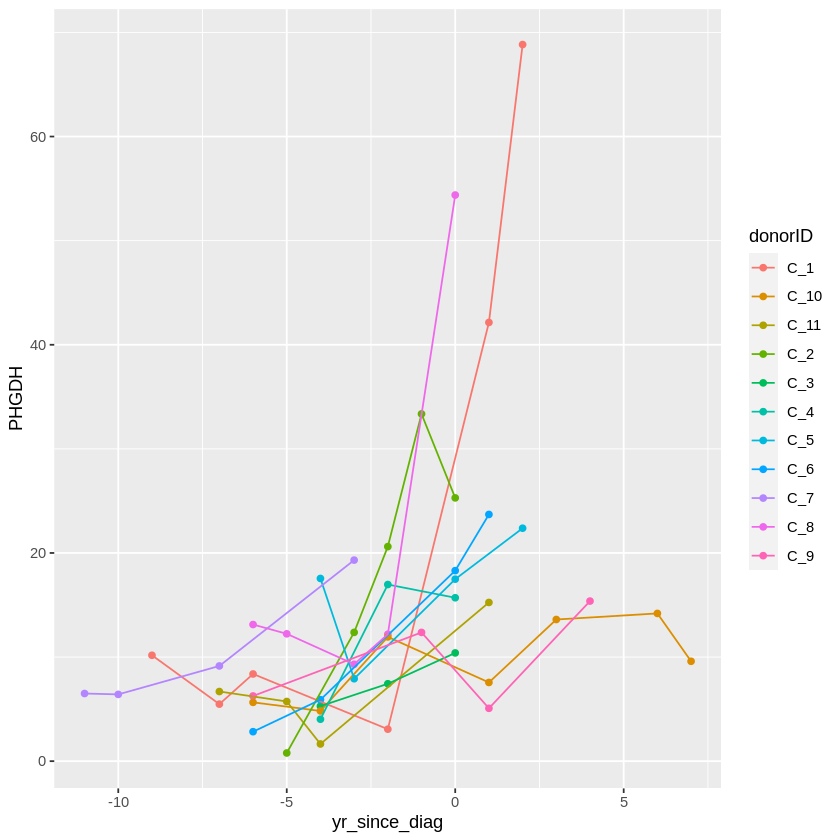

In [150]:
tpm_t_ampgenes_sums_meta %>%
    filter(group=='converter') %>%
    ggplot(aes(x=yr_since_diag, y=PHGDH, color=donorID)) +
    geom_point() +
    geom_line(aes(group=donorID))

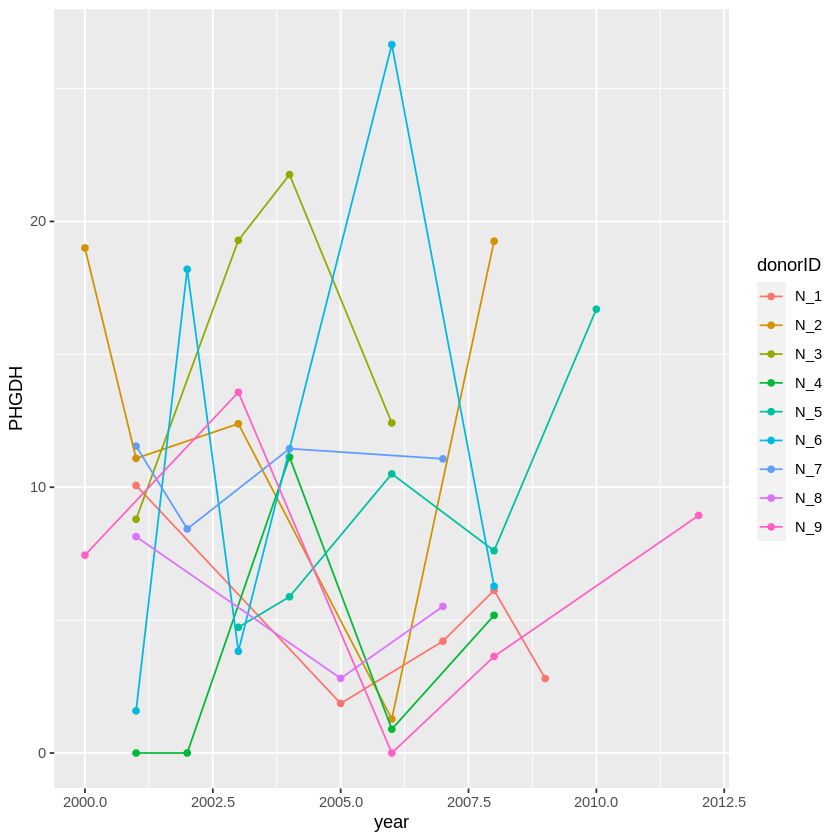

In [152]:
tpm_t_ampgenes_sums_meta %>%
    filter(group=='control') %>%
    ggplot(aes(x=year, y=PHGDH, color=donorID)) +
    geom_point() +
    geom_line(aes(group=donorID))

# 

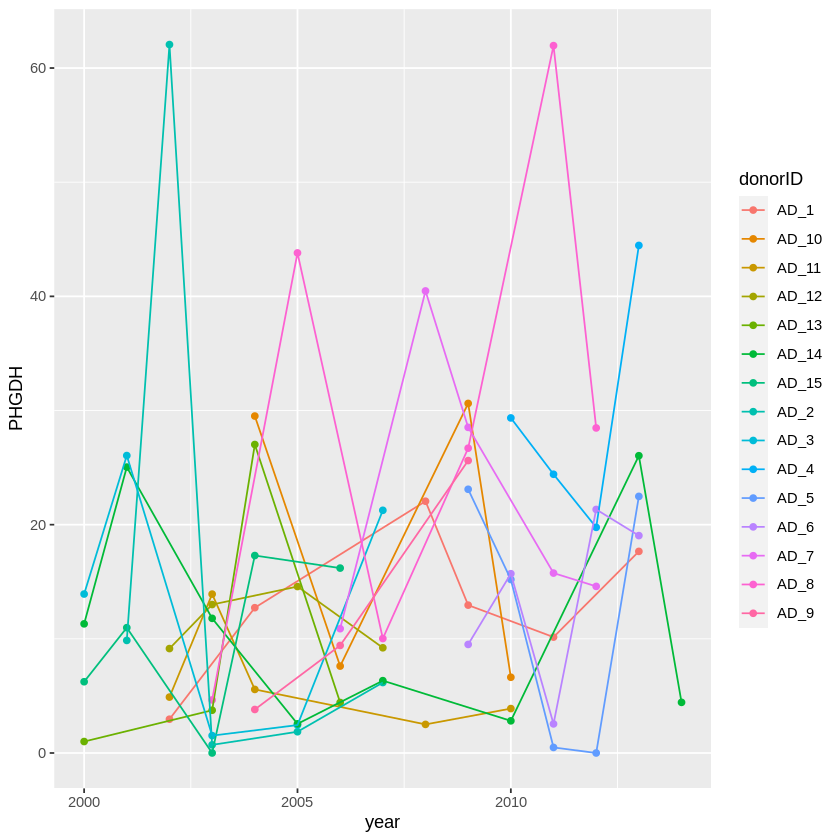

In [153]:
tpm_t_ampgenes_sums_meta %>%
    filter(group=='AD') %>%
    ggplot(aes(x=year, y=PHGDH, color=donorID)) +
    geom_point() +
    geom_line(aes(group=donorID))

# 

In [585]:
names(tpm_scaled_upreg_meta_fixedYears)

[1] "donorID"        "group"          "age_death"      "sex"           
 [5] "braak_stage"    "Year_diagnosis" "APOE_status"    "sampleID"      
 [9] "year"           "yr_since_diag"  "firstYear"      "PADI2"         
[13] "NACC2"          "RHOQ"           "QKI"            "CSRP1"         
[17] "CALD1"          "SASH1"          "TNS3"           "LAMP2"         
[21] "ERBB2IP"        "FAM107A"        "PLXNB1"         "AHNAK"         
[25] "MYO10"          "PDE4DIP"        "ITPKB"          "KCNJ10"        
[29] "DOCK1"          "MRAS"           "PHGDH"          "scaled_total"

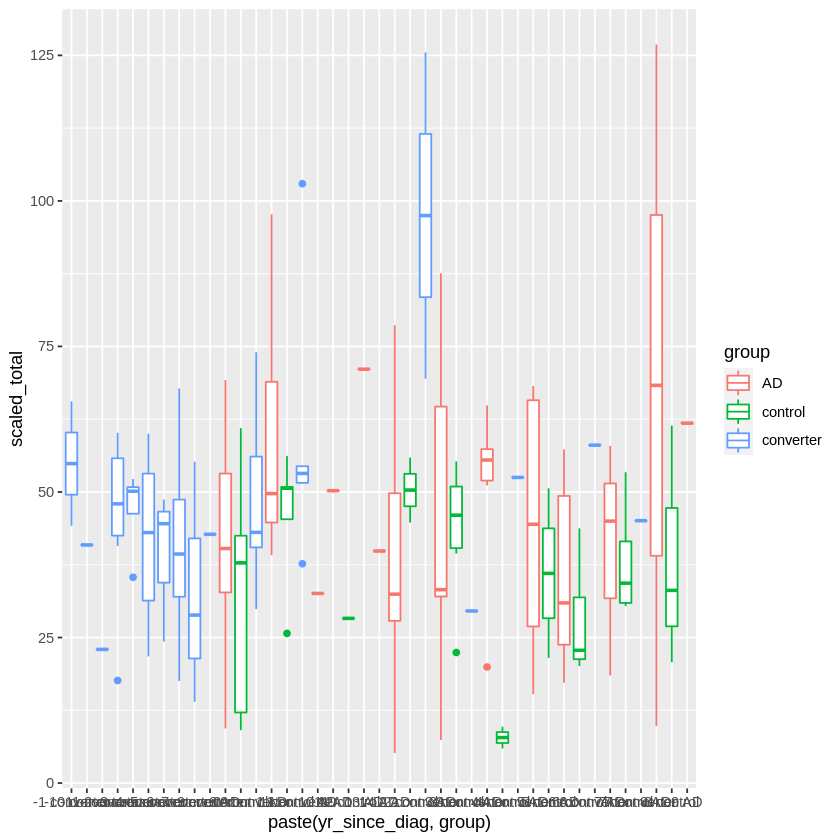

In [591]:
tpm_scaled_upreg_meta_fixedYears %>%
    ggplot() +
#     geom_point() +
#     geom_line(aes(group=donorID))
    geom_boxplot(aes(x=paste(yr_since_diag, group), y=scaled_total, color=group))

In [154]:
library(ggpubr)

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4



`geom_smooth()` using formula 'y ~ x'



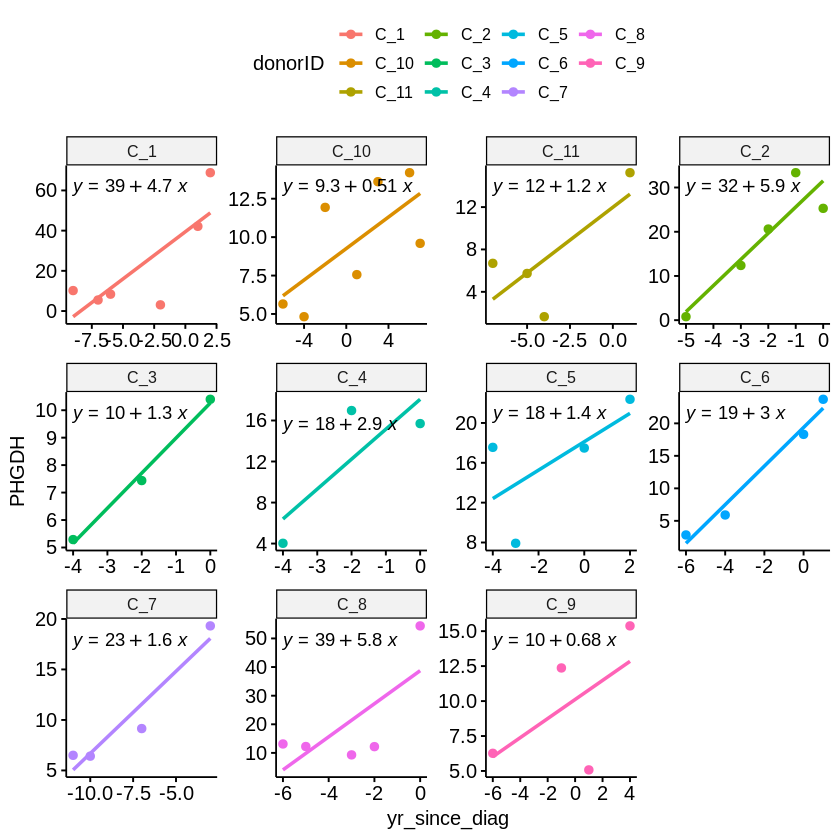

In [165]:
tpm_t_ampgenes_sums_meta %>%
    filter(group=='converter') %>%
    ggscatter(x = "yr_since_diag", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID, scales='free') + 
  stat_regline_equation()

# Need to figure out how to remove the legend

In [168]:
tpm_t_ampgenes_sums_meta %>%
    filter(group=='converter') %>% head()

donorID group     age_death sex braak_stage Year_diagnosis
1 C_1     converter 91        F   3           2010          
2 C_1     converter 91        F   3           2010          
3 C_1     converter 91        F   3           2010          
4 C_1     converter 91        F   3           2010          
5 C_1     converter 91        F   3           2010          
6 C_1     converter 91        F   3           2010          
  APOE_status         sampleID year yr_since_diag <U+22EF>   LAMP2     NACC2    
1 \316\2653/\316\2654 C_1_01_1 2001 -9            <U+22EF>  0.000000  9.197783
2 \316\2653/\316\2654 C_1_12_1 2012  2            <U+22EF> 24.010573  6.132484
3 \316\2653/\316\2654 C_1_08_1 2008 -2            <U+22EF>  0.000000 16.762196
4 \316\2653/\316\2654 C_1_11_1 2011  1            <U+22EF>  0.000000 21.900790
5 \316\2653/\316\2654 C_1_03_1 2003 -7            <U+22EF>  0.000000  2.562583
6 \316\2653/\316\2654 C_1_04_1 2004 -6            <U+22EF>  8.520552  5.077833
  AHNAK     DOCK1     GPRC5B     GFAP      SLC25A18  up_sum    down_sum 
1 29.613315  0.000000 18.5269612 17.288876  1.929883 215.55240 115.84113
2 26.129769  6.790020 46.4365266 14.534168 11.660903 500.12089 266.11197
3 10.055226  0.000000  0.8634494 25.538722  0.000000 116.21349  56.78010
4 21.445431  4.156977 13.5377659  7.415074 19.037394 466.05400 139.85866
5  3.164885  4.918069  1.3860316  2.530582  0.000000  63.88999  16.66437
6 16.932546 26.986981  3.1388145 17.192307  8.827874 267.36569 101.33833
  amp_diff 
1  99.71126
2 234.00892
3  59.43340
4 326.19535
5  47.22562
6 166.02736

In [179]:
# Isolate last sampleIDs for each converter
last_samples_df <- tpm_t_ampgenes_sums_meta %>%
    filter(group=='converter') %>% 
    group_by(donorID) %>%
    summarise(year = max(year)) %>%
    left_join(., meta_all, by=c('donorID', 'year'))

last_samples <- last_samples_df$sampleID

last_samples

[1] "C_1_12_1"  "C_10_14_1" "C_11_09_1" "C_2_12_1"  "C_3_06_1"  "C_4_07_1" 
 [7] "C_5_07_1"  "C_6_13_1"  "C_7_08_1"  "C_8_06_1"  "C_9_10_1"

`geom_smooth()` using formula 'y ~ x'



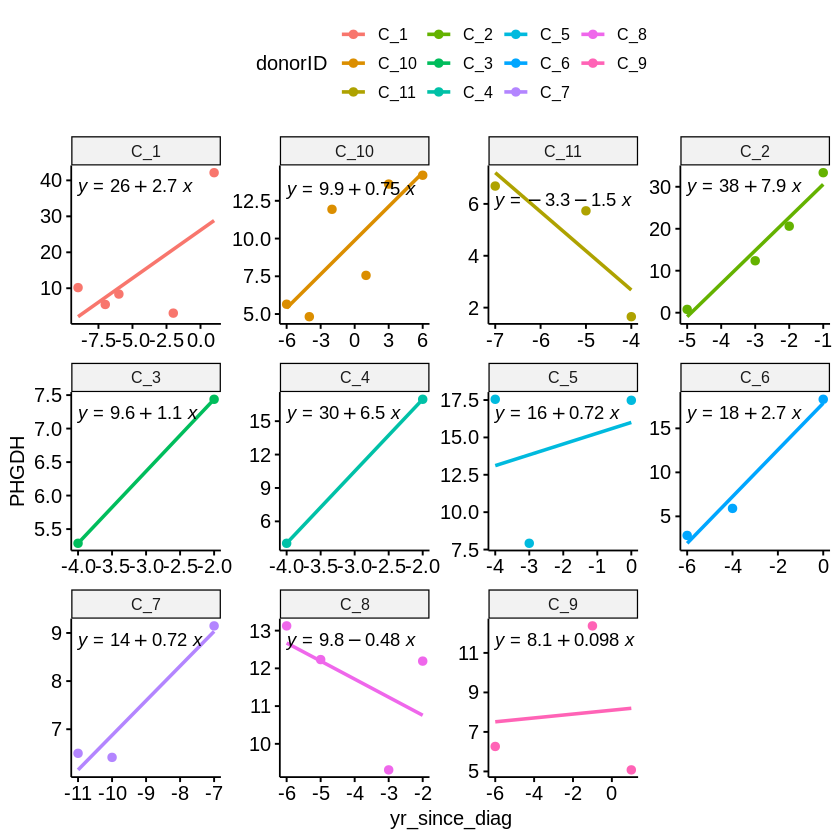

In [184]:
# How many still have positive betas without the last datapoint?
tpm_t_ampgenes_sums_meta %>%
    filter(group=='converter') %>%
    filter(!(sampleID %in% last_samples)) %>%
    ggscatter(x = "yr_since_diag", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID, scales='free') + 
  stat_regline_equation()

# Not predictive for C_11, C_8

`geom_smooth()` using formula 'y ~ x'



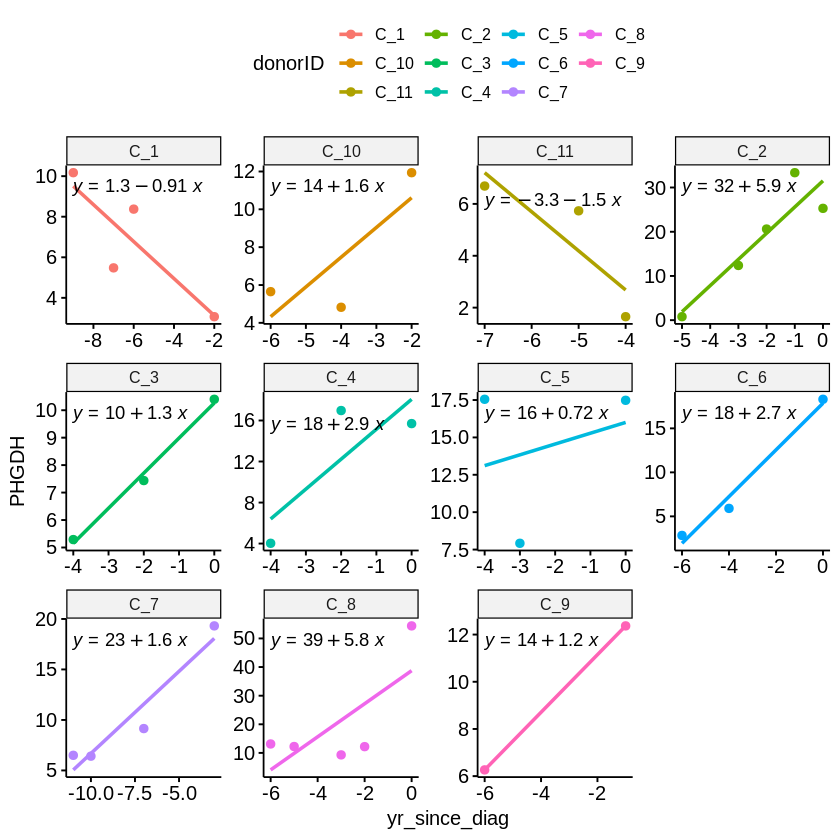

In [346]:
# How many still have positive betas without the last datapoint?
tpm_t_ampgenes_sums_meta %>%
    filter(group=='converter') %>%
    filter(yr_since_diag <= 0) %>%
    ggscatter(x = "yr_since_diag", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID, scales='free') + 
  stat_regline_equation()

# Not predictive for C_11, C_8

In [ ]:
# Would need to calculate each beta

In [ ]:
# Reproduce paper figure
tpm_t_ampgenes_sums_meta %>%
    filter(group=='converter') %>%
    ggplot( aes(x = "donorID", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID, scales='free') + 
  stat_regline_equation()

summarySEwithin
dfwc <- summarySEwithin(dfw_long, measurevar="value", withinvars="condition",
                        idvar="subject", na.rm=FALSE, conf.interval=.95)


library(ggplot2)
# Make the graph with the 95% confidence interval
ggplot(dfwc, aes(x=condition, y=value, group=1)) +
    geom_line() +
    geom_errorbar(width=.1, aes(ymin=value-ci, ymax=value+ci)) +
    geom_point(shape=21, size=3, fill="white") +
    ylim(40,60)

`geom_smooth()` using formula 'y ~ x'



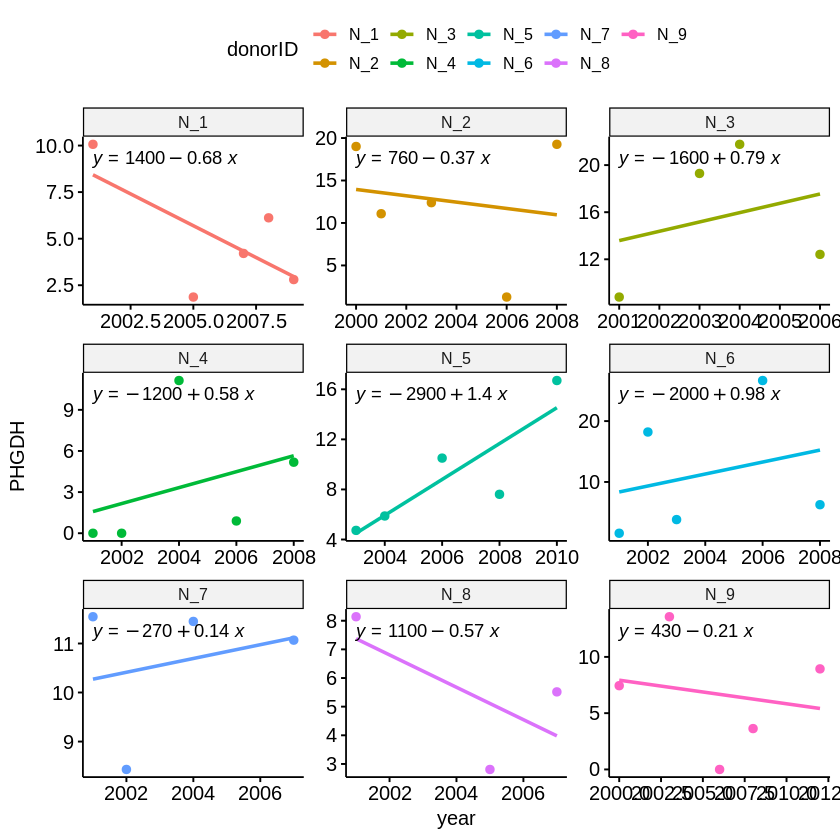

In [217]:
# How many still have positive betas without the last datapoint?
tpm_t_ampgenes_sums_meta %>%
    filter(group=='control') %>%
    ggscatter(x = "year", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID, scales='free') + 
  stat_regline_equation()

# Not predictive for C_11, C_8

In [347]:
tpm_t_ampgenes_sums_meta_converters <- tpm_t_ampgenes_sums_meta %>% filter(group == 'converter')

In [355]:
lm(C_7_PHGDH)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): incompatible dimensions


In [354]:
C_7_PHGDH <- tpm_t_ampgenes_sums_meta_converters %>% arrange(yr_since_diag) %>% filter(donorID=='C_7') %>% select(PHGDH)

`geom_smooth()` using formula 'y ~ x'



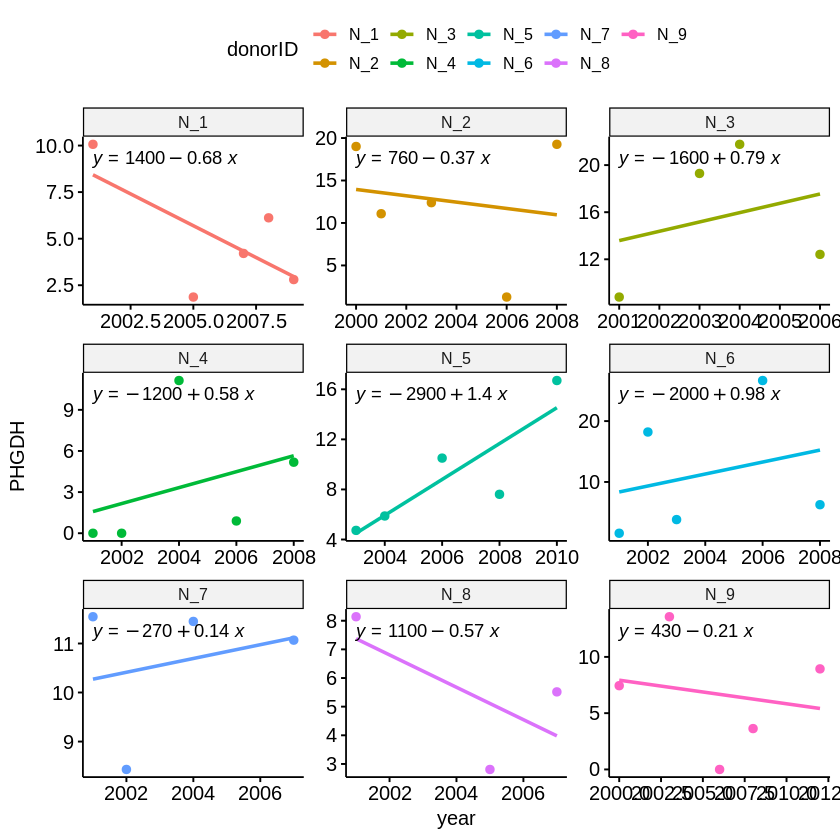

In [185]:
# Control betas (with all datapoints)
tpm_t_ampgenes_sums_meta %>%
    filter(group=='control') %>%
    ggscatter(x = "year", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID, scales='free') + 
  stat_regline_equation()

# Not predictive for C_11, C_8

`geom_smooth()` using formula 'y ~ x'



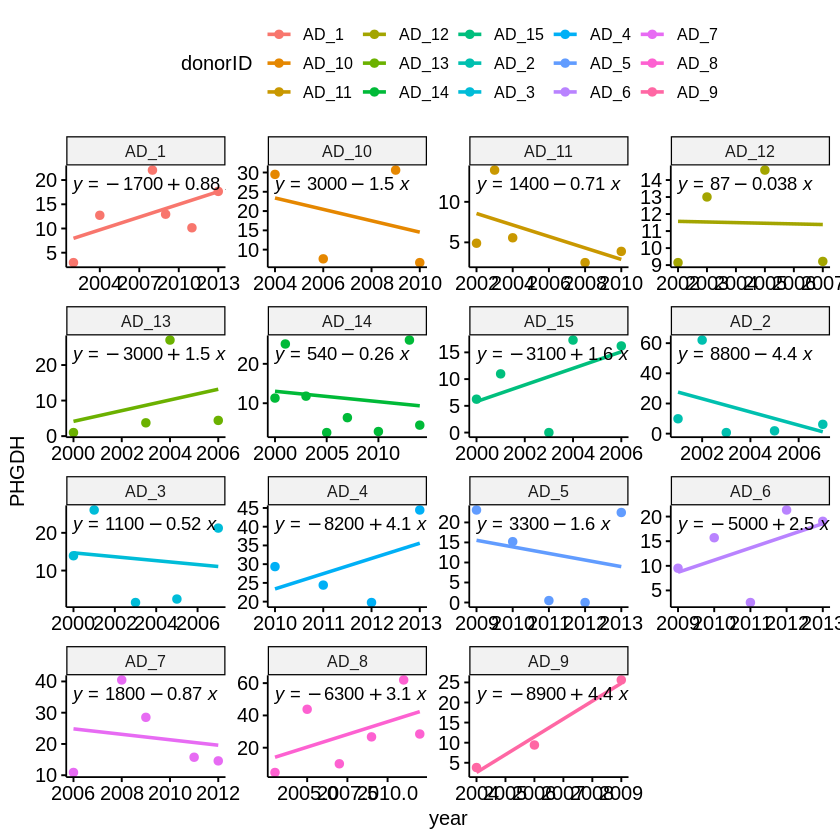

In [186]:
# AD (with all datapoints)
tpm_t_ampgenes_sums_meta %>%
    filter(group=='AD') %>%
    ggscatter(x = "year", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID, scales='free') + 
  stat_regline_equation()

# Not predictive for C_11, C_8

`geom_smooth()` using formula 'y ~ x'



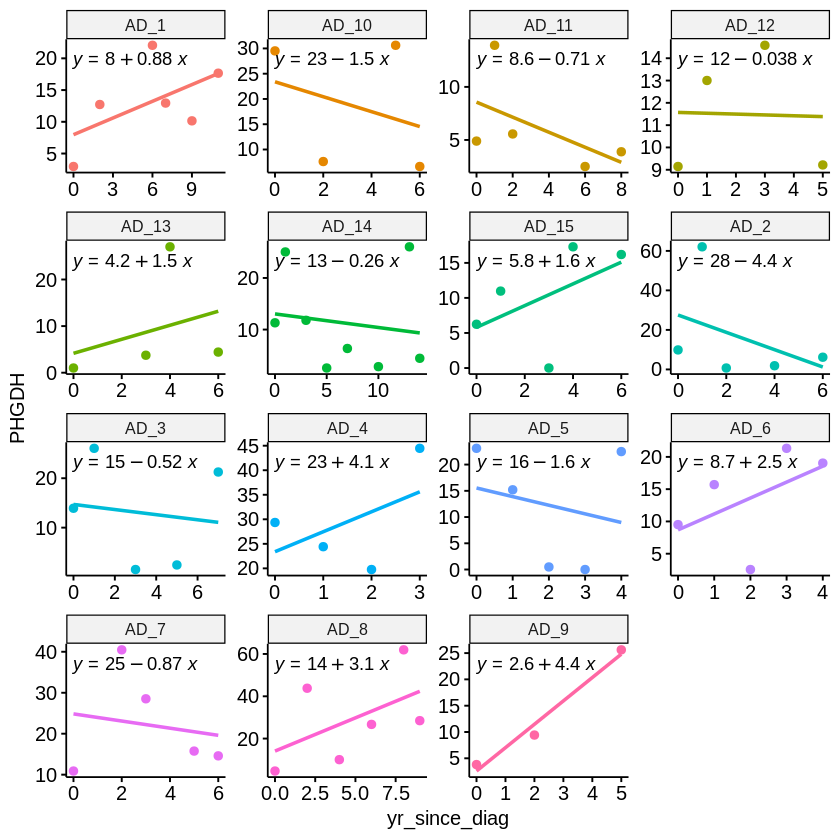

In [579]:
# AD (with all datapoints)
tpm_meta_fixedYears %>%
    filter(group=='AD') %>%
    ggscatter(x = "yr_since_diag", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID, scales='free') + 
  stat_regline_equation() +
rremove('legend')

`geom_smooth()` using formula 'y ~ x'



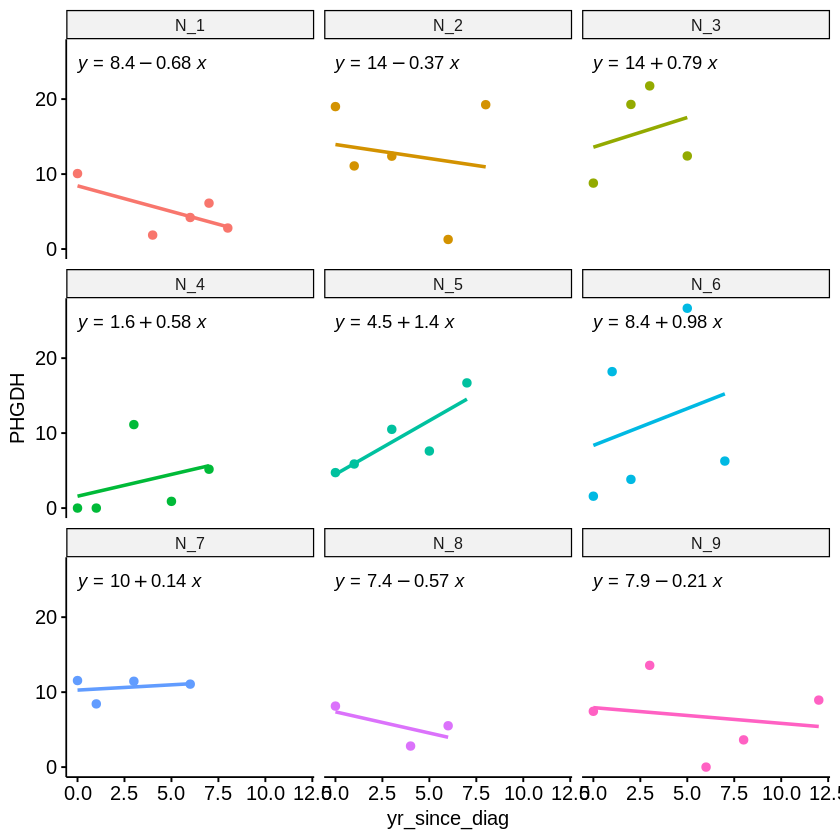

In [584]:
# Control (with all datapoints)
tpm_meta_fixedYears %>%
    filter(group=='control') %>%
    ggscatter(x = "yr_since_diag", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID) + 
  stat_regline_equation() +
rremove('legend')

`geom_smooth()` using formula 'y ~ x'



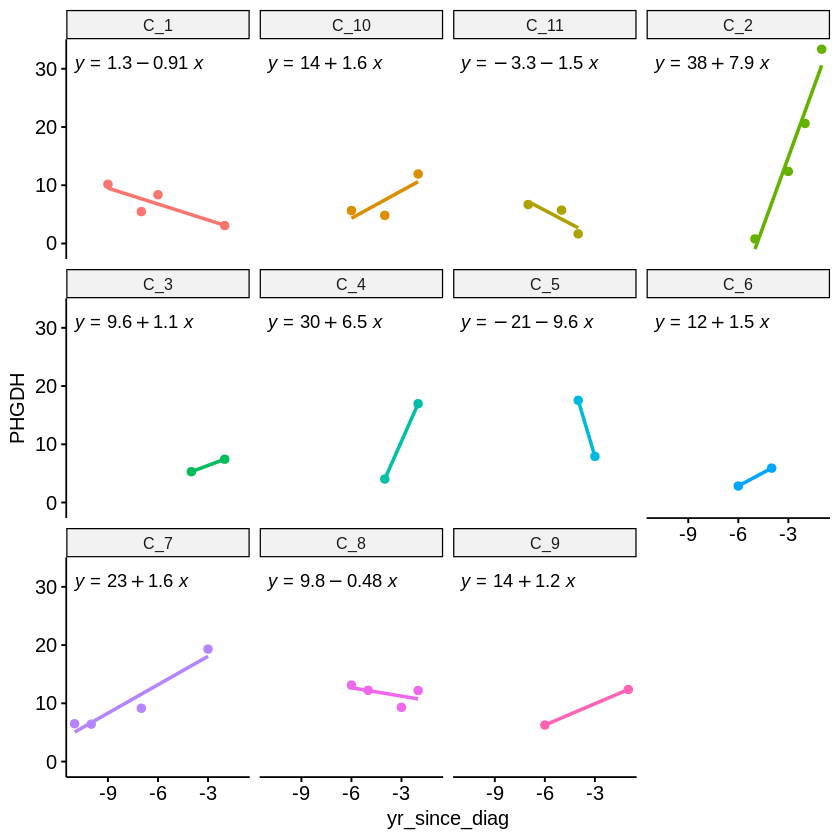

In [583]:
# Converters (with all datapoints)
tpm_meta_fixedYears %>%
    filter(group=='converter', yr_since_diag < 0) %>%
    ggscatter(x = "yr_since_diag", y = "PHGDH",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID) + 
  stat_regline_equation() +
rremove('legend')

`geom_smooth()` using formula 'y ~ x'



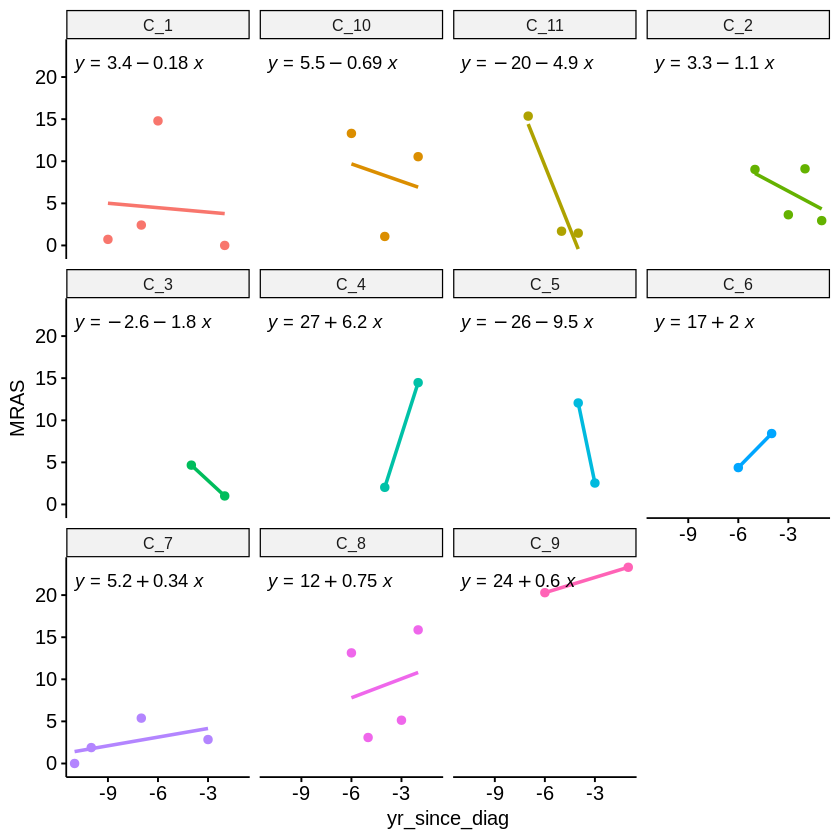

In [969]:
# Converters (with all datapoints)
tpm_meta_fixedYears %>%
    filter(group=='converter', yr_since_diag < 0) %>%
    ggscatter(x = "yr_since_diag", y = "MRAS",
              color = "donorID", add = "reg.line") +
  facet_wrap(~donorID) + 
  stat_regline_equation() +
rremove('legend')

### From the paper

In this model, the indices are i: research subject, and j: sample. The response variable is PHGDH’s exRNA level: Y. The observed data of the response variable is the log transformed TPM: log2(TPM+1). The fixed effects are Time (A, age), Group (G, converter or control), and Sex (S, male or female). $\beta_{0i}$ is the intercept that accounts for group and sex, where  is the error term for each sample. $\beta_{1i}$ includes the contribution of time to the intercept $(\gamma_{10} x A_{ij})$, the interaction of group and time  and the interaction of sex and time . We implemented this model using the lme4 package in R [89].



Consistent with these results, a mixed model that accounts for sex and age reported a significant interaction between time and group (converter or control; p = 0.030; ANOVA), whereas the time effect is insignificant in the presence of the interaction term (p = 0.922; ANOVA).

In [ ]:
### Example linear mixed model 
# not run
lmer(log2(count+1) ~ yr_since_diag + group + sex)

In [ ]:
# How did they calculate age with only the age at death and the years of collection?
# Will use yr_since_diag as proxy; can add 70 for age to further approximate?

In [779]:
head(tpm_meta_fixedYears)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   LAMP2     NACC2     AHNAK      DOCK1    
1 N_1_01_1 2001 0             <U+22EF>  0.000000  4.905267  0.3029093  4.200142
2 N_1_05_1 2005 4             <U+22EF>  1.659321  0.000000  1.6151025  3.378558
3 N_1_07_1 2007 6             <U+22EF>  1.070086  4.919548  6.3796158  7.988978
4 N_1_08_1 2008 7             <U+22EF>  4.981081  4.293696  7.6007871 14.790453
5 N_1_09_1 2009 8             <U+22EF>  1.710634  6.990546  5.5039102  6.192068
6 N_2_00_1 2000 0             <U+22EF> 10.652810 14.208671 20.6098453 17.941346
  GPRC5B    GFAP       SLC25A18   up_sum    down_sum   amp_diff 
1 3.1837512  0.9688022  0.4974588  43.82148  13.620438  30.20104
2 0.1964775  0.2152342  0.5525903  29.94099   9.416191  20.52480
3 2.6608503  4.5342396  9.9781417 113.87496  36.455059  77.41990
4 9.8054531  5.6534372 12.3373954 167.47166  72.029741  95.44192
5 5.6714958 12.4258504 21.9326350 112.11617  74.023792  38.09237
6 6.5404986 29.7342824 15.1759295 283.35286 126.905701 156.44716

In [794]:
tpm_meta_fixedYears$firstYear = meta_withFirstYear$firstYear

In [795]:
head(tpm_meta_fixedYears)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   LAMP2     NACC2     AHNAK      DOCK1    
1 N_1_01_1 2001 0             <U+22EF>  0.000000  4.905267  0.3029093  4.200142
2 N_1_05_1 2005 4             <U+22EF>  1.659321  0.000000  1.6151025  3.378558
3 N_1_07_1 2007 6             <U+22EF>  1.070086  4.919548  6.3796158  7.988978
4 N_1_08_1 2008 7             <U+22EF>  4.981081  4.293696  7.6007871 14.790453
5 N_1_09_1 2009 8             <U+22EF>  1.710634  6.990546  5.5039102  6.192068
6 N_2_00_1 2000 0             <U+22EF> 10.652810 14.208671 20.6098453 17.941346
  GPRC5B    GFAP       SLC25A18   up_sum    down_sum   amp_diff 
1 3.1837512  0.9688022  0.4974588  43.82148  13.620438  30.20104
2 0.1964775  0.2152342  0.5525903  29.94099   9.416191  20.52480
3 2.6608503  4.5342396  9.9781417 113.87496  36.455059  77.41990
4 9.8054531  5.6534372 12.3373954 167.47166  72.029741  95.44192
5 5.6714958 12.4258504 21.9326350 112.11617  74.023792  38.09237
6 6.5404986 29.7342824 15.1759295 283.35286 126.905701 156.44716

In [801]:
tpm_meta_fixedYears_proxyAge <- tpm_meta_fixedYears %>%
mutate(age_proxy = 70 + year - firstYear)

In [802]:
head(tpm_meta_fixedYears_proxyAge)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   NACC2     AHNAK      DOCK1     GPRC5B   
1 N_1_01_1 2001 0             <U+22EF>  4.905267  0.3029093  4.200142 3.1837512
2 N_1_05_1 2005 4             <U+22EF>  0.000000  1.6151025  3.378558 0.1964775
3 N_1_07_1 2007 6             <U+22EF>  4.919548  6.3796158  7.988978 2.6608503
4 N_1_08_1 2008 7             <U+22EF>  4.293696  7.6007871 14.790453 9.8054531
5 N_1_09_1 2009 8             <U+22EF>  6.990546  5.5039102  6.192068 5.6714958
6 N_2_00_1 2000 0             <U+22EF> 14.208671 20.6098453 17.941346 6.5404986
  GFAP       SLC25A18   up_sum    down_sum   amp_diff  age_proxy
1  0.9688022  0.4974588  43.82148  13.620438  30.20104 70       
2  0.2152342  0.5525903  29.94099   9.416191  20.52480 74       
3  4.5342396  9.9781417 113.87496  36.455059  77.41990 76       
4  5.6534372 12.3373954 167.47166  72.029741  95.44192 77       
5 12.4258504 21.9326350 112.11617  74.023792  38.09237 78       
6 29.7342824 15.1759295 283.35286 126.905701 156.44716 70

In [798]:
head(tpm_t_ampgenes_sums_meta)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   LAMP2     NACC2     AHNAK      DOCK1    
1 N_1_01_1 2001 NA            <U+22EF>  0.000000  4.905267  0.3029093  4.200142
2 N_1_05_1 2005 NA            <U+22EF>  1.659321  0.000000  1.6151025  3.378558
3 N_1_07_1 2007 NA            <U+22EF>  1.070086  4.919548  6.3796158  7.988978
4 N_1_08_1 2008 NA            <U+22EF>  4.981081  4.293696  7.6007871 14.790453
5 N_1_09_1 2009 NA            <U+22EF>  1.710634  6.990546  5.5039102  6.192068
6 N_2_00_1 2000 NA            <U+22EF> 10.652810 14.208671 20.6098453 17.941346
  GPRC5B    GFAP       SLC25A18   up_sum    down_sum   amp_diff 
1 3.1837512  0.9688022  0.4974588  43.82148  13.620438  30.20104
2 0.1964775  0.2152342  0.5525903  29.94099   9.416191  20.52480
3 2.6608503  4.5342396  9.9781417 113.87496  36.455059  77.41990
4 9.8054531  5.6534372 12.3373954 167.47166  72.029741  95.44192
5 5.6714958 12.4258504 21.9326350 112.11617  74.023792  38.09237
6 6.5404986 29.7342824 15.1759295 283.35286 126.905701 156.44716

In [189]:
meta_all %>%
filter(donorID=='C_7')

donorID group     age_death sex braak_stage Year_diagnosis
1 C_7     converter 96        F   5           2011          
2 C_7     converter 96        F   5           2011          
3 C_7     converter 96        F   5           2011          
4 C_7     converter 96        F   5           2011          
  APOE_status         sampleID year yr_since_diag
1 \316\2653/\316\2654 C_7_00_1 2000 -11          
2 \316\2653/\316\2654 C_7_01_1 2001 -10          
3 \316\2653/\316\2654 C_7_04_1 2004  -7          
4 \316\2653/\316\2654 C_7_08_1 2008  -3

In [803]:
control_converter_tmp <- tpm_meta_fixedYears_proxyAge %>% filter(group!='AD')

In [804]:
# Test!

# Let 1 be the intercept for beta_0
PHGDH.mod <- lmer(log2(PHGDH+1) ~ 1 + age_proxy + group + sex + # fixed effects
                  + age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID), # control for different individuals
                 data=control_converter_tmp)

In [805]:
summary(PHGDH.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log2(PHGDH + 1) ~ 1 + age_proxy + group + sex + +age_proxy:group +  
    age_proxy:sex + (1 | donorID)
   Data: control_converter_tmp

REML criterion at convergence: 272.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.69629 -0.34242  0.06714  0.52920  1.97624 

Random effects:
 Groups   Name        Variance Std.Dev.
 donorID  (Intercept) 0.2555   0.5055  
 Residual             0.9138   0.9559  
Number of obs: 90, groups:  donorID, 20

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)                7.15223    4.38355  75.48424   1.632  0.10693   
age_proxy                 -0.05844    0.05945  75.16922  -0.983  0.32873   
groupconverter           -14.37696    5.06684  76.42334  -2.837  0.00582 **
sexM                     -13.72434    5.90408  73.99594  -2.325  0.02284 * 
age_proxy:groupconverter   0.20384    0.06871  7

In [807]:
control_converter_tmp$yr_since_diag = ifelse(control_converter_tmp$group=='control', 
                                             NA, control_converter_tmp$yr_since_diag)

head(control_converter_tmp)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   NACC2     AHNAK      DOCK1     GPRC5B   
1 N_1_01_1 2001 NA            <U+22EF>  4.905267  0.3029093  4.200142 3.1837512
2 N_1_05_1 2005 NA            <U+22EF>  0.000000  1.6151025  3.378558 0.1964775
3 N_1_07_1 2007 NA            <U+22EF>  4.919548  6.3796158  7.988978 2.6608503
4 N_1_08_1 2008 NA            <U+22EF>  4.293696  7.6007871 14.790453 9.8054531
5 N_1_09_1 2009 NA            <U+22EF>  6.990546  5.5039102  6.192068 5.6714958
6 N_2_00_1 2000 NA            <U+22EF> 14.208671 20.6098453 17.941346 6.5404986
  GFAP       SLC25A18   up_sum    down_sum   amp_diff  age_proxy
1  0.9688022  0.4974588  43.82148  13.620438  30.20104 70       
2  0.2152342  0.5525903  29.94099   9.416191  20.52480 74       
3  4.5342396  9.9781417 113.87496  36.455059  77.41990 76       
4  5.6534372 12.3373954 167.47166  72.029741  95.44192 77       
5 12.4258504 21.9326350 112.11617  74.023792  38.09237 78       
6 29.7342824 15.1759295 283.35286 126.905701 156.44716 70

In [810]:
control_converter_tmp_preDiag <- control_converter_tmp %>% filter(yr_since_diag < 0 | is.na(yr_since_diag))

head(control_converter_tmp_preDiag)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   NACC2     AHNAK      DOCK1     GPRC5B   
1 N_1_01_1 2001 NA            <U+22EF>  4.905267  0.3029093  4.200142 3.1837512
2 N_1_05_1 2005 NA            <U+22EF>  0.000000  1.6151025  3.378558 0.1964775
3 N_1_07_1 2007 NA            <U+22EF>  4.919548  6.3796158  7.988978 2.6608503
4 N_1_08_1 2008 NA            <U+22EF>  4.293696  7.6007871 14.790453 9.8054531
5 N_1_09_1 2009 NA            <U+22EF>  6.990546  5.5039102  6.192068 5.6714958
6 N_2_00_1 2000 NA            <U+22EF> 14.208671 20.6098453 17.941346 6.5404986
  GFAP       SLC25A18   up_sum    down_sum   amp_diff  age_proxy
1  0.9688022  0.4974588  43.82148  13.620438  30.20104 70       
2  0.2152342  0.5525903  29.94099   9.416191  20.52480 74       
3  4.5342396  9.9781417 113.87496  36.455059  77.41990 76       
4  5.6534372 12.3373954 167.47166  72.029741  95.44192 77       
5 12.4258504 21.9326350 112.11617  74.023792  38.09237 78       
6 29.7342824 15.1759295 283.35286 126.905701 156.44716 70

In [811]:
PHGDH_onlyPreDiag.mod <- lmer(log2(PHGDH+1) ~ 1 + age_proxy + group + sex + # fixed effects
                  + age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID), # control for different individuals
                 data=control_converter_tmp_preDiag)

In [815]:
dim(control_converter_tmp_preDiag)

[1] 73 43

In [812]:
summary(PHGDH_onlyPreDiag.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log2(PHGDH + 1) ~ 1 + age_proxy + group + sex + +age_proxy:group +  
    age_proxy:sex + (1 | donorID)
   Data: control_converter_tmp_preDiag

REML criterion at convergence: 226.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.58898 -0.29766  0.03404  0.54259  1.84154 

Random effects:
 Groups   Name        Variance Std.Dev.
 donorID  (Intercept) 0.2138   0.4624  
 Residual             1.0293   1.0145  
Number of obs: 73, groups:  donorID, 20

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                6.33946    4.80533  61.57461   1.319    0.192
age_proxy                 -0.04691    0.06538  61.52949  -0.717    0.476
groupconverter           -10.51084    7.70496  60.68508  -1.364    0.178
sexM                     -10.87224    7.21168  63.28043  -1.508    0.137
age_proxy:groupconverter   0.14927    0.10634  60.74338

In [816]:
up_sum_onlyPreDiag.mod <- lmer(up_sum ~ 1 + age_proxy + group + sex + # fixed effects
                  + age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID), # control for different individuals
                 data=control_converter_tmp_preDiag)

In [817]:
summary(up_sum_onlyPreDiag.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
up_sum ~ 1 + age_proxy + group + sex + +age_proxy:group + age_proxy:sex +  
    (1 | donorID)
   Data: control_converter_tmp_preDiag

REML criterion at convergence: 794.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2778 -0.6593  0.1171  0.5597  2.2643 

Random effects:
 Groups   Name        Variance Std.Dev.
 donorID  (Intercept) 1835     42.84   
 Residual             4528     67.29   
Number of obs: 73, groups:  donorID, 20

Fixed effects:
                         Estimate Std. Error       df t value Pr(>|t|)
(Intercept)               476.886    323.417   57.865   1.475    0.146
age_proxy                  -3.837      4.399   57.633  -0.872    0.387
groupconverter           -206.389    517.915   57.510  -0.399    0.692
sexM                     -642.937    487.300   59.698  -1.319    0.192
age_proxy:groupconverter    3.276      7.148   57.479   0.458    0.648
age_proxy:se

In [819]:
head(tpm_meta_fixedYears_proxyAge)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   NACC2     AHNAK      DOCK1     GPRC5B   
1 N_1_01_1 2001 0             <U+22EF>  4.905267  0.3029093  4.200142 3.1837512
2 N_1_05_1 2005 4             <U+22EF>  0.000000  1.6151025  3.378558 0.1964775
3 N_1_07_1 2007 6             <U+22EF>  4.919548  6.3796158  7.988978 2.6608503
4 N_1_08_1 2008 7             <U+22EF>  4.293696  7.6007871 14.790453 9.8054531
5 N_1_09_1 2009 8             <U+22EF>  6.990546  5.5039102  6.192068 5.6714958
6 N_2_00_1 2000 0             <U+22EF> 14.208671 20.6098453 17.941346 6.5404986
  GFAP       SLC25A18   up_sum    down_sum   amp_diff  age_proxy
1  0.9688022  0.4974588  43.82148  13.620438  30.20104 70       
2  0.2152342  0.5525903  29.94099   9.416191  20.52480 74       
3  4.5342396  9.9781417 113.87496  36.455059  77.41990 76       
4  5.6534372 12.3373954 167.47166  72.029741  95.44192 77       
5 12.4258504 21.9326350 112.11617  74.023792  38.09237 78       
6 29.7342824 15.1759295 283.35286 126.905701 156.44716 70

In [820]:
ampgenes_ordered_scaled_sums_meta$age_proxy = tpm_meta_fixedYears_proxyAge$age_proxy

In [853]:
ampgenes_ordered_scaled_sums_meta <- full_join(ampgenes_ordered_scaled_sums_meta, up_betas_df_wide, by='sampleID') %>%
replace_na(list(PHGDH_beta.x=1))

In [970]:
ampgenes_ordered_scaled_sums_meta_convert_control <- ampgenes_ordered_scaled_sums_meta %>% filter(group!='AD')

ampgenes_ordered_scaled_sums_meta_convertPreDiag <- ampgenes_ordered_scaled_sums_meta_convert_control %>% 
filter(group=='control' | yr_since_diag < 0)

head(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

donorID.x group   age_death sex braak_stage Year_diagnosis
1 N_1       control 86        M   1           NA            
2 N_1       control 86        M   1           NA            
3 N_1       control 86        M   1           NA            
4 N_1       control 86        M   1           NA            
5 N_1       control 86        M   1           NA            
6 N_2       control 93        F   1           NA            
  APOE_status         sampleID year yr_since_diag <U+22EF>   MYO10_beta
1 \316\2653/\316\2654 N_1_01_1 2001 NA            <U+22EF>         NA
2 \316\2653/\316\2654 N_1_05_1 2005 NA            <U+22EF> -0.3331888
3 \316\2653/\316\2654 N_1_07_1 2007 NA            <U+22EF>  0.1994170
4 \316\2653/\316\2654 N_1_08_1 2008 NA            <U+22EF>  1.0220131
5 \316\2653/\316\2654 N_1_09_1 2009 NA            <U+22EF>  0.7277786
6 \316\2653/\316\2653 N_2_00_1 2000 NA            <U+22EF>         NA
  NACC2_beta  PADI2_beta PDE4DIP_beta PHGDH_beta PLXNB1_beta QKI_beta  
1          NA         NA         NA           NA        NA           NA
2 -1.22631663 -1.4232481 0.02959721   -2.0510285 0.3902498   -0.7619542
3 -0.17314794 -0.5773136 0.05546390   -1.1302675 0.4726589    0.1421269
4 -0.01497426  0.2596332 0.53143691   -0.6630481 0.2297864    0.5358148
5  0.24880612  0.1820565 0.41312085   -0.6837510 0.2080130    0.4363772
6          NA         NA         NA           NA        NA           NA
  RHOQ_beta SASH1_beta TNS3_beta 
1        NA        NA          NA
2 1.4391846 0.3904901  -0.1916110
3 1.1325455 1.1316462   0.3406708
4 0.6991485 2.0067337   1.6484749
5 0.7088279 1.6609152   1.1379336
6        NA        NA          NA

In [971]:
dim(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

[1]  73 112

In [972]:
names(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

[1] "donorID.x"       "group"           "age_death"       "sex"            
  [5] "braak_stage"     "Year_diagnosis"  "APOE_status"     "sampleID"       
  [9] "year"            "yr_since_diag"   "PHGDH"           "MRAS"           
 [13] "DOCK1"           "KCNJ10"          "ITPKB"           "PDE4DIP"        
 [17] "MYO10"           "AHNAK"           "PLXNB1"          "FAM107A"        
 [21] "ERBB2IP"         "LAMP2"           "TNS3"            "CALD1"          
 [25] "SASH1"           "QKI"             "CSRP1"           "RHOQ"           
 [29] "NACC2"           "PADI2"           "GPRC5B"          "QDPR"           
 [33] "GNA12"           "CRTAP"           "GFAP"            "SLC25A18"       
 [37] "MID1IP1"         "PBXIP1"          "up_sum"          "down_sum"       
 [41] "amp_diff"        "age_proxy"       "up_sum_scaled_2" "donorID.y"      
 [45] "n_samples.x"     "years_spanned.x" "AHNAK_beta.x"    "CALD1_beta.x"   
 [49] "CSRP1_beta.x"    "DOCK1_beta.x"    "ERBB2IP_beta.x"  "FAM107A_beta.x" 
 [53] "ITPKB_beta.x"    "KCNJ10_beta.x"   "LAMP2_beta.x"    "MRAS_beta.x"    
 [57] "MYO10_beta.x"    "NACC2_beta.x"    "PADI2_beta.x"    "PDE4DIP_beta.x" 
 [61] "PHGDH_beta.x"    "PLXNB1_beta.x"   "QKI_beta.x"      "RHOQ_beta.x"    
 [65] "SASH1_beta.x"    "TNS3_beta.x"     "donorID.x.x"     "n_samples.y"    
 [69] "years_spanned.y" "AHNAK_beta.y"    "CALD1_beta.y"    "CSRP1_beta.y"   
 [73] "DOCK1_beta.y"    "ERBB2IP_beta.y"  "FAM107A_beta.y"  "ITPKB_beta.y"   
 [77] "KCNJ10_beta.y"   "LAMP2_beta.y"    "MRAS_beta.y"     "MYO10_beta.y"   
 [81] "NACC2_beta.y"    "PADI2_beta.y"    "PDE4DIP_beta.y"  "PHGDH_beta.y"   
 [85] "PLXNB1_beta.y"   "QKI_beta.y"      "RHOQ_beta.y"     "SASH1_beta.y"   
 [89] "TNS3_beta.y"     "donorID.y.y"     "n_samples"       "years_spanned"  
 [93] "AHNAK_beta"      "CALD1_beta"      "CSRP1_beta"      "DOCK1_beta"     
 [97] "ERBB2IP_beta"    "FAM107A_beta"    "ITPKB_beta"      "KCNJ10_beta"    
[101] "LAMP2_beta"      "MRAS_beta"       "MYO10_beta"      "NACC2_beta"     
[105] "PADI2_beta"      "PDE4DIP_beta"    "PHGDH_beta"      "PLXNB1_beta"    
[109] "QKI_beta"        "RHOQ_beta"       "SASH1_beta"      "TNS3_beta"

In [975]:
up_sum_scaled_onlyPreDiag.mod <- lmer(up_sum ~ 1 + age_proxy + group + sex + # fixed effects
                  + age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)

In [976]:
summary(up_sum_scaled_onlyPreDiag.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
up_sum ~ 1 + age_proxy + group + sex + +age_proxy:group + age_proxy:sex +  
    (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 570.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.62606 -0.54655  0.01736  0.70816  1.93601 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept)  88.27    9.395  
 Residual              152.21   12.337  
Number of obs: 73, groups:  donorID.x, 20

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)  
(Intercept)               100.0537    59.7357   56.8249   1.675   0.0994 .
age_proxy                  -0.8637     0.8122   56.4580  -1.063   0.2921  
groupconverter            -90.3240    95.6328   56.6895  -0.944   0.3489  
sexM                     -171.6136    90.1983   58.3743  -1.903   0.0620 .
age_proxy:groupconverter   

In [833]:
ampgenes_ordered_scaled_sums_meta <- left_join(ampgenes_ordered_scaled_sums_meta, up_sum_scaled2,
                                              by='sampleID') %>% rename(up_sum_scaled_2 = up_sum_scaled2.x)

head(ampgenes_ordered_scaled_sums_meta)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   CRTAP      GFAP       SLC25A18  
1 N_1_01_1 2001 NA            <U+22EF> -0.7502665 -0.1751543 -0.1017979
2 N_1_05_1 2005 NA            <U+22EF>  0.0000000 -0.0389132 -0.1130797
3 N_1_07_1 2007 NA            <U+22EF> -1.0189438 -0.8197665 -2.0418846
4 N_1_08_1 2008 NA            <U+22EF> -1.2997704 -1.0221115 -2.5246723
5 N_1_09_1 2009 NA            <U+22EF> -1.0650360 -2.2465279 -4.4882014
6 N_2_00_1 2000 NA            <U+22EF> -2.8610390 -5.3758007 -3.1055379
  MID1IP1    PBXIP1     up_sum    down_sum   amp_diff  age_proxy
1  0.0000000 -0.8760529 12.133940  -2.001535 14.135475 70       
2  0.0000000 -1.1893966  5.948448  -1.715886  7.664335 74       
3 -0.1467242 -1.7897478 22.802324  -6.314257 29.116581 76       
4 -1.7928172  0.0000000 30.394458  -9.780657 40.175114 77       
5  0.0000000 -2.8610818 20.766055 -12.694637 33.460692 78       
6 -2.5967178 -6.2989785 60.971223 -22.926913 83.898137 70       
  up_sum_scaled_2
1 15.580144      
2  7.637889      
3 29.278494      
4 39.026897      
5 26.663896      
6 78.287880

In [832]:
up_sum_scaled2 <- tpm_meta_phgdhBetas_extra %>% select(sampleID, up_sum_scaled2.x)

In [977]:
head(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

donorID.x group   age_death sex braak_stage Year_diagnosis
1 N_1       control 86        M   1           NA            
2 N_1       control 86        M   1           NA            
3 N_1       control 86        M   1           NA            
4 N_1       control 86        M   1           NA            
5 N_1       control 86        M   1           NA            
6 N_2       control 93        F   1           NA            
  APOE_status         sampleID year yr_since_diag <U+22EF>   MYO10_beta
1 \316\2653/\316\2654 N_1_01_1 2001 NA            <U+22EF>         NA
2 \316\2653/\316\2654 N_1_05_1 2005 NA            <U+22EF> -0.3331888
3 \316\2653/\316\2654 N_1_07_1 2007 NA            <U+22EF>  0.1994170
4 \316\2653/\316\2654 N_1_08_1 2008 NA            <U+22EF>  1.0220131
5 \316\2653/\316\2654 N_1_09_1 2009 NA            <U+22EF>  0.7277786
6 \316\2653/\316\2653 N_2_00_1 2000 NA            <U+22EF>         NA
  NACC2_beta  PADI2_beta PDE4DIP_beta PHGDH_beta PLXNB1_beta QKI_beta  
1          NA         NA         NA           NA        NA           NA
2 -1.22631663 -1.4232481 0.02959721   -2.0510285 0.3902498   -0.7619542
3 -0.17314794 -0.5773136 0.05546390   -1.1302675 0.4726589    0.1421269
4 -0.01497426  0.2596332 0.53143691   -0.6630481 0.2297864    0.5358148
5  0.24880612  0.1820565 0.41312085   -0.6837510 0.2080130    0.4363772
6          NA         NA         NA           NA        NA           NA
  RHOQ_beta SASH1_beta TNS3_beta 
1        NA        NA          NA
2 1.4391846 0.3904901  -0.1916110
3 1.1325455 1.1316462   0.3406708
4 0.6991485 2.0067337   1.6484749
5 0.7088279 1.6609152   1.1379336
6        NA        NA          NA

In [978]:
up_sum_scaled2_onlyPreDiag.mod <- lmer(up_sum_scaled_2 ~ 1 + age_proxy + group + sex + # fixed effects
                  + age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)

In [979]:
summary(up_sum_scaled2_onlyPreDiag.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: up_sum_scaled_2 ~ 1 + age_proxy + group + sex + +age_proxy:group +  
    age_proxy:sex + (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 604.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.62606 -0.54655  0.01736  0.70816  1.93601 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept) 145.5    12.06   
 Residual              251.0    15.84   
Number of obs: 73, groups:  donorID.x, 20

Fixed effects:
                         Estimate Std. Error       df t value Pr(>|t|)  
(Intercept)               128.470     76.701   56.825   1.675   0.0994 .
age_proxy                  -1.109      1.043   56.458  -1.063   0.2921  
groupconverter           -115.977    122.794   56.690  -0.944   0.3489  
sexM                     -220.354    115.816   58.374  -1.903   0.0620 .
age_proxy:groupconverter    1

In [980]:
names(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

[1] "donorID.x"       "group"           "age_death"       "sex"            
  [5] "braak_stage"     "Year_diagnosis"  "APOE_status"     "sampleID"       
  [9] "year"            "yr_since_diag"   "PHGDH"           "MRAS"           
 [13] "DOCK1"           "KCNJ10"          "ITPKB"           "PDE4DIP"        
 [17] "MYO10"           "AHNAK"           "PLXNB1"          "FAM107A"        
 [21] "ERBB2IP"         "LAMP2"           "TNS3"            "CALD1"          
 [25] "SASH1"           "QKI"             "CSRP1"           "RHOQ"           
 [29] "NACC2"           "PADI2"           "GPRC5B"          "QDPR"           
 [33] "GNA12"           "CRTAP"           "GFAP"            "SLC25A18"       
 [37] "MID1IP1"         "PBXIP1"          "up_sum"          "down_sum"       
 [41] "amp_diff"        "age_proxy"       "up_sum_scaled_2" "donorID.y"      
 [45] "n_samples.x"     "years_spanned.x" "AHNAK_beta.x"    "CALD1_beta.x"   
 [49] "CSRP1_beta.x"    "DOCK1_beta.x"    "ERBB2IP_beta.x"  "FAM107A_beta.x" 
 [53] "ITPKB_beta.x"    "KCNJ10_beta.x"   "LAMP2_beta.x"    "MRAS_beta.x"    
 [57] "MYO10_beta.x"    "NACC2_beta.x"    "PADI2_beta.x"    "PDE4DIP_beta.x" 
 [61] "PHGDH_beta.x"    "PLXNB1_beta.x"   "QKI_beta.x"      "RHOQ_beta.x"    
 [65] "SASH1_beta.x"    "TNS3_beta.x"     "donorID.x.x"     "n_samples.y"    
 [69] "years_spanned.y" "AHNAK_beta.y"    "CALD1_beta.y"    "CSRP1_beta.y"   
 [73] "DOCK1_beta.y"    "ERBB2IP_beta.y"  "FAM107A_beta.y"  "ITPKB_beta.y"   
 [77] "KCNJ10_beta.y"   "LAMP2_beta.y"    "MRAS_beta.y"     "MYO10_beta.y"   
 [81] "NACC2_beta.y"    "PADI2_beta.y"    "PDE4DIP_beta.y"  "PHGDH_beta.y"   
 [85] "PLXNB1_beta.y"   "QKI_beta.y"      "RHOQ_beta.y"     "SASH1_beta.y"   
 [89] "TNS3_beta.y"     "donorID.y.y"     "n_samples"       "years_spanned"  
 [93] "AHNAK_beta"      "CALD1_beta"      "CSRP1_beta"      "DOCK1_beta"     
 [97] "ERBB2IP_beta"    "FAM107A_beta"    "ITPKB_beta"      "KCNJ10_beta"    
[101] "LAMP2_beta"      "MRAS_beta"       "MYO10_beta"      "NACC2_beta"     
[105] "PADI2_beta"      "PDE4DIP_beta"    "PHGDH_beta"      "PLXNB1_beta"    
[109] "QKI_beta"        "RHOQ_beta"       "SASH1_beta"      "TNS3_beta"

In [981]:
up_sum_scaled_PHGDH_onlyPreDiag.mod <- lmer(up_sum+log2(PHGDH+1) ~ 1 + age_proxy + group + sex + # fixed effects
                  + age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)

In [982]:
summary(up_sum_scaled_PHGDH_onlyPreDiag.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
up_sum + log2(PHGDH + 1) ~ 1 + age_proxy + group + sex + +age_proxy:group +  
    age_proxy:sex + (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 577

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.63854 -0.57092 -0.00421  0.72103  1.91477 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept)  95.83    9.789  
 Residual              167.23   12.932  
Number of obs: 73, groups:  donorID.x, 20

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)  
(Intercept)               105.7128    62.5987   56.9141   1.689   0.0967 .
age_proxy                  -0.9053     0.8512   56.5540  -1.064   0.2920  
groupconverter           -100.1542   100.2170   56.7743  -0.999   0.3219  
sexM                     -182.4428    94.5148   58.4665  -1.930   0.0584 .
age_proxy:g

In [871]:
names(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

[1] "donorID.x"       "group"           "age_death"       "sex"            
  [5] "braak_stage"     "Year_diagnosis"  "APOE_status"     "sampleID"       
  [9] "year"            "yr_since_diag"   "PHGDH"           "MRAS"           
 [13] "DOCK1"           "KCNJ10"          "ITPKB"           "PDE4DIP"        
 [17] "MYO10"           "AHNAK"           "PLXNB1"          "FAM107A"        
 [21] "ERBB2IP"         "LAMP2"           "TNS3"            "CALD1"          
 [25] "SASH1"           "QKI"             "CSRP1"           "RHOQ"           
 [29] "NACC2"           "PADI2"           "GPRC5B"          "QDPR"           
 [33] "GNA12"           "CRTAP"           "GFAP"            "SLC25A18"       
 [37] "MID1IP1"         "PBXIP1"          "up_sum"          "down_sum"       
 [41] "amp_diff"        "age_proxy"       "up_sum_scaled_2" "donorID.y"      
 [45] "n_samples.x"     "years_spanned.x" "AHNAK_beta.x"    "CALD1_beta.x"   
 [49] "CSRP1_beta.x"    "DOCK1_beta.x"    "ERBB2IP_beta.x"  "FAM107A_beta.x" 
 [53] "ITPKB_beta.x"    "KCNJ10_beta.x"   "LAMP2_beta.x"    "MRAS_beta.x"    
 [57] "MYO10_beta.x"    "NACC2_beta.x"    "PADI2_beta.x"    "PDE4DIP_beta.x" 
 [61] "PHGDH_beta.x"    "PLXNB1_beta.x"   "QKI_beta.x"      "RHOQ_beta.x"    
 [65] "SASH1_beta.x"    "TNS3_beta.x"     "donorID.x.x"     "n_samples.y"    
 [69] "years_spanned.y" "AHNAK_beta.y"    "CALD1_beta.y"    "CSRP1_beta.y"   
 [73] "DOCK1_beta.y"    "ERBB2IP_beta.y"  "FAM107A_beta.y"  "ITPKB_beta.y"   
 [77] "KCNJ10_beta.y"   "LAMP2_beta.y"    "MRAS_beta.y"     "MYO10_beta.y"   
 [81] "NACC2_beta.y"    "PADI2_beta.y"    "PDE4DIP_beta.y"  "PHGDH_beta.y"   
 [85] "PLXNB1_beta.y"   "QKI_beta.y"      "RHOQ_beta.y"     "SASH1_beta.y"   
 [89] "TNS3_beta.y"     "donorID.y.y"     "n_samples"       "years_spanned"  
 [93] "AHNAK_beta"      "CALD1_beta"      "CSRP1_beta"      "DOCK1_beta"     
 [97] "ERBB2IP_beta"    "FAM107A_beta"    "ITPKB_beta"      "KCNJ10_beta"    
[101] "LAMP2_beta"      "MRAS_beta"       "MYO10_beta"      "NACC2_beta"     
[105] "PADI2_beta"      "PDE4DIP_beta"    "PHGDH_beta"      "PLXNB1_beta"    
[109] "QKI_beta"        "RHOQ_beta"       "SASH1_beta"      "TNS3_beta"

In [983]:
up_sum_scaled_PHGDH_onlyPreDiag_2.mod <- lmer(up_sum + PHGDH*PHGDH_beta.x~ 1 + age_proxy + group + sex + # fixed effects
                  + age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)

In [984]:
summary(up_sum_scaled_PHGDH_onlyPreDiag_2.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: up_sum + PHGDH * PHGDH_beta.x ~ 1 + age_proxy + group + sex +  
    +age_proxy:group + age_proxy:sex + (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 737.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8096 -0.4782 -0.1500  0.2358  4.3858 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept)  632.4   25.15   
 Residual              2019.7   44.94   
Number of obs: 73, groups:  donorID.x, 20

Fixed effects:
                         Estimate Std. Error       df t value Pr(>|t|)  
(Intercept)               292.391    214.789   59.830   1.361   0.1785  
age_proxy                  -3.408      2.922   59.695  -1.166   0.2481  
groupconverter           -566.125    344.087   59.303  -1.645   0.1052  
sexM                     -389.876    323.119   61.575  -1.207   0.2322  
age_proxy:groupconverter 

In [985]:
head(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

donorID.x group   age_death sex braak_stage Year_diagnosis
1 N_1       control 86        M   1           NA            
2 N_1       control 86        M   1           NA            
3 N_1       control 86        M   1           NA            
4 N_1       control 86        M   1           NA            
5 N_1       control 86        M   1           NA            
6 N_2       control 93        F   1           NA            
  APOE_status         sampleID year yr_since_diag <U+22EF>   MYO10_beta
1 \316\2653/\316\2654 N_1_01_1 2001 NA            <U+22EF>         NA
2 \316\2653/\316\2654 N_1_05_1 2005 NA            <U+22EF> -0.3331888
3 \316\2653/\316\2654 N_1_07_1 2007 NA            <U+22EF>  0.1994170
4 \316\2653/\316\2654 N_1_08_1 2008 NA            <U+22EF>  1.0220131
5 \316\2653/\316\2654 N_1_09_1 2009 NA            <U+22EF>  0.7277786
6 \316\2653/\316\2653 N_2_00_1 2000 NA            <U+22EF>         NA
  NACC2_beta  PADI2_beta PDE4DIP_beta PHGDH_beta PLXNB1_beta QKI_beta  
1          NA         NA         NA           NA        NA           NA
2 -1.22631663 -1.4232481 0.02959721   -2.0510285 0.3902498   -0.7619542
3 -0.17314794 -0.5773136 0.05546390   -1.1302675 0.4726589    0.1421269
4 -0.01497426  0.2596332 0.53143691   -0.6630481 0.2297864    0.5358148
5  0.24880612  0.1820565 0.41312085   -0.6837510 0.2080130    0.4363772
6          NA         NA         NA           NA        NA           NA
  RHOQ_beta SASH1_beta TNS3_beta 
1        NA        NA          NA
2 1.4391846 0.3904901  -0.1916110
3 1.1325455 1.1316462   0.3406708
4 0.6991485 2.0067337   1.6484749
5 0.7088279 1.6609152   1.1379336
6        NA        NA          NA

In [987]:
ampgenes_ordered_scaled_sums_meta_convertPreDiag <- tpm_meta_fixedYears_proxyAge %>%
filter(group!='AD') %>%
filter(group=='control' | yr_since_diag < 0)

dim(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

[1] 73 67

In [988]:
names(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

[1] "donorID.x"      "group"          "age_death"      "sex"           
 [5] "braak_stage"    "Year_diagnosis" "APOE_status"    "sampleID"      
 [9] "year"           "yr_since_diag"  "firstYear"      "PADI2"         
[13] "PHGDH"          "PDE4DIP"        "PBXIP1"         "KCNJ10"        
[17] "CSRP1"          "ITPKB"          "RHOQ"           "CRTAP"         
[21] "PLXNB1"         "FAM107A"        "MRAS"           "QDPR"          
[25] "MYO10"          "ERBB2IP"        "SASH1"          "QKI"           
[29] "GNA12"          "TNS3"           "CALD1"          "MID1IP1"       
[33] "LAMP2"          "NACC2"          "AHNAK"          "DOCK1"         
[37] "GPRC5B"         "GFAP"           "SLC25A18"       "up_sum"        
[41] "down_sum"       "amp_diff"       "age_proxy"      "donorID.y"     
[45] "n_samples"      "years_spanned"  "AHNAK_beta"     "CALD1_beta"    
[49] "CSRP1_beta"     "DOCK1_beta"     "ERBB2IP_beta"   "FAM107A_beta"  
[53] "ITPKB_beta"     "KCNJ10_beta"    "LAMP2_beta"     "MRAS_beta"     
[57] "MYO10_beta"     "NACC2_beta"     "PADI2_beta"     "PDE4DIP_beta"  
[61] "PHGDH_beta"     "PLXNB1_beta"    "QKI_beta"       "RHOQ_beta"     
[65] "SASH1_beta"     "TNS3_beta"      "scaled_up_sum"

In [989]:
up_sum_scaled_top2_onlyPreDiag_2.mod <- lmer(up_sum + PHGDH*PHGDH_beta + MRAS*MRAS_beta ~ 1 + 
                                             age_proxy + group + sex + # fixed effects
                  age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)

In [990]:
summary(up_sum_scaled_top2_onlyPreDiag_2.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: up_sum + PHGDH * PHGDH_beta + MRAS * MRAS_beta ~ 1 + age_proxy +  
    group + sex + age_proxy:group + age_proxy:sex + (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 622.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6869 -0.4087 -0.1184  0.2986  3.3368 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept)  6114     78.19  
 Residual              16242    127.44  
Number of obs: 53, groups:  donorID.x, 20

Fixed effects:
                         Estimate Std. Error       df t value Pr(>|t|)   
(Intercept)               2797.17     819.87    42.17   3.412  0.00144 **
age_proxy                  -34.05      11.00    42.16  -3.096  0.00348 **
groupconverter           -2874.78    1409.60    41.45  -2.039  0.04782 * 
sexM                     -1166.95    1307.05    44.14  -0.893  0.37680   
age_

In [896]:
up_sum_scaled_top2_onlyPreDiag_3.mod <- lmer(scaled_up_sum + PHGDH*PHGDH_beta + MRAS*MRAS_beta ~ 1 + 
                                             age_proxy + group + sex + # fixed effects
                  age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)

In [905]:
ampgenes_ordered_scaled_sums_meta_convertPreDiag_plot <- ampgenes_ordered_scaled_sums_meta_convertPreDiag %>%
mutate(model3 = 1050.696 + -13.277*age_proxy + -1378.088*(ifelse(group=='converter', 1, 0)) +
      -577.816*(ifelse(sex=='M', 1, 0)) + 18.627*age_proxy*(ifelse(group=='converter', 1, 0)) +
      7.953*age_proxy*(ifelse(sex=='M', 1, 0)))


In [907]:
ampgenes_ordered_scaled_sums_meta_convertPreDiag_plot <- ampgenes_ordered_scaled_sums_meta_convertPreDiag_plot %>%
mutate(model3_y = scaled_up_sum + PHGDH*PHGDH_beta + MRAS*MRAS_beta)

Warning message:
"Removed 20 rows containing non-finite values (stat_boxplot)."


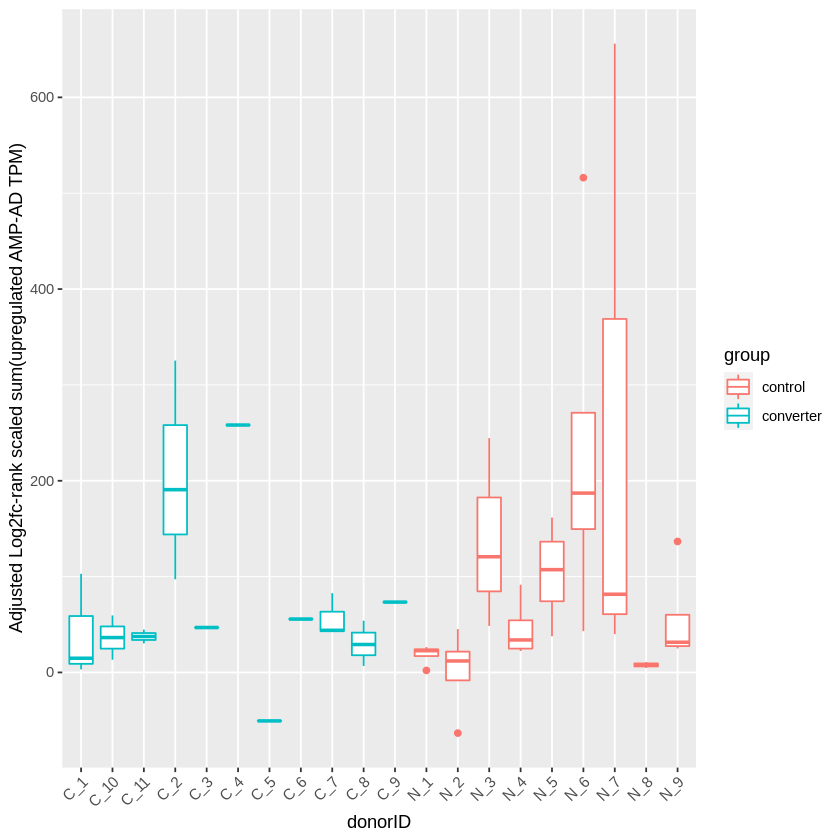

In [1094]:
ampgenes_ordered_scaled_sums_meta_convertPreDiag_plot %>%
ggplot(aes(x=donorID.x, y=scaled_up_sum + PHGDH*PHGDH_beta + MRAS*MRAS_beta, color=group)) +
geom_boxplot()+
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(x='donorID', y='Adjusted Log2fc-rank scaled sum(upregulated AMP-AD TPM)')

In [1097]:
ampgenes_ordered_scaled_sums_meta_convertPreDiag_plot %>%
mutate(x = scaled_up_sum) %>%
group_by(group) %>%
count(x < 35)

group     x < 35 n 
1 control   FALSE  22
2 control    TRUE  19
3 converter FALSE  23
4 converter  TRUE   9

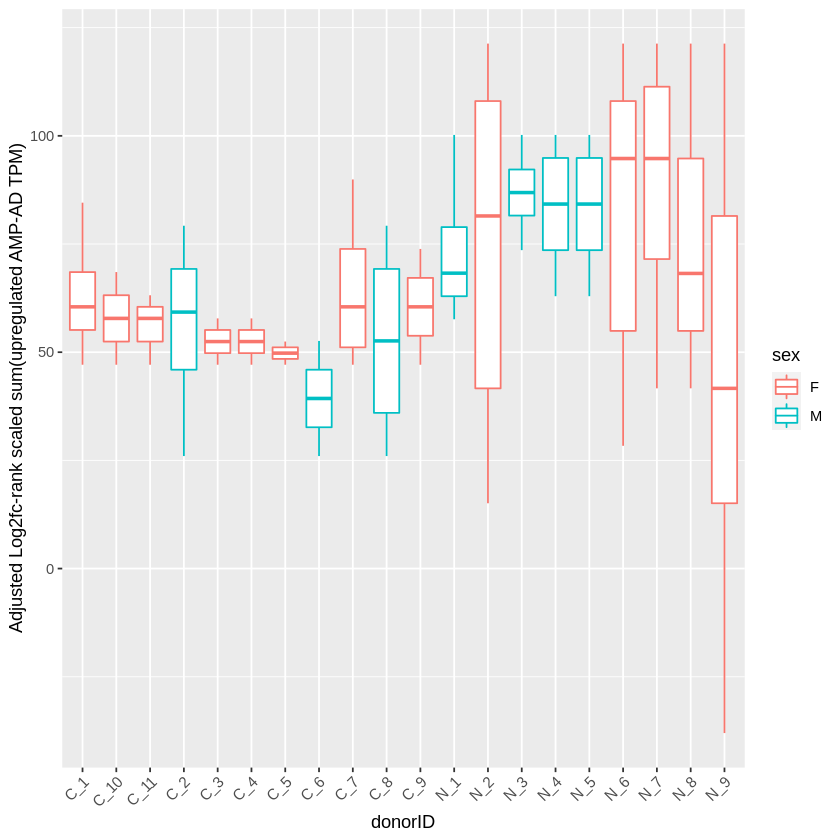

In [1027]:
ampgenes_ordered_scaled_sums_meta_convertPreDiag_plot %>%
ggplot(aes(x=donorID.x, y=model3, color=sex)) +
geom_boxplot()+
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(x='donorID', y='Adjusted Log2fc-rank scaled sum(upregulated AMP-AD TPM)')

In [924]:
ampgenes_ordered_scaled_sums_meta_convertPreDiag_plot$MRAS_beta

[1]          NA  -0.1801341   0.6824866   0.2711288   0.6101185          NA
 [7]  -1.4987305  -4.0188221  -2.1100347  -0.8504012          NA  -3.9607119
[13]   3.3090915  -0.3439071          NA  -4.6401523   0.7634720   2.3821441
[19]   0.1149532          NA   7.5566017   5.1709754   0.4655151   0.7269312
[25]          NA  11.9720928   7.6326009   1.6914904  -0.1449531  -1.4979365
[31]          NA  22.9339844   2.5041256          NA  -2.8829860  -1.5768061
[37]          NA   4.0070979   0.4101090  -0.4117264  -0.5598827          NA
[43]  -0.1759954   0.8504583   4.1432360          NA  -2.6914623  -0.3623643
[49]  -1.0554104          NA  -1.8299852          NA   6.2184744          NA
[55]  -9.5137289          NA   2.0232063          NA   1.8887953   1.3049202
[61]   0.3431038 -10.0516650  -2.1389240   0.7514928          NA          NA
[67]   0.6035230          NA  -0.6909087  -6.1205436          NA  -6.8371260
[73]  -4.9491854

In [1025]:
names(ampgenes_ordered_scaled_sums_meta_convertPreDiag_plot)

[1] "donorID.x"      "group"          "age_death"      "sex"           
 [5] "braak_stage"    "Year_diagnosis" "APOE_status"    "sampleID"      
 [9] "year"           "yr_since_diag"  "firstYear"      "PADI2"         
[13] "PHGDH"          "PDE4DIP"        "PBXIP1"         "KCNJ10"        
[17] "CSRP1"          "ITPKB"          "RHOQ"           "CRTAP"         
[21] "PLXNB1"         "FAM107A"        "MRAS"           "QDPR"          
[25] "MYO10"          "ERBB2IP"        "SASH1"          "QKI"           
[29] "GNA12"          "TNS3"           "CALD1"          "MID1IP1"       
[33] "LAMP2"          "NACC2"          "AHNAK"          "DOCK1"         
[37] "GPRC5B"         "GFAP"           "SLC25A18"       "up_sum"        
[41] "down_sum"       "amp_diff"       "age_proxy"      "donorID.y"     
[45] "n_samples"      "years_spanned"  "AHNAK_beta"     "CALD1_beta"    
[49] "CSRP1_beta"     "DOCK1_beta"     "ERBB2IP_beta"   "FAM107A_beta"  
[53] "ITPKB_beta"     "KCNJ10_beta"    "LAMP2_beta"     "MRAS_beta"     
[57] "MYO10_beta"     "NACC2_beta"     "PADI2_beta"     "PDE4DIP_beta"  
[61] "PHGDH_beta"     "PLXNB1_beta"    "QKI_beta"       "RHOQ_beta"     
[65] "SASH1_beta"     "TNS3_beta"      "scaled_up_sum"  "model3"        
[69] "model3_y"

Warning message:
"Removed 20 rows containing non-finite values (stat_boxplot)."


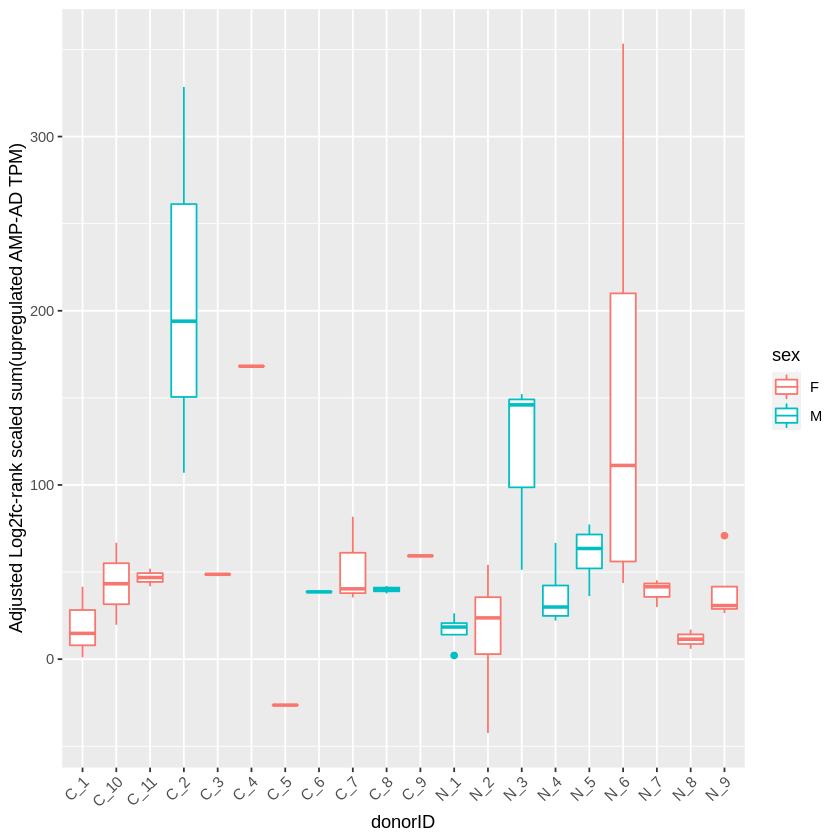

In [1028]:
ampgenes_ordered_scaled_sums_meta_convertPreDiag_plot %>%
ggplot(aes(x=donorID.x, y=scaled_up_sum + PHGDH*(PHGDH_beta), color=sex)) +
geom_boxplot()+
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(x='donorID', y='Adjusted Log2fc-rank scaled sum(upregulated AMP-AD TPM)')

In [904]:
ampgenes_ordered_scaled_sums_meta_convertPreDiag$sex %>% unique()

[1] "M" "F"

In [925]:
up_sum_scaled_top2_onlyPreDiag_4.mod <- lmer(scaled_up_sum + PHGDH*PHGDH_beta + DOCK1*DOCK1_beta ~ 1 + 
                                             age_proxy + group + sex + # fixed effects
                  age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)

In [926]:
summary(up_sum_scaled_top2_onlyPreDiag_4.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scaled_up_sum + PHGDH * PHGDH_beta + DOCK1 * DOCK1_beta ~ 1 +  
    age_proxy + group + sex + age_proxy:group + age_proxy:sex +  
    (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 675.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8163 -0.3987 -0.1125  0.2261  3.7676 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept)  3051     55.24  
 Residual              60738    246.45  
Number of obs: 53, groups:  donorID.x, 20

Fixed effects:
                         Estimate Std. Error       df t value Pr(>|t|)   
(Intercept)               591.299   1485.151   46.994   0.398  0.69233   
age_proxy                  -6.969     19.916   46.998  -0.350  0.72797   
groupconverter            772.490   2587.597   45.663   0.299  0.76665   
sexM                     6758.397   2336.602   46.737   2.892  

In [897]:
summary(up_sum_scaled_top2_onlyPreDiag_3.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
scaled_up_sum + PHGDH * PHGDH_beta + MRAS * MRAS_beta ~ 1 + age_proxy +  
    group + sex + age_proxy:group + age_proxy:sex + (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 603

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9642 -0.4233 -0.1585  0.0873  3.7871 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept)  3278     57.25  
 Residual              11135    105.52  
Number of obs: 53, groups:  donorID.x, 20

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)               2185.383    672.067    43.569   3.252  0.00222 **
age_proxy                  -28.015      9.016    43.588  -3.107  0.00332 **
groupconverter           -2499.159   1156.704    42.442  -2.161  0.03642 * 
sexM                     -1115.196   1068.842    45.292  -1.043 

In [1040]:
summary(up_sum_scaled_top2_onlyPreDiag_3.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
scaled_up_sum + PHGDH * PHGDH_beta + MRAS * MRAS_beta ~ 1 + age_proxy +  
    group + sex + age_proxy:group + age_proxy:sex + (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 603

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9642 -0.4233 -0.1585  0.0873  3.7871 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept)  3278     57.25  
 Residual              11135    105.52  
Number of obs: 53, groups:  donorID.x, 20

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)               2185.383    672.067    43.569   3.252  0.00222 **
age_proxy                  -28.015      9.016    43.588  -3.107  0.00332 **
groupconverter           -2499.159   1156.704    42.442  -2.161  0.03642 * 
sexM                     -1115.196   1068.842    45.292  -1.043 

In [948]:
up_sum_scaled_top2_onlyPreDiag_5.mod <- lmer(scaled_up_sum + PHGDH_beta*( PHGDH+ DOCK1) ~ 1 + 
                                             age_proxy + group + sex + # fixed effects
                  age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)

In [949]:
summary(up_sum_scaled_top2_onlyPreDiag_5.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scaled_up_sum + PHGDH_beta * (PHGDH + DOCK1) ~ 1 + age_proxy +  
    group + sex + age_proxy:group + age_proxy:sex + (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 606.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5737 -0.2360 -0.0348  0.1683  3.9437 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept) 10707    103.48  
 Residual               9159     95.71  
Number of obs: 53, groups:  donorID.x, 20

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)  
(Intercept)                720.117    641.937    34.650   1.122   0.2697  
age_proxy                   -9.155      8.606    34.394  -1.064   0.2949  
groupconverter           -2044.164   1105.593    35.715  -1.849   0.0728 .
sexM                      -261.469   1035.395    36.400  -0.253   0.8021  
a

In [960]:
up_sum_scaled_top2_onlyPreDiag_6.mod <- lmer(scaled_up_sum + PHGDH_beta*(PHGDH) ~ 1 + 
                                             age_proxy + group + sex + # fixed effects
                  age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)

In [961]:
summary(up_sum_scaled_top2_onlyPreDiag_6.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scaled_up_sum + PHGDH_beta * (PHGDH) ~ 1 + age_proxy + group +  
    sex + age_proxy:group + age_proxy:sex + (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 550.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5451 -0.3955 -0.0804  0.1675  3.7384 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept) 2301     47.97   
 Residual              3109     55.76   
Number of obs: 53, groups:  donorID.x, 20

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                509.341    368.306    38.862   1.383    0.175
age_proxy                   -6.267      4.940    38.749  -1.269    0.212
groupconverter           -1021.870    633.084    39.341  -1.614    0.114
sexM                      -251.498    591.349    40.723  -0.425    0.673
age_proxy:groupconv

In [946]:
tpm_meta_fixedYears_proxyAge$scaled_up_sum = ampgenes_ordered_scaled_sums_meta$up_sum

In [889]:
tpm_meta_fixedYears_proxyAge %>% select(scaled_up_sum, up_sum)

scaled_up_sum up_sum   
1      12.133940      43.82148
2       5.948448      29.94099
3      22.802324     113.87496
4      30.394458     167.47166
5      20.766055     112.11617
6      60.971223     283.35286
7      45.322513     231.28760
8      51.625333     292.48341
9      21.282785     116.04454
10     61.405229     297.03774
11     43.779623     216.73379
12     44.754457     210.40533
13     55.241564     229.42455
14     41.458777     211.74407
15      9.081410      70.02748
16     25.707143     296.06025
17     31.129203     181.49222
18     22.428325      97.66760
19     21.510620     157.55119
20     20.565438     116.59636
21     50.646561     285.53818
22     48.859187     262.08912
23     30.585056     158.96579
24     53.391891     268.45546
25     10.185317      60.11363
26     50.856476     241.20070
27     55.903225     304.54077
28     50.631109     206.58642
29     37.548791     209.49385
30     43.746137     246.65090
<U+22EE> <U+22EE>      <U+22EE> 
135    49.91075      268.78900
136    40.45296      197.83486
137    17.52744       88.44262
138    51.56932      217.03972
139    29.55774      143.99724
140    45.54311      199.66729
141    22.96145      118.62588
142    40.90482      242.73533
143    28.85874      151.50470
144    50.35431      210.55624
145    48.69115      215.83076
146    52.24064      263.66379
147    73.99547      257.35406
148    47.85714      230.27480
149    67.78199      383.07607
150    32.00611      171.38146
151    44.19479      232.81780
152    52.50030      255.58736
153    37.67304      213.92669
154    39.34488      208.45847
155    45.07378      235.45407
156    48.06522      265.15699
157    54.41888      302.33316
158    21.76051      126.14401
159    29.55873      168.69503
160    58.04512      259.83003
161    53.18717      246.06171
162    55.20769      347.64507
163    44.55275      224.32806
164    54.43337      352.13981

In [883]:
tpm_meta_fixedYears_proxyAge <- left_join(tpm_meta_fixedYears_proxyAge, up_betas_df_wide, by='sampleID') 

head(tpm_meta_fixedYears_proxyAge)

donorID.x group   age_death sex braak_stage Year_diagnosis
1 N_1       control 86        M   1           NA            
2 N_1       control 86        M   1           NA            
3 N_1       control 86        M   1           NA            
4 N_1       control 86        M   1           NA            
5 N_1       control 86        M   1           NA            
6 N_2       control 93        F   1           NA            
  APOE_status         sampleID year yr_since_diag <U+22EF>   MYO10_beta
1 \316\2653/\316\2654 N_1_01_1 2001 0             <U+22EF>         NA
2 \316\2653/\316\2654 N_1_05_1 2005 4             <U+22EF> -0.3331888
3 \316\2653/\316\2654 N_1_07_1 2007 6             <U+22EF>  0.1994170
4 \316\2653/\316\2654 N_1_08_1 2008 7             <U+22EF>  1.0220131
5 \316\2653/\316\2654 N_1_09_1 2009 8             <U+22EF>  0.7277786
6 \316\2653/\316\2653 N_2_00_1 2000 0             <U+22EF>         NA
  NACC2_beta  PADI2_beta PDE4DIP_beta PHGDH_beta PLXNB1_beta QKI_beta  
1          NA         NA         NA           NA        NA           NA
2 -1.22631663 -1.4232481 0.02959721   -2.0510285 0.3902498   -0.7619542
3 -0.17314794 -0.5773136 0.05546390   -1.1302675 0.4726589    0.1421269
4 -0.01497426  0.2596332 0.53143691   -0.6630481 0.2297864    0.5358148
5  0.24880612  0.1820565 0.41312085   -0.6837510 0.2080130    0.4363772
6          NA         NA         NA           NA        NA           NA
  RHOQ_beta SASH1_beta TNS3_beta 
1        NA        NA          NA
2 1.4391846 0.3904901  -0.1916110
3 1.1325455 1.1316462   0.3406708
4 0.6991485 2.0067337   1.6484749
5 0.7088279 1.6609152   1.1379336
6        NA        NA          NA

In [994]:
tpm_meta_fixedYears_proxyAge <- tpm_meta_fixedYears_proxyAge %>%
mutate(beta_sum = select(tpm_meta_fixedYears_proxyAge, ends_with('beta')) %>% rowSums())

In [878]:
ranklog.ampgenes_geneOrder

[1] "PHGDH"    "MRAS"     "DOCK1"    "KCNJ10"   "ITPKB"    "PDE4DIP" 
 [7] "MYO10"    "AHNAK"    "PLXNB1"   "FAM107A"  "ERBB2IP"  "LAMP2"   
[13] "TNS3"     "CALD1"    "SASH1"    "QKI"      "CSRP1"    "RHOQ"    
[19] "NACC2"    "PADI2"    "GPRC5B"   "QDPR"     "GNA12"    "CRTAP"   
[25] "GFAP"     "SLC25A18" "MID1IP1"  "PBXIP1"

In [893]:
head(tpm_meta_fixedYears_proxyAge)

donorID.x group   age_death sex braak_stage Year_diagnosis
1 N_1       control 86        M   1           NA            
2 N_1       control 86        M   1           NA            
3 N_1       control 86        M   1           NA            
4 N_1       control 86        M   1           NA            
5 N_1       control 86        M   1           NA            
6 N_2       control 93        F   1           NA            
  APOE_status         sampleID year yr_since_diag <U+22EF>   NACC2_beta 
1 \316\2653/\316\2654 N_1_01_1 2001 0             <U+22EF>          NA
2 \316\2653/\316\2654 N_1_05_1 2005 4             <U+22EF> -1.22631663
3 \316\2653/\316\2654 N_1_07_1 2007 6             <U+22EF> -0.17314794
4 \316\2653/\316\2654 N_1_08_1 2008 7             <U+22EF> -0.01497426
5 \316\2653/\316\2654 N_1_09_1 2009 8             <U+22EF>  0.24880612
6 \316\2653/\316\2653 N_2_00_1 2000 0             <U+22EF>          NA
  PADI2_beta PDE4DIP_beta PHGDH_beta PLXNB1_beta QKI_beta   RHOQ_beta
1         NA         NA           NA        NA           NA        NA
2 -1.4232481 0.02959721   -2.0510285 0.3902498   -0.7619542 1.4391846
3 -0.5773136 0.05546390   -1.1302675 0.4726589    0.1421269 1.1325455
4  0.2596332 0.53143691   -0.6630481 0.2297864    0.5358148 0.6991485
5  0.1820565 0.41312085   -0.6837510 0.2080130    0.4363772 0.7088279
6         NA         NA           NA        NA           NA        NA
  SASH1_beta TNS3_beta  scaled_up_sum
1        NA          NA 12.133940    
2 0.3904901  -0.1916110  5.948448    
3 1.1316462   0.3406708 22.802324    
4 2.0067337   1.6484749 30.394458    
5 1.6609152   1.1379336 20.766055    
6        NA          NA 60.971223

In [1006]:
names(ampgenes_ordered_scaled_sums_meta)

[1] "donorID.x"       "group"           "age_death"       "sex"            
  [5] "braak_stage"     "Year_diagnosis"  "APOE_status"     "sampleID"       
  [9] "year"            "yr_since_diag"   "PHGDH"           "MRAS"           
 [13] "DOCK1"           "KCNJ10"          "ITPKB"           "PDE4DIP"        
 [17] "MYO10"           "AHNAK"           "PLXNB1"          "FAM107A"        
 [21] "ERBB2IP"         "LAMP2"           "TNS3"            "CALD1"          
 [25] "SASH1"           "QKI"             "CSRP1"           "RHOQ"           
 [29] "NACC2"           "PADI2"           "GPRC5B"          "QDPR"           
 [33] "GNA12"           "CRTAP"           "GFAP"            "SLC25A18"       
 [37] "MID1IP1"         "PBXIP1"          "up_sum"          "down_sum"       
 [41] "amp_diff"        "age_proxy"       "up_sum_scaled_2" "donorID.y"      
 [45] "n_samples.x"     "years_spanned.x" "AHNAK_beta.x"    "CALD1_beta.x"   
 [49] "CSRP1_beta.x"    "DOCK1_beta.x"    "ERBB2IP_beta.x"  "FAM107A_beta.x" 
 [53] "ITPKB_beta.x"    "KCNJ10_beta.x"   "LAMP2_beta.x"    "MRAS_beta.x"    
 [57] "MYO10_beta.x"    "NACC2_beta.x"    "PADI2_beta.x"    "PDE4DIP_beta.x" 
 [61] "PHGDH_beta.x"    "PLXNB1_beta.x"   "QKI_beta.x"      "RHOQ_beta.x"    
 [65] "SASH1_beta.x"    "TNS3_beta.x"     "donorID.x.x"     "n_samples.y"    
 [69] "years_spanned.y" "AHNAK_beta.y"    "CALD1_beta.y"    "CSRP1_beta.y"   
 [73] "DOCK1_beta.y"    "ERBB2IP_beta.y"  "FAM107A_beta.y"  "ITPKB_beta.y"   
 [77] "KCNJ10_beta.y"   "LAMP2_beta.y"    "MRAS_beta.y"     "MYO10_beta.y"   
 [81] "NACC2_beta.y"    "PADI2_beta.y"    "PDE4DIP_beta.y"  "PHGDH_beta.y"   
 [85] "PLXNB1_beta.y"   "QKI_beta.y"      "RHOQ_beta.y"     "SASH1_beta.y"   
 [89] "TNS3_beta.y"     "donorID.y.y"     "n_samples"       "years_spanned"  
 [93] "AHNAK_beta"      "CALD1_beta"      "CSRP1_beta"      "DOCK1_beta"     
 [97] "ERBB2IP_beta"    "FAM107A_beta"    "ITPKB_beta"      "KCNJ10_beta"    
[101] "LAMP2_beta"      "MRAS_beta"       "MYO10_beta"      "NACC2_beta"     
[105] "PADI2_beta"      "PDE4DIP_beta"    "PHGDH_beta"      "PLXNB1_beta"    
[109] "QKI_beta"        "RHOQ_beta"       "SASH1_beta"      "TNS3_beta"

In [1019]:
beta_sum_top2_onlyPreDiag.mod <- lmer(scaled_up_sum*beta_sum  ~ 1 + 
                                             age_proxy + group + sex + # fixed effects
                  age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=tpm_meta_fixedYears_proxyAge_prediag)



In [1071]:
beta_sum_top2_onlyPreDiag_8.mod <- lmer((PHGDH_beta+MRAS_beta)  ~ 1 + 
                                             age_proxy + group + sex + # fixed effects
                  age_proxy:group + age_proxy:sex + # interaction terms
                  (1|donorID.x), # control for different individuals
                 data=ampgenes_ordered_scaled_sums_meta_convertPreDiag)



In [1072]:
summary(beta_sum_top2_onlyPreDiag_8.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
(PHGDH_beta + MRAS_beta) ~ 1 + age_proxy + group + sex + age_proxy:group +  
    age_proxy:sex + (1 | donorID.x)
   Data: ampgenes_ordered_scaled_sums_meta_convertPreDiag

REML criterion at convergence: 331.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.89009 -0.46532 -0.04409  0.40371  3.01021 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept) 22.51    4.744   
 Residual              29.02    5.387   
Number of obs: 53, groups:  donorID.x, 20

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)  
(Intercept)                95.0019    35.6414   35.4370   2.665   0.0115 *
age_proxy                  -1.2551     0.4780   35.2823  -2.626   0.0127 *
groupconverter           -148.0097    61.2725   36.1281  -2.416   0.0209 *
sexM                      -68.9352    57.2536   37.8053  -1.204   0.2361  
age_proxy:

In [1041]:
names(ampgenes_ordered_scaled_sums_meta_convertPreDiag)

[1] "donorID.x"      "group"          "age_death"      "sex"           
 [5] "braak_stage"    "Year_diagnosis" "APOE_status"    "sampleID"      
 [9] "year"           "yr_since_diag"  "firstYear"      "PADI2"         
[13] "PHGDH"          "PDE4DIP"        "PBXIP1"         "KCNJ10"        
[17] "CSRP1"          "ITPKB"          "RHOQ"           "CRTAP"         
[21] "PLXNB1"         "FAM107A"        "MRAS"           "QDPR"          
[25] "MYO10"          "ERBB2IP"        "SASH1"          "QKI"           
[29] "GNA12"          "TNS3"           "CALD1"          "MID1IP1"       
[33] "LAMP2"          "NACC2"          "AHNAK"          "DOCK1"         
[37] "GPRC5B"         "GFAP"           "SLC25A18"       "up_sum"        
[41] "down_sum"       "amp_diff"       "age_proxy"      "donorID.y"     
[45] "n_samples"      "years_spanned"  "AHNAK_beta"     "CALD1_beta"    
[49] "CSRP1_beta"     "DOCK1_beta"     "ERBB2IP_beta"   "FAM107A_beta"  
[53] "ITPKB_beta"     "KCNJ10_beta"    "LAMP2_beta"     "MRAS_beta"     
[57] "MYO10_beta"     "NACC2_beta"     "PADI2_beta"     "PDE4DIP_beta"  
[61] "PHGDH_beta"     "PLXNB1_beta"    "QKI_beta"       "RHOQ_beta"     
[65] "SASH1_beta"     "TNS3_beta"      "scaled_up_sum"

In [1062]:
ranklog.ampgenes_geneOrder

[1] "PHGDH"    "MRAS"     "DOCK1"    "KCNJ10"   "ITPKB"    "PDE4DIP" 
 [7] "MYO10"    "AHNAK"    "PLXNB1"   "FAM107A"  "ERBB2IP"  "LAMP2"   
[13] "TNS3"     "CALD1"    "SASH1"    "QKI"      "CSRP1"    "RHOQ"    
[19] "NACC2"    "PADI2"    "GPRC5B"   "QDPR"     "GNA12"    "CRTAP"   
[25] "GFAP"     "SLC25A18" "MID1IP1"  "PBXIP1"

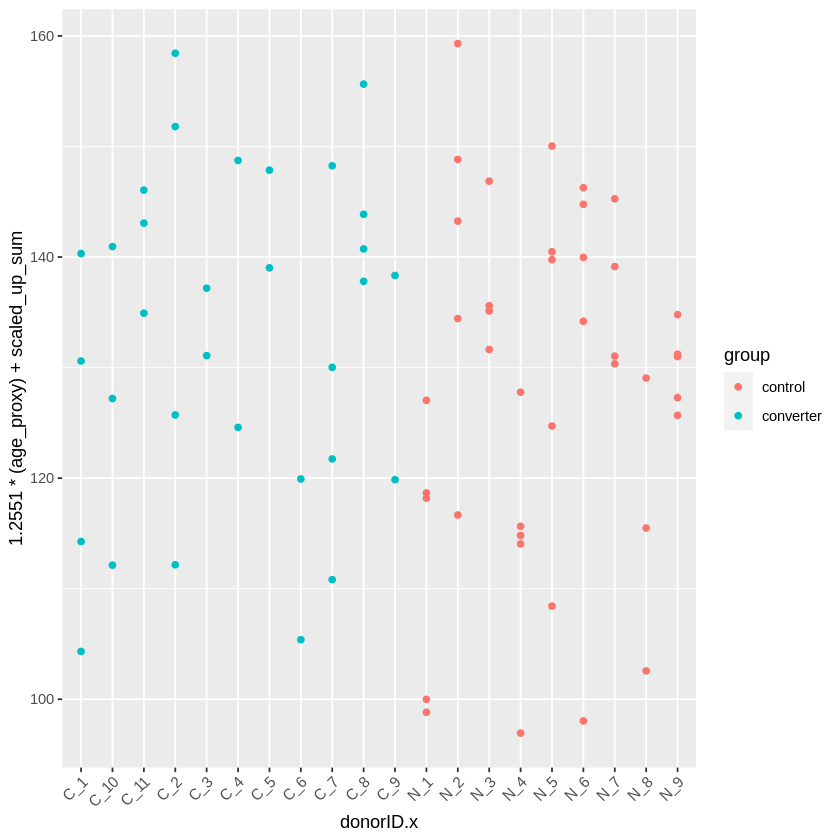

In [1093]:
ggplot(ampgenes_ordered_scaled_sums_meta_convertPreDiag, 
       aes(x=donorID.x, y=1.2551*(age_proxy)+scaled_up_sum, color=group)) +
geom_point() +
# geom_boxplot() +
# geom_hline(yintercept=2) +
theme(axis.text.x = element_text(angle = 45, hjust=1))

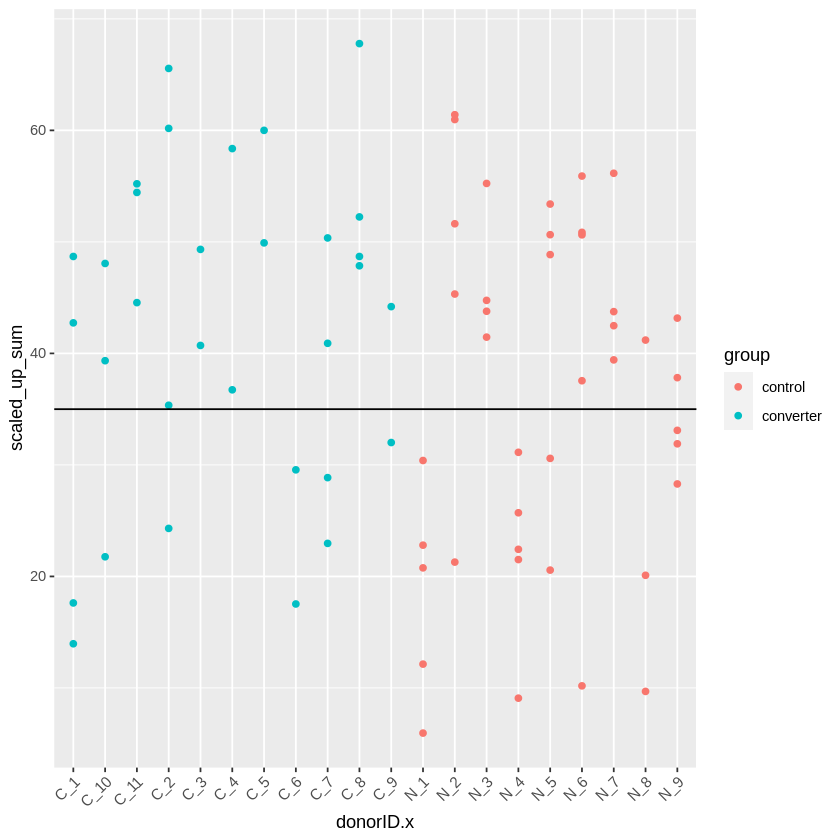

In [1052]:
ggplot(ampgenes_ordered_scaled_sums_meta_convertPreDiag, 
       aes(x=donorID.x, y=scaled_up_sum, color=group)) +
geom_point() +
# geom_boxplot() +
geom_hline(yintercept=35) +
theme(axis.text.x = element_text(angle = 45, hjust=1))

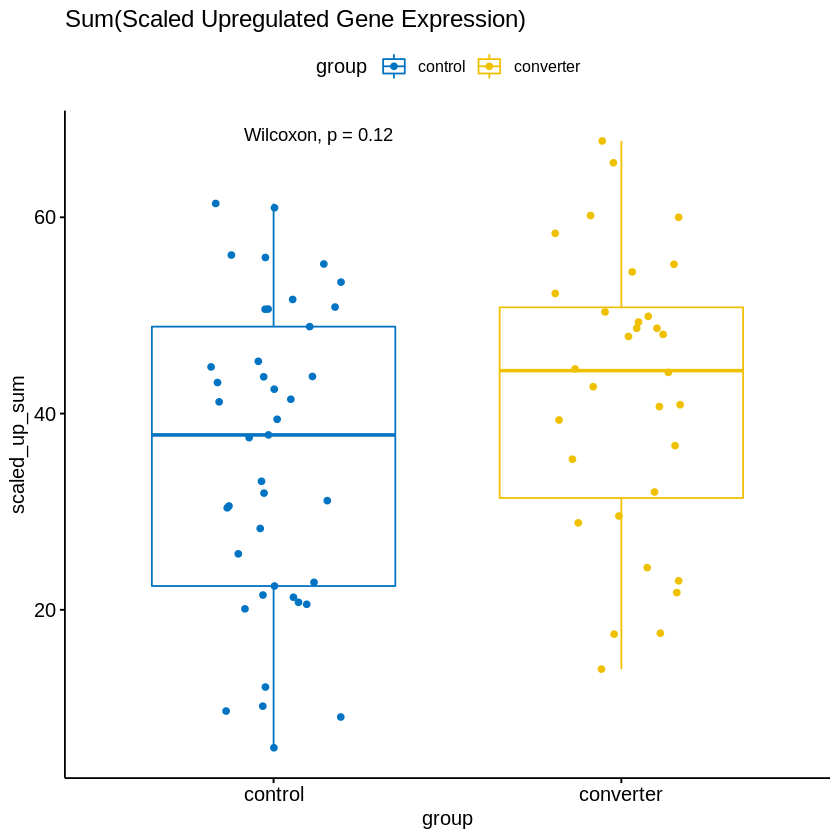

In [1038]:
# ggplot(tpm_meta_fixedYears_proxyAge_prediag, aes(x=group, y=scaled_up_sum, color=group)) +
# geom_point() +
# geom_boxplot() +
# # geom_hline(yintercept=0) +
# theme(axis.text.x = element_text(angle = 45, hjust=1))

p <- tpm_meta_fixedYears_proxyAge_prediag %>% 
ggboxplot(x = 'group', y = 'scaled_up_sum',
          color = "group", palette = "jco",
          add = "jitter") +
stat_compare_means()

#  Add p-value
p +
ggtitle('Sum(Scaled Upregulated Gene Expression)') 

Warning message:
"Removed 20 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 20 rows containing missing values (geom_point)."


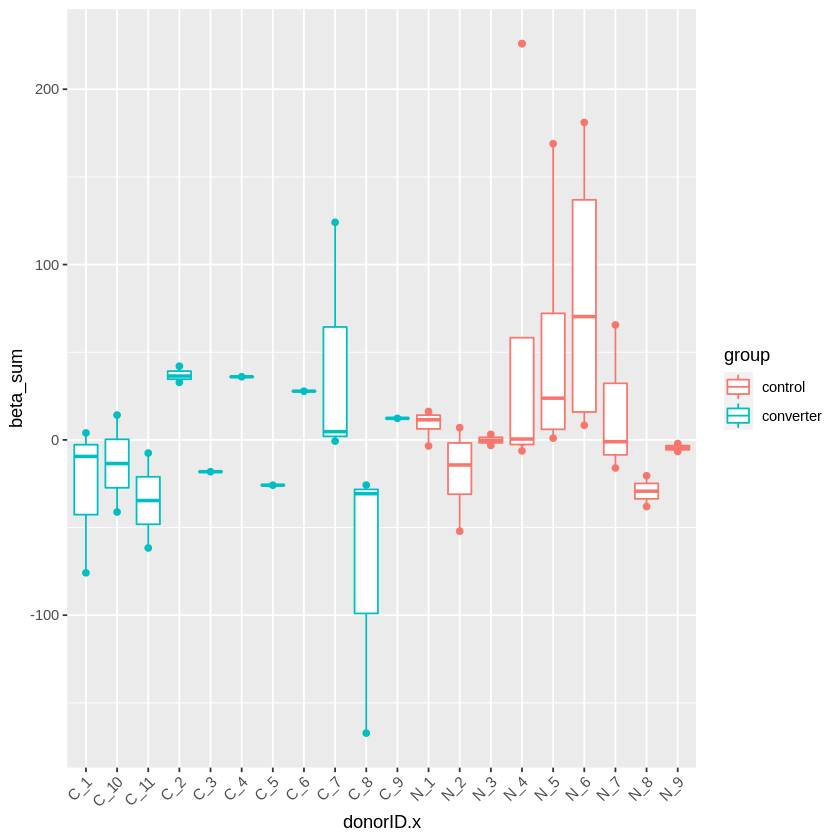

In [1036]:
ggplot(tpm_meta_fixedYears_proxyAge_prediag, aes(x=donorID.x, y=beta_sum, color=group)) +
geom_point() +
geom_boxplot() +
# geom_hline(yintercept=0) +
theme(axis.text.x = element_text(angle = 45, hjust=1))

Warning message:
"Removed 20 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 20 rows containing non-finite values (stat_compare_means)."
Warning message:
"Removed 20 rows containing missing values (geom_point)."


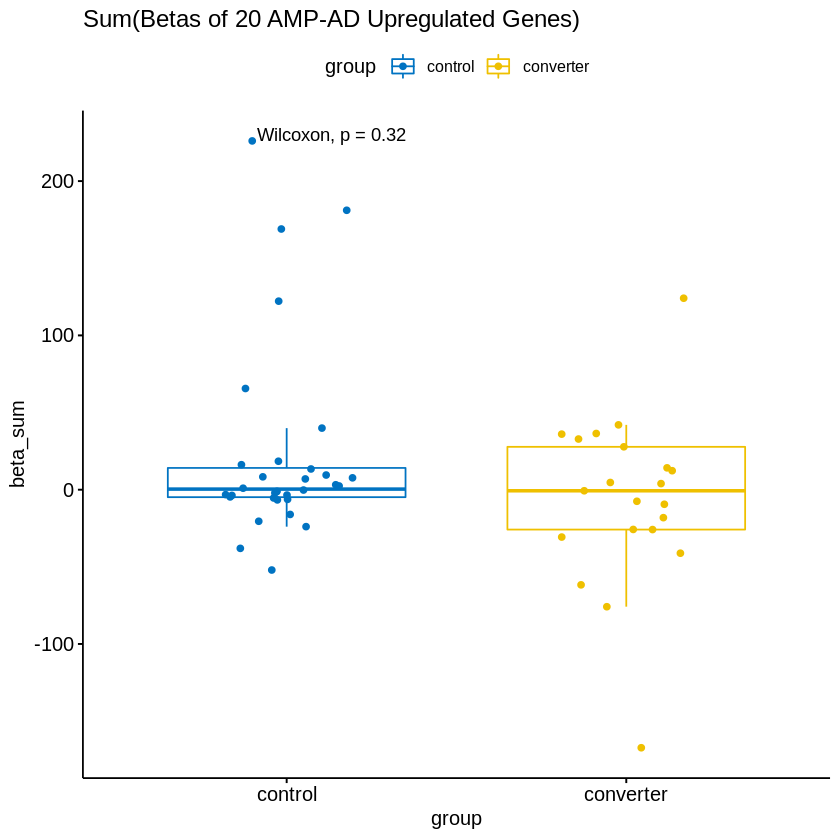

In [1039]:
p <- tpm_meta_fixedYears_proxyAge_prediag %>% 
ggboxplot(x = 'group', y = 'beta_sum',
          color = "group", palette = "jco",
          add = "jitter") +
stat_compare_means()

#  Add p-value
p +
ggtitle('Sum(Betas of 20 AMP-AD Upregulated Genes)') 

In [1020]:
summary(beta_sum_top2_onlyPreDiag.mod)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
scaled_up_sum * beta_sum ~ 1 + age_proxy + group + sex + age_proxy:group +  
    age_proxy:sex + (1 | donorID.x)
   Data: tpm_meta_fixedYears_proxyAge_prediag

REML criterion at convergence: 889.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.72448 -0.39723 -0.04303  0.30758  2.26300 

Random effects:
 Groups    Name        Variance Std.Dev.
 donorID.x (Intercept) 1483866  1218    
 Residual              4904957  2215    
Number of obs: 53, groups:  donorID.x, 20

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)               38436.290  14120.968     43.837   2.722  0.00928 **
age_proxy                  -500.533    189.430     43.852  -2.642  0.01137 * 
groupconverter           -48124.392  24300.435     42.863  -1.980  0.05410 . 
sexM                       -472.019  22463.554     45.398  -0.021  0.98333   
age_pro

In [1008]:
tpm_meta_fixedYears_proxyAge$scaled_sum2 <- ampgenes_ordered_scaled_sums_meta$up_sum_scaled_2

In [1009]:
tpm_meta_fixedYears_proxyAge_prediag <- tpm_meta_fixedYears_proxyAge %>%
filter(group=='control' | yr_since_diag < 0) 

dim(tpm_meta_fixedYears_proxyAge_prediag)

[1] 73 69

In [1010]:
names(tpm_meta_fixedYears_proxyAge_prediag)

[1] "donorID.x"      "group"          "age_death"      "sex"           
 [5] "braak_stage"    "Year_diagnosis" "APOE_status"    "sampleID"      
 [9] "year"           "yr_since_diag"  "firstYear"      "PADI2"         
[13] "PHGDH"          "PDE4DIP"        "PBXIP1"         "KCNJ10"        
[17] "CSRP1"          "ITPKB"          "RHOQ"           "CRTAP"         
[21] "PLXNB1"         "FAM107A"        "MRAS"           "QDPR"          
[25] "MYO10"          "ERBB2IP"        "SASH1"          "QKI"           
[29] "GNA12"          "TNS3"           "CALD1"          "MID1IP1"       
[33] "LAMP2"          "NACC2"          "AHNAK"          "DOCK1"         
[37] "GPRC5B"         "GFAP"           "SLC25A18"       "up_sum"        
[41] "down_sum"       "amp_diff"       "age_proxy"      "donorID.y"     
[45] "n_samples"      "years_spanned"  "AHNAK_beta"     "CALD1_beta"    
[49] "CSRP1_beta"     "DOCK1_beta"     "ERBB2IP_beta"   "FAM107A_beta"  
[53] "ITPKB_beta"     "KCNJ10_beta"    "LAMP2_beta"     "MRAS_beta"     
[57] "MYO10_beta"     "NACC2_beta"     "PADI2_beta"     "PDE4DIP_beta"  
[61] "PHGDH_beta"     "PLXNB1_beta"    "QKI_beta"       "RHOQ_beta"     
[65] "SASH1_beta"     "TNS3_beta"      "scaled_up_sum"  "beta_sum"      
[69] "scaled_sum2"

In [203]:
PHGDH.mod_2 <- lmer(log2(PHGDH+1) ~ 1 + group + sex + # fixed effects
                  (1|donorID),
                 data=tpm_t_ampgenes_sums_meta)

In [199]:
library(lmerTest)


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step




In [204]:
summary(PHGDH.mod_2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log2(PHGDH + 1) ~ 1 + group + sex + (1 | donorID)
   Data: tpm_t_ampgenes_sums_meta

REML criterion at convergence: 540

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7309 -0.5292  0.1629  0.6864  2.1464 

Random effects:
 Groups   Name        Variance Std.Dev.
 donorID  (Intercept) 0.1048   0.3237  
 Residual             1.4689   1.2120  
Number of obs: 164, groups:  donorID, 35

Fixed effects:
                Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     3.543361   0.202703 26.906258  17.481 3.24e-16 ***
groupcontrol   -0.600849   0.273807 30.143673  -2.194    0.036 *  
groupconverter  0.009431   0.264488 29.668770   0.036    0.972    
sexM           -0.104329   0.226342 29.612883  -0.461    0.648    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) grpcnt grpcnv
groupcontrl -0.518     

In [1005]:
names(ampgenes_ordered_scaled_sums_meta)

[1] "donorID.x"       "group"           "age_death"       "sex"            
  [5] "braak_stage"     "Year_diagnosis"  "APOE_status"     "sampleID"       
  [9] "year"            "yr_since_diag"   "PHGDH"           "MRAS"           
 [13] "DOCK1"           "KCNJ10"          "ITPKB"           "PDE4DIP"        
 [17] "MYO10"           "AHNAK"           "PLXNB1"          "FAM107A"        
 [21] "ERBB2IP"         "LAMP2"           "TNS3"            "CALD1"          
 [25] "SASH1"           "QKI"             "CSRP1"           "RHOQ"           
 [29] "NACC2"           "PADI2"           "GPRC5B"          "QDPR"           
 [33] "GNA12"           "CRTAP"           "GFAP"            "SLC25A18"       
 [37] "MID1IP1"         "PBXIP1"          "up_sum"          "down_sum"       
 [41] "amp_diff"        "age_proxy"       "up_sum_scaled_2" "donorID.y"      
 [45] "n_samples.x"     "years_spanned.x" "AHNAK_beta.x"    "CALD1_beta.x"   
 [49] "CSRP1_beta.x"    "DOCK1_beta.x"    "ERBB2IP_beta.x"  "FAM107A_beta.x" 
 [53] "ITPKB_beta.x"    "KCNJ10_beta.x"   "LAMP2_beta.x"    "MRAS_beta.x"    
 [57] "MYO10_beta.x"    "NACC2_beta.x"    "PADI2_beta.x"    "PDE4DIP_beta.x" 
 [61] "PHGDH_beta.x"    "PLXNB1_beta.x"   "QKI_beta.x"      "RHOQ_beta.x"    
 [65] "SASH1_beta.x"    "TNS3_beta.x"     "donorID.x.x"     "n_samples.y"    
 [69] "years_spanned.y" "AHNAK_beta.y"    "CALD1_beta.y"    "CSRP1_beta.y"   
 [73] "DOCK1_beta.y"    "ERBB2IP_beta.y"  "FAM107A_beta.y"  "ITPKB_beta.y"   
 [77] "KCNJ10_beta.y"   "LAMP2_beta.y"    "MRAS_beta.y"     "MYO10_beta.y"   
 [81] "NACC2_beta.y"    "PADI2_beta.y"    "PDE4DIP_beta.y"  "PHGDH_beta.y"   
 [85] "PLXNB1_beta.y"   "QKI_beta.y"      "RHOQ_beta.y"     "SASH1_beta.y"   
 [89] "TNS3_beta.y"     "donorID.y.y"     "n_samples"       "years_spanned"  
 [93] "AHNAK_beta"      "CALD1_beta"      "CSRP1_beta"      "DOCK1_beta"     
 [97] "ERBB2IP_beta"    "FAM107A_beta"    "ITPKB_beta"      "KCNJ10_beta"    
[101] "LAMP2_beta"      "MRAS_beta"       "MYO10_beta"      "NACC2_beta"     
[105] "PADI2_beta"      "PDE4DIP_beta"    "PHGDH_beta"      "PLXNB1_beta"    
[109] "QKI_beta"        "RHOQ_beta"       "SASH1_beta"      "TNS3_beta"

# Model of just AD vs control, using all AMP-AD genes, scaled

In [309]:
ampgenes_ordered_scaled_sums_meta_AD_control <- ampgenes_ordered_scaled_sums_meta %>%
filter(group != 'converter')

In [315]:
head(ampgenes_ordered_scaled_sums_meta_AD_control)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   QDPR        GNA12       CRTAP     
1 N_1_01_1 2001 NA            <U+22EF> -0.02833764 -0.02564866 -0.7502665
2 N_1_05_1 2005 NA            <U+22EF> -0.31478192 -0.05698242  0.0000000
3 N_1_07_1 2007 NA            <U+22EF> -0.33156826 -0.12861669 -1.0189438
4 N_1_08_1 2008 NA            <U+22EF> -0.90950216 -2.09541587 -1.2997704
5 N_1_09_1 2009 NA            <U+22EF> -0.37860240 -1.57631258 -1.0650360
6 N_2_00_1 2000 NA            <U+22EF> -0.89069040 -1.70718858 -2.8610390
  GFAP       SLC25A18   MID1IP1    PBXIP1     up_sum    down_sum   amp_diff 
1 -0.1751543 -0.1017979  0.0000000 -0.8760529 12.133940  -2.001535 14.135475
2 -0.0389132 -0.1130797  0.0000000 -1.1893966  5.948448  -1.715886  7.664335
3 -0.8197665 -2.0418846 -0.1467242 -1.7897478 22.802324  -6.314257 29.116581
4 -1.0221115 -2.5246723 -1.7928172  0.0000000 30.394458  -9.780657 40.175114
5 -2.2465279 -4.4882014  0.0000000 -2.8610818 20.766055 -12.694637 33.460692
6 -5.3758007 -3.1055379 -2.5967178 -6.2989785 60.971223 -22.926913 83.898137

In [311]:
dim(ampgenes_ordered_scaled_sums_meta)

[1] 164  41

In [317]:
AD_control_all_1 <- lmer(log2(amp_diff+1) ~ 1 + group + sex + # fixed effects
                  (1|donorID),
                 data=ampgenes_ordered_scaled_sums_meta_AD_control)

In [318]:
summary(AD_control_all_1)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log2(amp_diff + 1) ~ 1 + group + sex + (1 | donorID)
   Data: ampgenes_ordered_scaled_sums_meta_AD_control

REML criterion at convergence: 282.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1339 -0.4704  0.2562  0.6739  1.9208 

Random effects:
 Groups   Name        Variance Std.Dev.
 donorID  (Intercept) 0.0247   0.1571  
 Residual             0.6384   0.7990  
Number of obs: 115, groups:  donorID, 24

Fixed effects:
             Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)    5.8503     0.1323 15.2091  44.210   <2e-16 ***
groupcontrol  -0.1994     0.1697 17.9328  -1.175   0.2553    
sexM          -0.3003     0.1630 17.1269  -1.843   0.0827 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) grpcnt
groupcontrl -0.496       
sexM        -0.640  0.056

In [319]:
coef(AD_control_all_1)

$donorID
      (Intercept) groupcontrol       sexM
AD_1     5.864822   -0.1994426 -0.3003178
AD_10    5.899334   -0.1994426 -0.3003178
AD_11    5.756189   -0.1994426 -0.3003178
AD_12    5.833586   -0.1994426 -0.3003178
AD_13    5.766246   -0.1994426 -0.3003178
AD_14    5.814737   -0.1994426 -0.3003178
AD_15    5.817908   -0.1994426 -0.3003178
AD_2     5.878041   -0.1994426 -0.3003178
AD_3     5.879889   -0.1994426 -0.3003178
AD_4     5.930180   -0.1994426 -0.3003178
AD_5     5.860146   -0.1994426 -0.3003178
AD_6     5.836220   -0.1994426 -0.3003178
AD_7     5.922581   -0.1994426 -0.3003178
AD_8     5.893385   -0.1994426 -0.3003178
AD_9     5.800518   -0.1994426 -0.3003178
N_1      5.709764   -0.1994426 -0.3003178
N_2      5.907523   -0.1994426 -0.3003178
N_3      5.921561   -0.1994426 -0.3003178
N_4      5.858676   -0.1994426 -0.3003178
N_5      5.907172   -0.1994426 -0.3003178
N_6      5.843427   -0.1994426 -0.3003178
N_7      5.893340   -0.1994426 -0.3003178
N_8      5.760602   -0.19

In [335]:
ampgenes_ordered_scaled_sums_meta_AD_control %>% group_by(year) %>% count()

year n 
1  2000  6
2  2001 11
3  2002  7
4  2003 13
5  2004 10
6  2005  7
7  2006 11
8  2007  8
9  2008  9
10 2009  8
11 2010  7
12 2011  6
13 2012  6
14 2013  5
15 2014  1

In [336]:
ampgenes_ordered_scaled_sums_meta_AD_control %>% group_by(yr_since_diag) %>% count()

yr_since_diag n  
1 NA            115

In [333]:
AD_control_all_2 <- lmer(log2(amp_diff+1) ~ 1 + group + sex + year + # fixed effects
                  group:year + sex:year + (1|donorID),
                 data=ampgenes_ordered_scaled_sums_meta_AD_control)

Warning message:
"Some predictor variables are on very different scales: consider rescaling"
Warning message:
"Some predictor variables are on very different scales: consider rescaling"


In [334]:
summary(AD_control_all_2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log2(amp_diff + 1) ~ 1 + group + sex + year + group:year + sex:year +  
    (1 | donorID)
   Data: ampgenes_ordered_scaled_sums_meta_AD_control

REML criterion at convergence: 294.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1436 -0.4071  0.1784  0.6401  1.7637 

Random effects:
 Groups   Name        Variance Std.Dev.
 donorID  (Intercept) 0.009318 0.09653 
 Residual             0.654026 0.80872 
Number of obs: 115, groups:  donorID, 24

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)
(Intercept)       -90.04198   61.84659  97.13704  -1.456    0.149
groupcontrol       99.56605   97.97801 108.94284   1.016    0.312
sexM               74.51575   81.53258  69.77252   0.914    0.364
year                0.04779    0.03082  97.12671   1.550    0.124
groupcontrol:year  -0.04973    0.04886 108.94402  -1.018    0.311
sexM:year          -0.03730    

In [328]:
coef(AD_control_all_2)

$group
        (Intercept) groupcontrol       sexM       year
AD        -32.95323   -0.1571521 -0.3115633 0.01933918
control   -32.95323   -0.1571521 -0.3115633 0.01933918

$sex
  (Intercept) groupcontrol       sexM       year
F   -32.95323   -0.1571521 -0.3115633 0.01933918
M   -32.95323   -0.1571521 -0.3115633 0.01933918

attr(,"class")
[1] "coef.mer"

In [341]:
AD_control_all_3 <- lmer(amp_diff ~ 1 + group + sex + # fixed effects
                   (1|donorID),
                 data=ampgenes_ordered_scaled_sums_meta_AD_control)

In [342]:
summary(AD_control_all_3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: amp_diff ~ 1 + group + sex + (1 | donorID)
   Data: ampgenes_ordered_scaled_sums_meta_AD_control

REML criterion at convergence: 1055.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.05848 -0.67256  0.05199  0.73121  2.85821 

Random effects:
 Groups   Name        Variance Std.Dev.
 donorID  (Intercept)  15.39    3.923  
 Residual             642.08   25.339  
Number of obs: 115, groups:  donorID, 24

Fixed effects:
             Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)    63.901      4.058  16.158  15.747 3.16e-11 ***
groupcontrol   -8.080      5.218  19.398  -1.548   0.1377    
sexM          -10.786      5.007  18.447  -2.154   0.0447 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) grpcnt
groupcontrl -0.494       
sexM        -0.639  0.053

In [343]:
coef(AD_control_all_3)

$donorID
      (Intercept) groupcontrol      sexM
AD_1     63.57700     -8.07973 -10.78588
AD_10    64.78433     -8.07973 -10.78588
AD_11    61.82020     -8.07973 -10.78588
AD_12    62.94977     -8.07973 -10.78588
AD_13    62.58533     -8.07973 -10.78588
AD_14    62.54986     -8.07973 -10.78588
AD_15    63.30710     -8.07973 -10.78588
AD_2     64.71906     -8.07973 -10.78588
AD_3     64.61555     -8.07973 -10.78588
AD_4     65.93026     -8.07973 -10.78588
AD_5     63.88934     -8.07973 -10.78588
AD_6     64.11930     -8.07973 -10.78588
AD_7     65.30050     -8.07973 -10.78588
AD_8     65.50302     -8.07973 -10.78588
AD_9     62.86325     -8.07973 -10.78588
N_1      61.74729     -8.07973 -10.78588
N_2      65.14131     -8.07973 -10.78588
N_3      65.07302     -8.07973 -10.78588
N_4      64.34507     -8.07973 -10.78588
N_5      64.85964     -8.07973 -10.78588
N_6      63.93088     -8.07973 -10.78588
N_7      64.48305     -8.07973 -10.78588
N_8      62.28272     -8.07973 -10.78588
N_9    

# Model using PHGDH TPM and betas

current tpm + (avg tpm x beta)

In [596]:
phgdh_betas_df <- data.frame('donorID' = character(),
                             'sampleID' = character(),
                             'n_samples' = numeric(),
                             'years_spanned' = numeric(),
                             'beta' = numeric(),
                             'beta_sd' = numeric())


count = 1

for (i in donors_list){
    donor_phgdh <- tpm_meta_fixedYears %>% 
    filter(donorID==i) %>%
    arrange(yr_since_diag)
    
    n_samples <- dim(donor_phgdh)[1]
    
    for (j in 2:n_samples){
        
        # Subset to j values
        donor_phgdh_j <- donor_phgdh %>% dplyr::slice(1:j)
        years <- donor_phgdh_j[j, 10] - donor_phgdh_j[1, 10]
        reg <- lm(donor_phgdh_j$PHGDH~donor_phgdh_j$yr_since_diag)
        beta <- coef(reg)[2]
        sd <- coef(summary(reg))[, "Std. Error"][2]
        
        phgdh_betas_df[count, 1] = i
        phgdh_betas_df[count, 2] = donor_phgdh_j[j, 8]
        phgdh_betas_df[count, 3] = j
        phgdh_betas_df[count, 4] = years
        phgdh_betas_df[count, 5] = beta
        phgdh_betas_df[count, 6] = sd
        
        count = count + 1
    }
    
}

head(phgdh_betas_df)

donorID sampleID n_samples years_spanned beta       beta_sd  
1 N_1     N_1_05_1 2         4             -2.0510285       NaN
2 N_1     N_1_07_1 3         6             -1.1302675 0.7974024
3 N_1     N_1_08_1 4         7             -0.6630481 0.6391231
4 N_1     N_1_09_1 5         8             -0.6837510 0.4428254
5 N_2     N_2_01_1 2         1             -7.9161085       NaN
6 N_2     N_2_03_1 3         3             -1.7969138 2.1197512

In [597]:
tpm_meta_phgdhBetas <- full_join(tpm_meta_fixedYears, phgdh_betas_df, by='sampleID')

head(tpm_meta_phgdhBetas)

donorID.x group   age_death sex braak_stage Year_diagnosis
1 N_1       control 86        M   1           NA            
2 N_1       control 86        M   1           NA            
3 N_1       control 86        M   1           NA            
4 N_1       control 86        M   1           NA            
5 N_1       control 86        M   1           NA            
6 N_2       control 93        F   1           NA            
  APOE_status         sampleID year yr_since_diag <U+22EF>   GFAP      
1 \316\2653/\316\2654 N_1_01_1 2001 0             <U+22EF>  0.9688022
2 \316\2653/\316\2654 N_1_05_1 2005 4             <U+22EF>  0.2152342
3 \316\2653/\316\2654 N_1_07_1 2007 6             <U+22EF>  4.5342396
4 \316\2653/\316\2654 N_1_08_1 2008 7             <U+22EF>  5.6534372
5 \316\2653/\316\2654 N_1_09_1 2009 8             <U+22EF> 12.4258504
6 \316\2653/\316\2653 N_2_00_1 2000 0             <U+22EF> 29.7342824
  SLC25A18   up_sum    down_sum   amp_diff  donorID.y n_samples years_spanned
1  0.4974588  43.82148  13.620438  30.20104 NA        NA        NA           
2  0.5525903  29.94099   9.416191  20.52480 N_1        2         4           
3  9.9781417 113.87496  36.455059  77.41990 N_1        3         6           
4 12.3373954 167.47166  72.029741  95.44192 N_1        4         7           
5 21.9326350 112.11617  74.023792  38.09237 N_1        5         8           
6 15.1759295 283.35286 126.905701 156.44716 NA        NA        NA           
  beta       beta_sd  
1         NA        NA
2 -2.0510285       NaN
3 -1.1302675 0.7974024
4 -0.6630481 0.6391231
5 -0.6837510 0.4428254
6         NA        NA

In [600]:
tpm_meta_phgdhBetas_extra <- tpm_meta_phgdhBetas %>%
group_by(donorID.x) %>%
mutate(AvgPHGDH = mean(PHGDH)) 

In [602]:
names(tpm_meta_phgdhBetas_extra)

[1] "donorID.x"      "group"          "age_death"      "sex"           
 [5] "braak_stage"    "Year_diagnosis" "APOE_status"    "sampleID"      
 [9] "year"           "yr_since_diag"  "firstYear"      "PADI2"         
[13] "PHGDH"          "PDE4DIP"        "PBXIP1"         "KCNJ10"        
[17] "CSRP1"          "ITPKB"          "RHOQ"           "CRTAP"         
[21] "PLXNB1"         "FAM107A"        "MRAS"           "QDPR"          
[25] "MYO10"          "ERBB2IP"        "SASH1"          "QKI"           
[29] "GNA12"          "TNS3"           "CALD1"          "MID1IP1"       
[33] "LAMP2"          "NACC2"          "AHNAK"          "DOCK1"         
[37] "GPRC5B"         "GFAP"           "SLC25A18"       "up_sum"        
[41] "down_sum"       "amp_diff"       "donorID.y"      "n_samples"     
[45] "years_spanned"  "beta"           "beta_sd"        "AvgPHGDH"

In [631]:
tpm_meta_phgdhBetas_extra_AD_control <- tpm_meta_phgdhBetas_extra %>% 
filter(group!='converter') %>%
replace_na(list(beta=1))

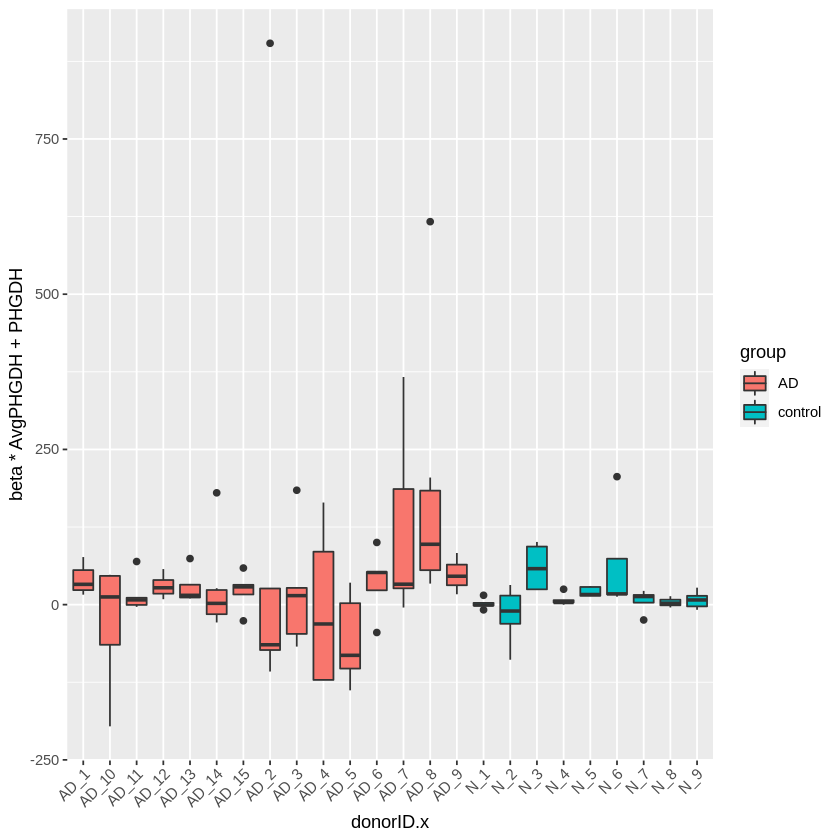

In [658]:
ggplot(tpm_meta_phgdhBetas_extra_AD_control, color=group) +
geom_boxplot(aes(x=donorID.x, y=beta*AvgPHGDH+PHGDH, fill=group)) +
theme(axis.text.x = element_text(angle = 45, hjust=1))

In [632]:
AD_control_phgdh_1 <- lmer((beta*AvgPHGDH+PHGDH) ~ 1 + PHGDH + beta + # fixed effects
                          (1|group),
                          data=tpm_meta_phgdhBetas_extra_AD_control)

boundary (singular) fit: see ?isSingular



In [633]:
summary(AD_control_phgdh_1)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: (beta * AvgPHGDH + PHGDH) ~ 1 + PHGDH + beta + (1 | group)
   Data: tpm_meta_phgdhBetas_extra_AD_control

REML criterion at convergence: 1123.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6024 -0.3034 -0.0136  0.3773  7.2841 

Random effects:
 Groups   Name        Variance Std.Dev.
 group    (Intercept)    0      0.00   
 Residual             1087     32.96   
Number of obs: 115, groups:  group, 2

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) -11.0270     5.0016 112.0000  -2.205   0.0295 *  
PHGDH         1.9764     0.3392 112.0000   5.826 5.54e-08 ***
beta         15.3824     0.6023 112.0000  25.539  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
      (Intr) PHGDH 
PHGDH -0.779       
beta   0.394 -0.627
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singu

In [634]:
coef(AD_control_phgdh_1)

$group
        (Intercept)    PHGDH     beta
AD        -11.02701 1.976357 15.38238
control   -11.02701 1.976357 15.38238

attr(,"class")
[1] "coef.mer"

In [641]:
tpm_meta_phgdhBetas_extra_converters <- tpm_meta_phgdhBetas_extra %>% 
filter(group=='converter') %>%
replace_na(list(beta=1))

head(tpm_meta_phgdhBetas_extra_converters)

donorID.x group     age_death sex braak_stage Year_diagnosis
1 C_1       converter 91        F   3           2010          
2 C_1       converter 91        F   3           2010          
3 C_1       converter 91        F   3           2010          
4 C_1       converter 91        F   3           2010          
5 C_1       converter 91        F   3           2010          
6 C_1       converter 91        F   3           2010          
  APOE_status         sampleID year yr_since_diag <U+22EF>   SLC25A18  up_sum   
1 \316\2653/\316\2654 C_1_01_1 2001 -9            <U+22EF>  1.929883 215.55240
2 \316\2653/\316\2654 C_1_12_1 2012  2            <U+22EF> 11.660903 500.12089
3 \316\2653/\316\2654 C_1_08_1 2008 -2            <U+22EF>  0.000000 116.21349
4 \316\2653/\316\2654 C_1_11_1 2011  1            <U+22EF> 19.037394 466.05400
5 \316\2653/\316\2654 C_1_03_1 2003 -7            <U+22EF>  0.000000  63.88999
6 \316\2653/\316\2654 C_1_04_1 2004 -6            <U+22EF>  8.827874 267.36569
  down_sum  amp_diff  donorID.y n_samples years_spanned beta       beta_sd 
1 115.84113  99.71126 NA        NA        NA             1.0000000       NA
2 266.11197 234.00892 C_1        6        11             4.6973597 1.796430
3  56.78010  59.43340 C_1        4         7            -0.9117844 0.389167
4 139.85866 326.19535 C_1        5        10             2.6741240 1.697993
5  16.66437  47.22562 C_1        2         2            -2.3463710      NaN
6 101.33833 166.02736 C_1        3         3            -0.8484991 1.297195
  AvgPHGDH
1 23.01241
2 23.01241
3 23.01241
4 23.01241
5 23.01241
6 23.01241

In [642]:
dim(tpm_meta_phgdhBetas_extra_converters)

[1] 49 48

In [643]:
# testing_AD_control_phgdh_1 <- -11.8810 + 2.0755*PHGDH + 15.2700*beta

tpm_meta_phgdhBetas_extra_converters <- tpm_meta_phgdhBetas_extra_converters %>%
mutate(testing1 = -11.02701 + 1.976357*PHGDH + 15.3824*beta) %>%
arrange(desc(testing1)) 

In [644]:
dim(tpm_meta_phgdhBetas_extra_converters)

[1] 49 49

In [646]:
tail(tpm_meta_phgdhBetas_extra_converters, 30)

donorID.x group     age_death sex braak_stage Year_diagnosis
1  C_9       converter 85        F   6           2006          
2  C_3       converter 91        F   3           2006          
3  C_10      converter 96        F   5           2007          
4  C_10      converter 96        F   5           2007          
5  C_1       converter 91        F   3           2010          
6  C_6       converter 92        M   6           2012          
7  C_3       converter 91        F   3           2006          
8  C_7       converter 96        F   5           2011          
9  C_11      converter 90        F   3           2008          
10 C_7       converter 96        F   5           2011          
11 C_9       converter 85        F   6           2006          
12 C_10      converter 96        F   5           2007          
13 C_10      converter 96        F   5           2007          
14 C_3       converter 91        F   3           2006          
15 C_4       converter 90        F   6           2007          
16 C_10      converter 96        F   5           2007          
17 C_6       converter 92        M   6           2012          
18 C_2       converter 86        M   5           2012          
19 C_8       converter 89        M   5           2006          
20 C_9       converter 85        F   6           2006          
21 C_7       converter 96        F   5           2011          
22 C_8       converter 89        M   5           2006          
23 C_11      converter 90        F   3           2008          
24 C_1       converter 91        F   3           2010          
25 C_10      converter 96        F   5           2007          
26 C_8       converter 89        M   5           2006          
27 C_1       converter 91        F   3           2010          
28 C_11      converter 90        F   3           2008          
29 C_1       converter 91        F   3           2010          
30 C_5       converter 93        F   5           2005          
   APOE_status         sampleID  year yr_since_diag <U+22EF>   up_sum   
1  \316\2653/\316\2654 C_9_10_1  2010   4           <U+22EF> 255.58736
2  \316\2653/\316\2654 C_3_06_1  2006   0           <U+22EF> 110.37921
3  \316\2653/\316\2653 C_10_13_1 2013   6           <U+22EF> 259.83003
4  \316\2653/\316\2653 C_10_10_1 2010   3           <U+22EF> 168.69503
5  \316\2653/\316\2654 C_1_01_1  2001  -9           <U+22EF> 215.55240
6  \316\2652/\316\2654 C_6_08_1  2008  -4           <U+22EF> 143.99724
7  \316\2653/\316\2654 C_3_04_1  2004  -2           <U+22EF> 229.84855
8  \316\2653/\316\2654 C_7_04_1  2004  -7           <U+22EF> 151.50470
9  \316\2653/\316\2653 C_11_01_1 2001  -7           <U+22EF> 347.64507
10 \316\2653/\316\2654 C_7_00_1  2000 -11           <U+22EF> 118.62588
11 \316\2653/\316\2654 C_9_00_1  2000  -6           <U+22EF> 171.38146
12 \316\2653/\316\2653 C_10_14_1 2014   7           <U+22EF> 235.45407
13 \316\2653/\316\2653 C_10_01_1 2001  -6           <U+22EF> 208.45847
14 \316\2653/\316\2654 C_3_02_1  2002  -4           <U+22EF> 266.12818
15 \316\2653/\316\2653 C_4_03_1  2003  -4           <U+22EF> 193.87780
16 \316\2653/\316\2653 C_10_08_1 2008   1           <U+22EF> 302.33316
17 \316\2652/\316\2654 C_6_06_1  2006  -6           <U+22EF>  88.44262
18 \316\2653/\316\2653 C_2_07_1  2007  -5           <U+22EF> 148.45714
19 \316\2653/\316\2653 C_8_04_1  2004  -2           <U+22EF> 230.27480
20 \316\2653/\316\2654 C_9_07_1  2007   1           <U+22EF> 213.92669
21 \316\2653/\316\2654 C_7_01_1  2001 -10           <U+22EF> 242.73533
22 \316\2653/\316\2653 C_8_01_1  2001  -5           <U+22EF> 215.83076
23 \316\2653/\316\2653 C_11_03_1 2003  -5           <U+22EF> 224.32806
24 \316\2653/\316\2654 C_1_04_1  2004  -6           <U+22EF> 267.36569
25 \316\2653/\316\2653 C_10_03_1 2003  -4           <U+22EF> 126.14401
26 \316\2653/\316\2653 C_8_03_1  2003  -3           <U+22EF> 263.66379
27 \316\2653/\316\2654 C_1_08_1  2008  -2           <U+22EF> 116.21349
28 \316\2653/\316\2653 C_11_0

In [652]:
tpm_meta_phgdhBetas_extra_converters %>% filter(yr_since_diag < 0) %>% dim()

[1] 32 49

In [653]:
tpm_meta_phgdhBetas_extra_converters %>% filter(yr_since_diag < 0, testing1 > 0) %>% dim()

[1] 23 49

# Model using scaled gene expressions and beta phgdh

tpm_t_ampgenes_ordered_scaled_2
tpm_t_ampgenes_ordered_scaled

In [825]:
head(tpm_t_ampgenes_ordered_scaled_2)

PHGDH     MRAS       DOCK1     KCNJ10    ITPKB     PDE4DIP  MYO10    
C_1_01_1  10.171618  0.3447024  0.000000 6.6366578 6.5567074 1.081568 6.7136208
AD_8_12_1 28.471425  5.2026656  5.455683 1.0588634 4.5745041 1.855039 4.5717957
C_10_01_1  5.649296  6.3815665  5.084976 0.3571692 1.8002172 2.064909 4.3732036
C_10_14_1  9.594639  4.0643662  3.813392 2.9778949 8.1002534 1.970874 4.7975714
C_10_05_1 11.935916  5.0561500  2.685903 4.5277940 2.4451232 2.578001 8.5711008
C_10_08_1  7.560268 11.2090658 10.045560 5.2578661 0.6883347 4.605667 0.6160542
          AHNAK    PLXNB1    FAM107A  <U+22EF>   NACC2     PADI2     GPRC5B     
C_1_01_1  8.309859 0.6265048 1.854407 <U+22EF> 0.4692747 0.1638221 -0.33083848
AD_8_12_1 6.198729 3.4385342 1.607022 <U+22EF> 0.1998300 0.1605586 -0.18494130
C_10_01_1 1.297284 2.6360567 5.194843 <U+22EF> 0.1123423 0.1805287 -0.02835602
C_10_14_1 4.382992 1.2210054 1.883129 <U+22EF> 0.3122177 0.2341354 -0.05253735
C_10_05_1 3.264920 0.8354249 1.073714 <U+22EF> 0.1186793 0.3432813 -0.29206621
C_10_08_1 5.412586 1.4110992 4.533970 <U+22EF> 0.2505734 0.6281487 -0.03794793
          QDPR        GNA12      CRTAP      GFAP      SLC25A18   MID1IP1   
C_1_01_1  -1.48216427 -4.9189105 -0.7591409 -4.013489 -0.5070865  -1.530390
AD_8_12_1 -0.09684251 -0.7888777 -3.1248747 -1.316879 -1.3915571  -8.099472
C_10_01_1 -2.44997338 -1.9218284 -0.4054090 -1.413368 -2.6403266   0.000000
C_10_14_1 -1.66439202 -1.9173090 -2.3785842 -2.057514 -3.2612886  -3.280861
C_10_05_1  0.00000000 -2.5768348 -1.0706924 -3.199484 -2.3243835 -16.836002
C_10_08_1 -1.09290627 -5.3416795 -0.9042425 -3.242510 -1.5704277  -7.447877
          PBXIP1    
C_1_01_1  -10.182410
AD_8_12_1  -1.663260
C_10_01_1  -1.683122
C_10_14_1  -4.157930
C_10_05_1  -6.223218
C_10_08_1  -6.757400

In [678]:
head(tpm_meta_phgdhBetas_extra)

donorID.x group   age_death sex braak_stage Year_diagnosis
1 N_1       control 86        M   1           NA            
2 N_1       control 86        M   1           NA            
3 N_1       control 86        M   1           NA            
4 N_1       control 86        M   1           NA            
5 N_1       control 86        M   1           NA            
6 N_2       control 93        F   1           NA            
  APOE_status         sampleID year yr_since_diag <U+22EF>   SLC25A18   up_sum   
1 \316\2653/\316\2654 N_1_01_1 2001 0             <U+22EF>  0.4974588  43.82148
2 \316\2653/\316\2654 N_1_05_1 2005 4             <U+22EF>  0.5525903  29.94099
3 \316\2653/\316\2654 N_1_07_1 2007 6             <U+22EF>  9.9781417 113.87496
4 \316\2653/\316\2654 N_1_08_1 2008 7             <U+22EF> 12.3373954 167.47166
5 \316\2653/\316\2654 N_1_09_1 2009 8             <U+22EF> 21.9326350 112.11617
6 \316\2653/\316\2653 N_2_00_1 2000 0             <U+22EF> 15.1759295 283.35286
  down_sum   amp_diff  donorID.y n_samples years_spanned beta       beta_sd  
1  13.620438  30.20104 NA        NA        NA                    NA        NA
2   9.416191  20.52480 N_1        2         4            -2.0510285       NaN
3  36.455059  77.41990 N_1        3         6            -1.1302675 0.7974024
4  72.029741  95.44192 N_1        4         7            -0.6630481 0.6391231
5  74.023792  38.09237 N_1        5         8            -0.6837510 0.4428254
6 126.905701 156.44716 NA        NA        NA                    NA        NA
  AvgPHGDH 
1  5.012349
2  5.012349
3  5.012349
4  5.012349
5  5.012349
6 12.602472

In [682]:
tpm_t_ampgenes_ordered_scaled_2_sums <- tpm_t_ampgenes_ordered_scaled_2 %>%
mutate(up_sum_scaled2 = select(tpm_t_ampgenes_ordered_scaled_2, one_of(up.ampgenes)) %>% rowSums()) %>%
rownames_to_column(var='sampleID')

In [684]:
tpm_meta_phgdhBetas_extra <- tpm_t_ampgenes_ordered_scaled_2_sums %>%
select(sampleID, up_sum_scaled2) %>%
full_join(tpm_meta_phgdhBetas_extra, by='sampleID') %>%
replace_na(list(beta=1))

head(tpm_meta_phgdhBetas_extra)

sampleID  up_sum_scaled2.x up_sum_scaled2.y donorID.x group     age_death sex
1 C_1_01_1  54.87667         54.87667         C_1       converter 91        F  
2 AD_8_12_1 79.44563         79.44563         AD_8      AD        87        F  
3 C_10_01_1 50.51936         50.51936         C_10      converter 96        F  
4 C_10_14_1 57.87535         57.87535         C_10      converter 96        F  
5 C_10_05_1 61.71639         61.71639         C_10      converter 96        F  
6 C_10_08_1 69.87458         69.87458         C_10      converter 96        F  
  braak_stage Year_diagnosis APOE_status         <U+22EF>   SLC25A18  up_sum  
1 3           2010           \316\2653/\316\2654 <U+22EF>  1.929883 215.5524
2 5             NA           \316\2653/\316\2654 <U+22EF>  5.296023 259.8685
3 5           2007           \316\2653/\316\2653 <U+22EF> 10.048622 208.4585
4 5           2007           \316\2653/\316\2653 <U+22EF> 12.411894 235.4541
5 5           2007           \316\2653/\316\2653 <U+22EF>  8.846198 265.1570
6 5           2007           \316\2653/\316\2653 <U+22EF>  5.976773 302.3332
  down_sum  amp_diff  donorID.y n_samples years_spanned beta      beta_sd  
1 115.84113  99.71126 NA        NA        NA            1.0000000        NA
2  71.68392 188.18460 AD_8       6         9            3.1407608 2.6148414
3  61.42112 147.03736 NA        NA        NA            1.0000000        NA
4  86.22882 149.22525 C_10       7        13            0.5122905 0.2511794
5 122.04879 143.10819 C_10       3         4            1.5716548 1.1457202
6 107.30777 195.02539 C_10       4         7            0.4827321 0.6702599
  AvgPHGDH 
1 23.012411
2 29.268614
3  9.623629
4  9.623629
5  9.623629
6  9.623629

In [662]:
dim(tpm_meta_phgdhBetas)

[1] 164  47

In [711]:
head(tpm_meta_phgdhBetas_extra)

sampleID  up_sum_scaled2.x up_sum_scaled2.y donorID.x group     age_death sex
1 C_1_01_1  54.87667         54.87667         C_1       converter 91        F  
2 AD_8_12_1 79.44563         79.44563         AD_8      AD        87        F  
3 C_10_01_1 50.51936         50.51936         C_10      converter 96        F  
4 C_10_14_1 57.87535         57.87535         C_10      converter 96        F  
5 C_10_05_1 61.71639         61.71639         C_10      converter 96        F  
6 C_10_08_1 69.87458         69.87458         C_10      converter 96        F  
  braak_stage Year_diagnosis APOE_status         <U+22EF>   SLC25A18  up_sum  
1 3           2010           \316\2653/\316\2654 <U+22EF>  1.929883 215.5524
2 5             NA           \316\2653/\316\2654 <U+22EF>  5.296023 259.8685
3 5           2007           \316\2653/\316\2653 <U+22EF> 10.048622 208.4585
4 5           2007           \316\2653/\316\2653 <U+22EF> 12.411894 235.4541
5 5           2007           \316\2653/\316\2653 <U+22EF>  8.846198 265.1570
6 5           2007           \316\2653/\316\2653 <U+22EF>  5.976773 302.3332
  down_sum  amp_diff  donorID.y n_samples years_spanned beta      beta_sd  
1 115.84113  99.71126 NA        NA        NA            1.0000000        NA
2  71.68392 188.18460 AD_8       6         9            3.1407608 2.6148414
3  61.42112 147.03736 NA        NA        NA            1.0000000        NA
4  86.22882 149.22525 C_10       7        13            0.5122905 0.2511794
5 122.04879 143.10819 C_10       3         4            1.5716548 1.1457202
6 107.30777 195.02539 C_10       4         7            0.4827321 0.6702599
  AvgPHGDH 
1 23.012411
2 29.268614
3  9.623629
4  9.623629
5  9.623629
6  9.623629

In [673]:
tpm_meta_scaled_1_phgdhBetas <- tpm_t_ampgenes_ordered_scaled_meta %>%
full_join(phgdh_betas_df, by='sampleID') %>%
select(-donorID.y) %>%
rename(donorID = donorID.x) %>%
left_join(first_year, by='donorID')

tpm_meta_scaled_1_phgdhBetas$yr_since_diag <- ifelse(is.na(tpm_meta_scaled_1_phgdhBetas$yr_since_diag), 
                                           tpm_meta_scaled_1_phgdhBetas$year-tpm_meta_scaled_1_phgdhBetas$firstYear, 
                                           tpm_meta_scaled_1_phgdhBetas$yr_since_diag)
head(tpm_meta_scaled_1_phgdhBetas)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   CRTAP      GFAP       SLC25A18  
1 N_1_01_1 2001 0             <U+22EF> -0.7502665 -0.1751543 -0.1017979
2 N_1_05_1 2005 4             <U+22EF>  0.0000000 -0.0389132 -0.1130797
3 N_1_07_1 2007 6             <U+22EF> -1.0189438 -0.8197665 -2.0418846
4 N_1_08_1 2008 7             <U+22EF> -1.2997704 -1.0221115 -2.5246723
5 N_1_09_1 2009 8             <U+22EF> -1.0650360 -2.2465279 -4.4882014
6 N_2_00_1 2000 0             <U+22EF> -2.8610390 -5.3758007 -3.1055379
  MID1IP1    PBXIP1     n_samples years_spanned beta       beta_sd   firstYear
1  0.0000000 -0.8760529 NA        NA                    NA        NA 2001     
2  0.0000000 -1.1893966  2         4            -2.0510285       NaN 2001     
3 -0.1467242 -1.7897478  3         6            -1.1302675 0.7974024 2001     
4 -1.7928172  0.0000000  4         7            -0.6630481 0.6391231 2001     
5  0.0000000 -2.8610818  5         8            -0.6837510 0.4428254 2001     
6 -2.5967178 -6.2989785 NA        NA                    NA        NA 2000

In [674]:
names(tpm_meta_scaled_1_phgdhBetas)

[1] "donorID"        "group"          "age_death"      "sex"           
 [5] "braak_stage"    "Year_diagnosis" "APOE_status"    "sampleID"      
 [9] "year"           "yr_since_diag"  "PHGDH"          "MRAS"          
[13] "DOCK1"          "KCNJ10"         "ITPKB"          "PDE4DIP"       
[17] "MYO10"          "AHNAK"          "PLXNB1"         "FAM107A"       
[21] "ERBB2IP"        "LAMP2"          "TNS3"           "CALD1"         
[25] "SASH1"          "QKI"            "CSRP1"          "RHOQ"          
[29] "NACC2"          "PADI2"          "GPRC5B"         "QDPR"          
[33] "GNA12"          "CRTAP"          "GFAP"           "SLC25A18"      
[37] "MID1IP1"        "PBXIP1"         "n_samples"      "years_spanned" 
[41] "beta"           "beta_sd"        "firstYear"

In [675]:
tpm_meta_scaled_1_phgdhBetas_AD_control <- tpm_meta_scaled_1_phgdhBetas %>% 
filter(group!='converter') %>%
replace_na(list(beta=1))

head(tpm_meta_scaled_1_phgdhBetas_AD_control)

donorID group   age_death sex braak_stage Year_diagnosis APOE_status        
1 N_1     control 86        M   1           NA             \316\2653/\316\2654
2 N_1     control 86        M   1           NA             \316\2653/\316\2654
3 N_1     control 86        M   1           NA             \316\2653/\316\2654
4 N_1     control 86        M   1           NA             \316\2653/\316\2654
5 N_1     control 86        M   1           NA             \316\2653/\316\2654
6 N_2     control 93        F   1           NA             \316\2653/\316\2653
  sampleID year yr_since_diag <U+22EF>   CRTAP      GFAP       SLC25A18  
1 N_1_01_1 2001 0             <U+22EF> -0.7502665 -0.1751543 -0.1017979
2 N_1_05_1 2005 4             <U+22EF>  0.0000000 -0.0389132 -0.1130797
3 N_1_07_1 2007 6             <U+22EF> -1.0189438 -0.8197665 -2.0418846
4 N_1_08_1 2008 7             <U+22EF> -1.2997704 -1.0221115 -2.5246723
5 N_1_09_1 2009 8             <U+22EF> -1.0650360 -2.2465279 -4.4882014
6 N_2_00_1 2000 0             <U+22EF> -2.8610390 -5.3758007 -3.1055379
  MID1IP1    PBXIP1     n_samples years_spanned beta       beta_sd   firstYear
1  0.0000000 -0.8760529 NA        NA             1.0000000        NA 2001     
2  0.0000000 -1.1893966  2         4            -2.0510285       NaN 2001     
3 -0.1467242 -1.7897478  3         6            -1.1302675 0.7974024 2001     
4 -1.7928172  0.0000000  4         7            -0.6630481 0.6391231 2001     
5  0.0000000 -2.8610818  5         8            -0.6837510 0.4428254 2001     
6 -2.5967178 -6.2989785 NA        NA             1.0000000        NA 2000

In [686]:
head(tpm_meta_phgdhBetas_extra_AD_control_2)

sampleID   up_sum_scaled2.x up_sum_scaled2.y donorID.x group   age_death sex
1 AD_8_12_1   79.445632        79.445632       AD_8      AD      87        F  
2 AD_11_08_1  27.006131        27.006131       AD_11     AD      81        M  
3 AD_11_10_1  12.561557        12.561557       AD_11     AD      81        M  
4 N_1_01_1    15.580144        15.580144       N_1       control 86        M  
5 N_1_05_1     7.637889         7.637889       N_1       control 86        M  
6 AD_8_11_1  162.881325       162.881325       AD_8      AD      87        F  
  braak_stage Year_diagnosis APOE_status         <U+22EF>   SLC25A18  up_sum   
1 5           NA             \316\2653/\316\2654 <U+22EF> 5.2960234 259.86853
2 6           NA             \316\2654/\316\2654 <U+22EF> 0.9900926 100.68527
3 6           NA             \316\2654/\316\2654 <U+22EF> 0.0000000  55.72491
4 1           NA             \316\2653/\316\2654 <U+22EF> 0.4974588  43.82148
5 1           NA             \316\2653/\316\2654 <U+22EF> 0.5525903  29.94099
6 5           NA             \316\2653/\316\2654 <U+22EF> 8.8172649 549.77322
  down_sum  amp_diff  donorID.y n_samples years_spanned beta       beta_sd  
1 71.683923 188.18460 AD_8       6         9             3.1407608 2.6148414
2 20.943428  79.74184 AD_11      4         6            -0.9837233 1.1420886
3 13.702424  42.02249 AD_11      5         8            -0.7083372 0.6341246
4 13.620438  30.20104 NA        NA        NA             1.0000000        NA
5  9.416191  20.52480 N_1        2         4            -2.0510285       NaN
6 39.065941 510.70728 AD_8       5         8             4.8762224 3.3065400
  AvgPHGDH 
1 29.268614
2  6.155444
3  6.155444
4  5.012349
5  5.012349
6 29.268614

In [685]:
tpm_meta_phgdhBetas_extra_AD_control_2 <- tpm_meta_phgdhBetas_extra %>%
filter(group!='converter')

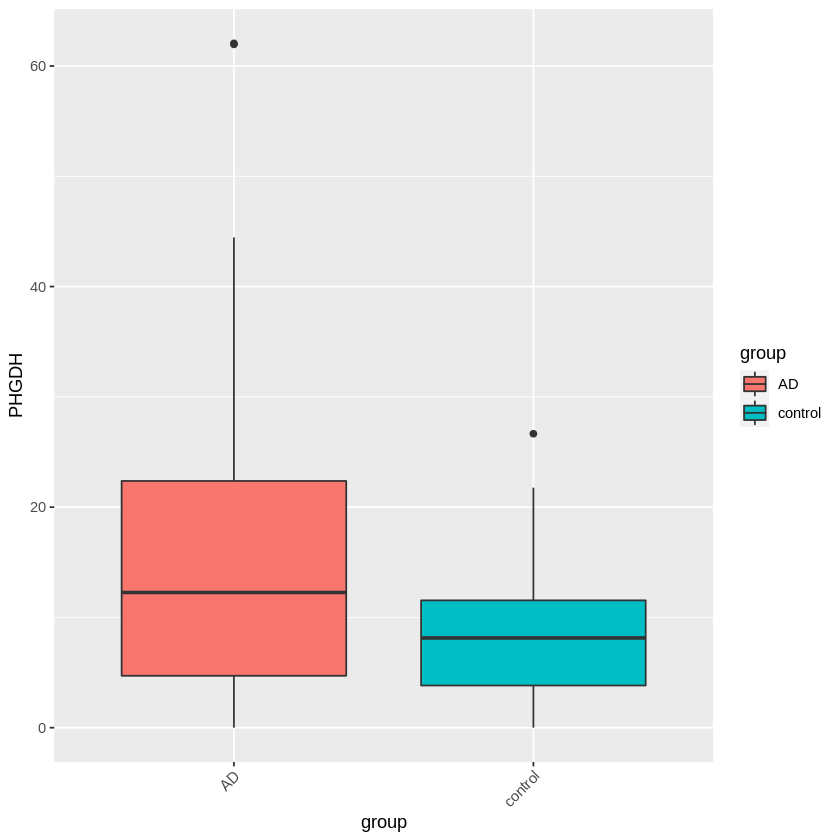

In [695]:
ggplot(tpm_meta_phgdhBetas_extra_AD_control_2, color=group) +
geom_boxplot(aes(x=group, y=PHGDH, fill=group)) +
theme(axis.text.x = element_text(angle = 45, hjust=1))

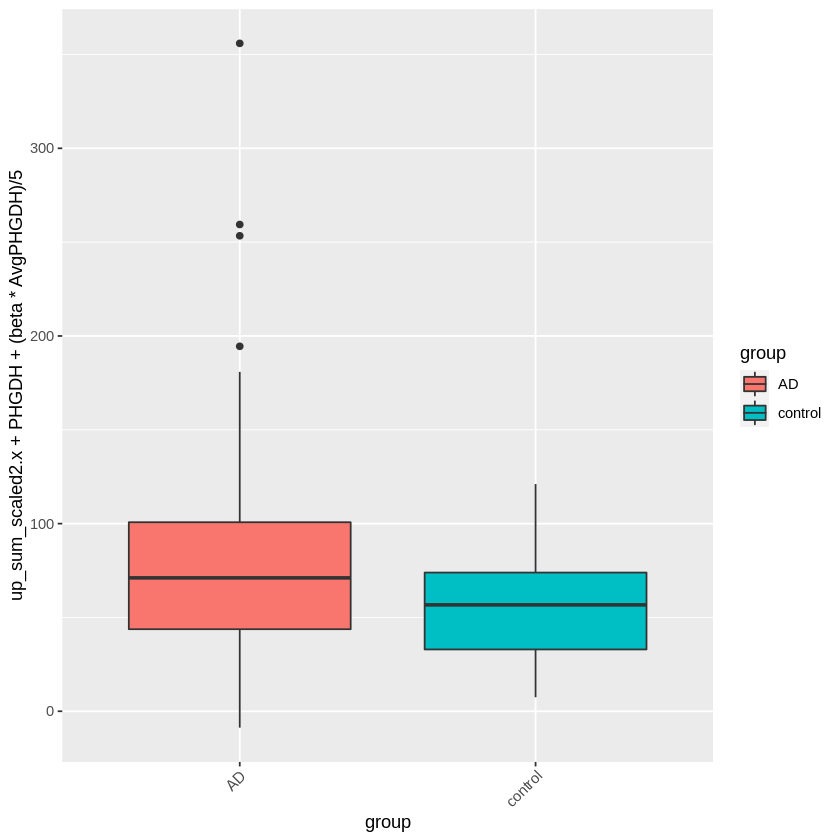

In [717]:
# Want to maximize mean(AD) - mean(ctrl)

ggplot(tpm_meta_phgdhBetas_extra_AD_control_2, color=group) +
geom_boxplot(aes(x=group, y=up_sum_scaled2.x+PHGDH+(beta*AvgPHGDH)/5, fill=group)) +
theme(axis.text.x = element_text(angle = 45, hjust=1))

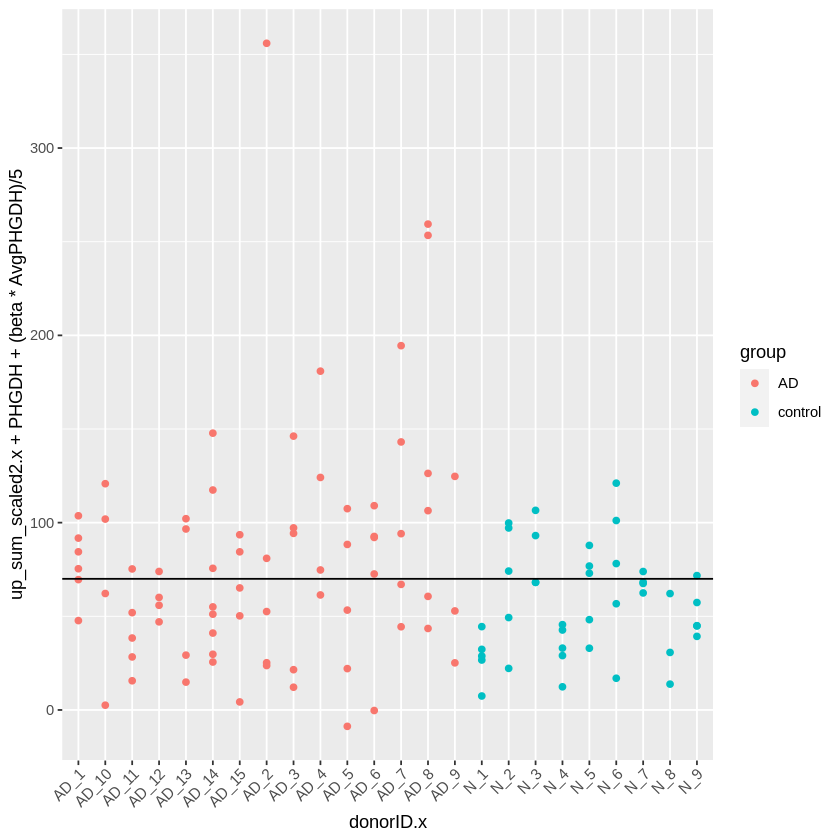

In [754]:
ggplot(tpm_meta_phgdhBetas_extra_AD_control_2, color=group) +
geom_point(aes(x=donorID.x, y=up_sum_scaled2.x+PHGDH+(beta*AvgPHGDH)/5, color=group)) +
geom_hline(yintercept=70) +
theme(axis.text.x = element_text(angle = 45, hjust=1))

In [ ]:
tpm_meta_phgdhBetas_extra_AD_control_2 %>%
mutate(x = )

In [755]:
names(tpm_meta_phgdhBetas_extra_AD_control_2)

[1] "sampleID"         "up_sum_scaled2.x" "up_sum_scaled2.y" "donorID.x"       
 [5] "group"            "age_death"        "sex"              "braak_stage"     
 [9] "Year_diagnosis"   "APOE_status"      "year"             "yr_since_diag"   
[13] "firstYear"        "PADI2"            "PHGDH"            "PDE4DIP"         
[17] "PBXIP1"           "KCNJ10"           "CSRP1"            "ITPKB"           
[21] "RHOQ"             "CRTAP"            "PLXNB1"           "FAM107A"         
[25] "MRAS"             "QDPR"             "MYO10"            "ERBB2IP"         
[29] "SASH1"            "QKI"              "GNA12"            "TNS3"            
[33] "CALD1"            "MID1IP1"          "LAMP2"            "NACC2"           
[37] "AHNAK"            "DOCK1"            "GPRC5B"           "GFAP"            
[41] "SLC25A18"         "up_sum"           "down_sum"         "amp_diff"        
[45] "donorID.y"        "n_samples"        "years_spanned"    "beta"            
[49] "beta_sd"          "AvgPHGDH"         "testing2"

In [756]:
tpm_meta_phgdhBetas_extra_AD_control_2 %>% group_by(yr_since_diag) %>% count()

yr_since_diag n 
1   0            24
2   1            14
3   2            12
4   3            15
5   4             8
6   5            10
7   6            13
8   7             7
9   8             5
10  9             2
11 10             1
12 11             1
13 12             1
14 13             1
15 14             1

In [757]:
tpm_meta_phgdhBetas_extra_AD_control_2 %>% select(sampleID, yr_since_diag)

sampleID   yr_since_diag
1      AD_2_02_1   1           
2      AD_8_05_1   2           
3      AD_7_08_1   2           
4      AD_8_11_1   8           
5      AD_14_01_1  1           
6      N_6_02_1    1           
7      AD_3_01_1   1           
8      AD_4_13_1   3           
9      AD_7_09_1   3           
10     AD_11_03_1  1           
11     AD_9_09_1   5           
12     AD_13_04_1  4           
13     AD_8_12_1   9           
14     N_6_06_1    5           
15     N_3_04_1    3           
16     AD_6_10_1   1           
17     N_3_03_1    2           
18     AD_4_10_1   0           
19     AD_1_08_1   6           
20     AD_10_09_1  5           
21     AD_6_13_1   4           
22     AD_8_09_1   6           
23     AD_15_01_1  1           
24     AD_10_04_1  0           
25     AD_14_13_1 13           
26     AD_5_09_1   0           
27     AD_6_12_1   3           
28     AD_1_04_1   2           
29     AD_12_03_1  1           
30     N_2_00_1    0           
<U+22EE> <U+22EE>   <U+22EE>     
86     N_4_06_1    5           
87     N_9_08_1    8           
88     N_6_01_1    0           
89     N_4_02_1    1           
90     N_8_07_1    6           
91     AD_13_00_1  0           
92     N_4_01_1    0           
93     AD_14_10_1 10           
94     N_1_09_1    8           
95     N_1_07_1    6           
96     N_9_06_1    6           
97     AD_11_08_1  6           
98     AD_11_10_1  8           
99     AD_14_07_1  7           
100    N_8_05_1    4           
101    AD_14_05_1  5           
102    N_2_06_1    6           
103    N_1_05_1    4           
104    AD_2_07_1   6           
105    AD_2_05_1   4           
106    AD_15_03_1  3           
107    AD_2_03_1   2           
108    AD_5_10_1   1           
109    AD_3_05_1   5           
110    AD_6_11_1   2           
111    N_2_01_1    1           
112    AD_3_03_1   3           
113    AD_5_12_1   3           
114    AD_10_06_1  2           
115    AD_5_11_1   2

In [722]:
summary(AD_control_phgdh_2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
(up_sum_scaled2.x + (beta * AvgPHGDH)/5 + PHGDH) ~ 1 + up_sum_scaled2.x +  
    PHGDH + beta + (1 | group) + (1 | year)
   Data: tpm_meta_phgdhBetas_extra_AD_control_2

REML criterion at convergence: 765

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6839 -0.2669  0.0069  0.2996  6.9815 

Random effects:
 Groups   Name        Variance Std.Dev.
 year     (Intercept)  2.548   1.596   
 group    (Intercept)  0.000   0.000   
 Residual             41.042   6.406   
Number of obs: 115, groups:  year, 15; group, 2

Fixed effects:
                 Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)       -0.9388     1.6111  76.7247  -0.583    0.562    
up_sum_scaled2.x   0.9575     0.0417 109.1178  22.964   <2e-16 ***
PHGDH              1.2808     0.1095 109.9558  11.702   <2e-16 ***
beta               3.0704     0.1244  98.1264  24.674   <2e-16 ***
---
Signif. codes:  0 

In [723]:
coef(AD_control_phgdh_2)

$year
     (Intercept) up_sum_scaled2.x    PHGDH    beta
2000  -1.0756681        0.9575261 1.280793 3.07044
2001  -1.8680162        0.9575261 1.280793 3.07044
2002  -1.4109178        0.9575261 1.280793 3.07044
2003  -1.1699162        0.9575261 1.280793 3.07044
2004  -2.1009742        0.9575261 1.280793 3.07044
2005   1.7534080        0.9575261 1.280793 3.07044
2006  -1.4037516        0.9575261 1.280793 3.07044
2007  -0.6079167        0.9575261 1.280793 3.07044
2008  -0.2493251        0.9575261 1.280793 3.07044
2009  -1.0090789        0.9575261 1.280793 3.07044
2010  -0.7988516        0.9575261 1.280793 3.07044
2011  -0.9712131        0.9575261 1.280793 3.07044
2012  -1.2924304        0.9575261 1.280793 3.07044
2013  -1.0608655        0.9575261 1.280793 3.07044
2014  -0.8171602        0.9575261 1.280793 3.07044

$group
        (Intercept) up_sum_scaled2.x    PHGDH    beta
AD       -0.9388452        0.9575261 1.280793 3.07044
control  -0.9388452        0.9575261 1.280793 3.07044

attr(,"

In [736]:
coef(AD_control_phgdh_2)[2][[1]][1,2]

[1] 0.9575261

In [713]:
tpm_meta_phgdhBetas_extra_converters_2 <- tpm_meta_phgdhBetas_extra %>% filter(group=='converter')

In [741]:
# testing_AD_control_phgdh_1 <- -11.8810 + 2.0755*PHGDH + 15.2700*beta

tpm_meta_phgdhBetas_extra_converters_2 <- tpm_meta_phgdhBetas_extra_converters_2 %>%
mutate(testing2 = coef(AD_control_phgdh_2)[2][[1]][1,1] + 
       coef(AD_control_phgdh_2)[2][[1]][1,2]*up_sum_scaled2.x + 
       coef(AD_control_phgdh_2)[2][[1]][1,3]*PHGDH + 
       coef(AD_control_phgdh_2)[2][[1]][1,4]*beta) %>%
arrange(desc(testing2)) 

In [740]:
coef(AD_control_phgdh_2)[2][[1]][1,1]

[1] -0.9388452

In [742]:
tpm_meta_phgdhBetas_extra_converters_2 %>% filter(yr_since_diag < 0) %>% dim()

[1] 32 51

In [745]:
tpm_meta_phgdhBetas_extra_converters_2 %>% filter(yr_since_diag < 0, testing2 > 0) %>% arrange(testing2)

sampleID  up_sum_scaled2.x up_sum_scaled2.y donorID.x group     age_death
1  C_1_03_1  17.92513         17.92513         C_1       converter 91       
2  C_1_08_1  22.62446         22.62446         C_1       converter 91       
3  C_6_06_1  22.50548         22.50548         C_6       converter 92       
4  C_10_03_1 27.94079         27.94079         C_10      converter 96       
5  C_2_07_1  31.20765         31.20765         C_2       converter 86       
6  C_7_00_1  29.48282         29.48282         C_7       converter 96       
7  C_5_02_1  64.08608         64.08608         C_5       converter 93       
8  C_6_08_1  37.95254         37.95254         C_6       converter 92       
9  C_7_04_1  37.05501         37.05501         C_7       converter 96       
10 C_9_00_1  41.09628         41.09628         C_9       converter 85       
11 C_4_03_1  47.16760         47.16760         C_4       converter 90       
12 C_7_01_1  52.52235         52.52235         C_7       converter 96       
13 C_10_01_1 50.51936         50.51936         C_10      converter 96       
14 C_11_03_1 57.20634         57.20634         C_11      converter 90       
15 C_3_04_1  52.27514         52.27514         C_3       converter 91       
16 C_11_04_1 69.89318         69.89318         C_11      converter 90       
17 C_1_04_1  62.52021         62.52021         C_1       converter 91       
18 C_1_01_1  54.87667         54.87667         C_1       converter 91       
19 C_3_02_1  63.33599         63.33599         C_3       converter 91       
20 C_8_03_1  67.07769         67.07769         C_8       converter 89       
21 C_8_01_1  62.52009         62.52009         C_8       converter 89       
22 C_8_04_1  61.44922         61.44922         C_8       converter 89       
23 C_9_05_1  56.74671         56.74671         C_9       converter 85       
24 C_2_09_1  45.38814         45.38814         C_2       converter 86       
25 C_10_05_1 61.71639         61.71639         C_10      converter 96       
26 C_11_01_1 70.88743         70.88743         C_11      converter 90       
27 C_7_08_1  64.65562         64.65562         C_7       converter 96       
28 C_5_01_1  77.04346         77.04346         C_5       converter 93       
29 C_8_00_1  87.03300         87.03300         C_8       converter 89       
30 C_4_05_1  74.94365         74.94365         C_4       converter 90       
31 C_2_10_1  77.27105         77.27105         C_2       converter 86       
32 C_2_11_1  84.17323         84.17323         C_2       converter 86       
   sex braak_stage Year_diagnosis APOE_status         <U+22EF>   up_sum   
1  F   3           2010           \316\2653/\316\2654 <U+22EF>  63.88999
2  F   3           2010           \316\2653/\316\2654 <U+22EF> 116.21349
3  M   6           2012           \316\2652/\316\2654 <U+22EF>  88.44262
4  F   5           2007           \316\2653/\316\2653 <U+22EF> 126.14401
5  M   5           2012           \316\2653/\316\2653 <U+22EF> 148.45714
6  F   5           2011           \316\2653/\316\2654 <U+22EF> 118.62588
7  F   5           2005           \316\2653/\316\2653 <U+22EF> 268.78900
8  M   6           2012           \316\2652/\316\2654 <U+22EF> 143.99724
9  F   5           2011           \316\2653/\316\2654 <U+22EF> 151.50470
10 F   6           2006           \316\2653/\316\2654 <U+22EF> 171.38146
11 F   6           2007           \316\2653/\316\2653 <U+22EF> 193.87780
12 F   5           2011           \316\2653/\316\2654 <U+22EF> 242.73533
13 F   5           2007           \316\2653/\316\2653 <U+22EF> 208.45847
14 F   3           2008           \316\2653/\316\2653 <U+22EF> 224.32806
15 F   3           2006           \316\2653/\316\2654 <U+22EF> 229.84855
16 F   3           2008           \316\2653/\316\2653 <U+22EF> 352.13981
17 F   3           2010           \316\2653/\316\2654 <U+22EF> 267.36569
18 F   3           2010           \316\2653/\316\2654 <U+22EF> 215.55240
19 F   3           2006           \316\2653/\316\2654 <U+22EF> 266.12818


In [760]:
names(tpm_meta_fixedYears)

[1] "donorID"        "group"          "age_death"      "sex"           
 [5] "braak_stage"    "Year_diagnosis" "APOE_status"    "sampleID"      
 [9] "year"           "yr_since_diag"  "firstYear"      "PADI2"         
[13] "PHGDH"          "PDE4DIP"        "PBXIP1"         "KCNJ10"        
[17] "CSRP1"          "ITPKB"          "RHOQ"           "CRTAP"         
[21] "PLXNB1"         "FAM107A"        "MRAS"           "QDPR"          
[25] "MYO10"          "ERBB2IP"        "SASH1"          "QKI"           
[29] "GNA12"          "TNS3"           "CALD1"          "MID1IP1"       
[33] "LAMP2"          "NACC2"          "AHNAK"          "DOCK1"         
[37] "GPRC5B"         "GFAP"           "SLC25A18"       "up_sum"        
[41] "down_sum"       "amp_diff"

In [763]:
tpm_meta_fixedYears_up <- tpm_meta_fixedYears %>% select(one_of(up.ampgenes))

tpm_meta_fixedYears_up <- tpm_meta_fixedYears_up[, up.ampgenes]

names(tpm_meta_fixedYears_up)

[1] "PADI2"   "NACC2"   "RHOQ"    "QKI"     "CSRP1"   "CALD1"   "SASH1"  
 [8] "TNS3"    "LAMP2"   "ERBB2IP" "FAM107A" "PLXNB1"  "AHNAK"   "MYO10"  
[15] "PDE4DIP" "ITPKB"   "KCNJ10"  "DOCK1"   "MRAS"    "PHGDH"

In [775]:
tpm_meta_fixedYears_up[['PADI2']]

[1]  5.9118954  0.2189030  3.2939484  9.7746644  4.7391205 14.2096814
  [7] 19.1873006 23.9621444  7.6032742 17.1140784  9.5681412  1.5102808
 [13]  4.0893407  9.7217473 14.8067693  6.1131147  9.7335052 12.2055901
 [19] 13.4581154  5.7122650 20.9882809 10.6895174 18.8956210 24.3173615
 [25]  0.0000000  4.6041055 18.6917396 17.1592679  4.9842191 17.9615119
 [31] 13.9469406  7.0407676  7.3605103  8.9220875  1.6788060  3.7017977
 [37]  6.9947208 13.4229493 10.5162353 14.7859300  8.3978058 31.5035443
 [43] 10.2482659 11.9537722 11.4518610 12.3972056 11.0608070  1.4252233
 [49] 36.7747018  7.3623050 53.3710714  3.3136591  2.2975654 19.4324284
 [55] 18.8043073 16.1644358 17.6475022 13.3116625 26.5607759 26.5282351
 [61] 19.1448472  4.1337845  5.0989339  3.1979165  4.5057796 21.1181836
 [67] 10.5581810 18.3722820  6.9892080  0.4788431 21.2745128 22.8817320
 [73]  2.8044413  7.8688472 10.0655174 16.4238925  7.8673693  4.6571583
 [79] 15.8865082  8.1884875  2.4208112  5.6517839 18.9081527  5.9671129
 [85]  2.9500551 12.7859490 15.5818356  8.5317319  5.5017385  5.4910096
 [91]  0.0000000  3.7356554  3.8336770  1.7437890 10.7415094  3.0541709
 [97]  8.9204479  1.8554038  0.9433281  8.7962973  0.0000000  3.1161093
[103] 12.0453332 13.2352581  8.6189952 11.1944040  6.2364364  6.6163956
[109]  5.9668077  3.4722248  2.1194549 12.3987992 19.0596092  6.8744555
[115]  0.8664839  8.0272834 46.1934687  0.0000000  7.5414677  1.0294867
[121] 13.1140183  2.9539097 41.3285555 22.5927201 14.1025778  0.0000000
[127] 13.4845822 18.2750680  5.1170997  2.7035649 10.4443398  3.8232950
[133] 16.4889277 24.3084761 10.1447082 11.3712730  4.2133032  8.9063251
[139]  7.6807333  9.5534046  1.8319533 15.0679089  6.3024057  2.0161483
[145]  6.5669784 19.6794226 12.7731129 12.6602505 35.3488874 31.3900838
[151] 30.2133349 11.6952653 15.2671645  8.8459069 11.4726365 16.8207847
[157] 30.7792845 10.1967877  6.3925954  4.4448444 16.9285307 36.4518381
[163]  0.0000000 65.1695146

# Calculate betas for all timepoints and all upgenes



In [776]:
up_betas_df <- data.frame('donorID' = character(),
                             'sampleID' = character(),
                             'n_samples' = numeric(),
                             'years_spanned' = numeric(),
                              'gene' = character(),
                             'beta' = numeric(),
                             'beta_sd' = numeric())


count = 1

for (i in donors_list){
    donor <- tpm_meta_fixedYears %>% 
    filter(donorID==i) %>%
    arrange(yr_since_diag)
    
    n_samples <- dim(donor)[1]
    
    for (j in 2:n_samples){
        
        # Subset to j values
        donor_j <- donor %>% dplyr::slice(1:j)
        years <- donor_j[j, 10] - donor_j[1, 10]
        
        for (k in up.ampgenes){
            z <- donor_j[[k]]
            reg <- lm(z ~ donor_j$yr_since_diag)
            beta <- coef(reg)[2]
            sd <- coef(summary(reg))[, "Std. Error"][2]

            up_betas_df[count, 1] = i
            up_betas_df[count, 2] = donor_j[j, 8]
            up_betas_df[count, 3] = j
            up_betas_df[count, 4] = years
            up_betas_df[count, 5] = k
            up_betas_df[count, 6] = beta
            up_betas_df[count, 7] = sd

            count = count + 1
            
        }
        
    }
    
}

head(up_betas_df)

donorID sampleID n_samples years_spanned gene  beta        beta_sd
1 N_1     N_1_05_1 2         4             PADI2 -1.42324811 NaN    
2 N_1     N_1_05_1 2         4             NACC2 -1.22631663 NaN    
3 N_1     N_1_05_1 2         4             RHOQ   1.43918465 NaN    
4 N_1     N_1_05_1 2         4             QKI   -0.76195423 NaN    
5 N_1     N_1_05_1 2         4             CSRP1  0.05073782 NaN    
6 N_1     N_1_05_1 2         4             CALD1 -0.80875054 NaN

In [777]:
# Spread into 1 gene per column
up_betas_df_wide <- up_betas_df %>% select(-beta_sd) %>%
spread(gene, beta)

head(up_betas_df_wide)

donorID sampleID   n_samples years_spanned AHNAK      CALD1     CSRP1     
1 AD_1    AD_1_04_1  2          2            -2.6468303  3.568226  0.7591669
2 AD_1    AD_1_08_1  3          6             1.1964910  1.865766  0.7884512
3 AD_1    AD_1_09_1  4          7             0.8793440  1.821355  1.0158458
4 AD_1    AD_1_11_1  5          9             0.6670430  1.882108  0.6483267
5 AD_1    AD_1_13_1  6         11             0.3160159  1.623629  1.1306110
6 AD_10   AD_10_06_1 2          2            -2.1531431 -1.749378 -5.5174216
  DOCK1      ERBB2IP     FAM107A    <U+22EF>   MYO10      NACC2       PADI2     
1 -2.2296014  0.66050271 -0.6527423 <U+22EF> -3.8692321  1.88502289 -10.627639
2  1.1931127 -0.01409997  0.9103254 <U+22EF> -1.4324755  0.65627789  -2.731914
3  0.4361349  0.32851535  0.2652167 <U+22EF> -1.1540615  0.67116655  -2.197198
4  1.3678996  1.18258818  0.2367686 <U+22EF>  0.6336119 -0.03389229  -1.611410
5  0.7189276  1.34541141 -0.2391561 <U+22EF>  0.4544442  0.22388369  -1.281738
6  0.9053430 -1.00884594 -0.1950544 <U+22EF> -4.5341611 -3.29720591  -1.514997
  PDE4DIP     PHGDH       PLXNB1     QKI        RHOQ       SASH1     
1 -0.26539266   4.8837326  0.8889034 -1.5644449  8.7102221 -5.0193602
2  0.09358067   3.0610390 -0.9464017 -0.1845767  0.9471059  1.6084398
3  0.11122733   1.7815745 -0.8537622 -0.2192245  0.3277103  2.4258427
4  0.33722746   0.8714155 -0.3444208  0.5391184  0.1434329  1.4455225
5  0.32930426   0.8766917 -0.1702700  0.3262716 -0.2838954  0.9167021
6 -1.75561706 -10.9503733 -1.6937594  2.1668505  0.0000000 -3.2924303
  TNS3      
1  6.3324007
2  0.5969437
3 -0.0803474
4  0.9778014
5  0.9863933
6 -2.2109114

In [847]:
up_betas_df_wide <- up_betas_df_wide %>% rename_with(~paste(.x, 'beta', sep='_'), one_of(up.ampgenes))

In [848]:
names(up_betas_df_wide)

[1] "donorID"       "sampleID"      "n_samples"     "years_spanned"
 [5] "AHNAK_beta"    "CALD1_beta"    "CSRP1_beta"    "DOCK1_beta"   
 [9] "ERBB2IP_beta"  "FAM107A_beta"  "ITPKB_beta"    "KCNJ10_beta"  
[13] "LAMP2_beta"    "MRAS_beta"     "MYO10_beta"    "NACC2_beta"   
[17] "PADI2_beta"    "PDE4DIP_beta"  "PHGDH_beta"    "PLXNB1_beta"  
[21] "QKI_beta"      "RHOQ_beta"     "SASH1_beta"    "TNS3_beta"